3d XRD feature extraction with fourier-based background subtraction

In [1]:
# https://stackoverflow.com/questions/35282456/find-local-maximums-in-numpy-array
from scipy.signal import argrelextrema
from scipy.ndimage.filters import gaussian_filter as gf
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

from xrdc.datasets import d3d
from xrdc import featurization as feat
from xrdc import source_separation as sep

Loading Data from: /Users/ollie/Documents/SLAC/xrd_clustering/notebooks/../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)


In [2]:
from pymatgen.core.lattice import Lattice
from pymatgen.core.structure import Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [3]:
from xrdc import peak_fitting as pf
reload(pf)

workflows/alanConfig
workflows/alanConfig


<module 'xrdc.peak_fitting' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/peak_fitting.py'>

In [4]:
debug = False

In [494]:
%pdb

Automatic pdb calling has been turned ON


In [407]:
# multiply normalized patterns by 1000 so that the peak-finding routine will play nice
patterns = m3d = 1000 * d3d.get_data().copy()
#patterns = m3d_agglom# = m3d.reshape(15, 15, -1, 2).sum(axis = 3)

In [6]:
from xrdc import source_separation as sep
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns)

#background = sep.get_background(patterns, threshold = 25, smooth_q = 1.7, method = 'simple')
background = sep.get_background(slow_T, threshold = 25, smooth_q = 1.7, method = 'simple')

In [95]:
reload(pf.hitp)

<module 'dataproc.operations.hitp' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/dataproc-0.0.1-py3.7.egg/dataproc/operations/hitp.py'>

In [7]:
fsub_stop_2d = pf.curvefit_2d(patterns, background = background,
                         noise_estimate = fast_T, stdratio_threshold = 2)

numBlocks: 92, dataPts/Block: 8.695652173913043
[  0.  31.  87. 261. 304. 318. 377. 423. 516. 540. 655. 747. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  31.,  87., 261., 304., 318., 377., 423., 516., 540., 655.,
       747., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 15, start iteration with error = 0.0954118654551224
Peak at 15, iteration 0: error = 0.35183790214819083
9.436488953835248
Peak at 15, iteration 1: error = 0.006499498864849475
0.2619269300281811
    ----Saving data for block between 1.00 - 30.00
Peak at 59, start iteration with error = 0.24009478368541207
Peak at 59, iteration 0: error = 0.0818747828536238
0.3253601049872241
    ----Saving data for block between 31.00 - 86.00
Peak at 137, start iteration with error = 0.14707465899746247
Peak at 137, iteration 0: error = 0.18782940021367917
0.44855810060911483
    ----Saving data for block between 87.00 - 260.00
Peak at 286, start iteration with error = 0.5073

Peak at 287, start iteration with error = 0.4730614225395233
Peak at 287, iteration 0: error = 0.214658967653323
0.9353068026611114
    ----Saving data for block between 262.00 - 338.00
Peak at 389, start iteration with error = 0.10121896525938542
Peak at 389, iteration 0: error = 0.352874581996244
7.90793654204189
Peak at 389, iteration 1: error = 0.025943717867229436
0.7250872406313649
    ----Saving data for block between 339.00 - 456.00
Peak at 533, start iteration with error = 0.34161930708363414
Peak at 533, iteration 0: error = 0.1252924793572229
2.265049875016178
Peak at 533, iteration 1: error = 0.052638145249670226
1.137256891550434
    ----Saving data for block between 457.00 - 597.00
Peak at 605, start iteration with error = 0.1445978107080282
Peak at 605, iteration 0: error = 0.11852645758017229
0.9006754189365332
    ----Saving data for block between 598.00 - 607.00
Peak at 718, start iteration with error = 0.4531768919018914
Peak at 718, iteration 0: error = 0.2463920890

Peak at 241, start iteration with error = 0.12530447682967552
Peak at 241, iteration 0: error = 0.21919941341708415
6.476520901389773
Peak at 241, iteration 1: error = 0.017291574172927843
0.6272191921824277
    ----Saving data for block between 201.00 - 243.00
Peak at 287, start iteration with error = 0.42150605787657
Peak at 287, iteration 0: error = 0.14198910094712144
0.9766599534364359
    ----Saving data for block between 244.00 - 298.00
Peak at 307, start iteration with error = 0.27306274838681366
Peak at 307, iteration 0: error = 0.21391883038991272
1.6277113042210432
    ----Saving data for block between 299.00 - 375.00
Peak at 389, start iteration with error = 0.16617544885988333
Peak at 389, iteration 0: error = 0.28966650263678106
7.6878551520494565
Peak at 389, iteration 1: error = 0.03268689062499784
1.027863398734676
    ----Saving data for block between 376.00 - 459.00
Peak at 532, start iteration with error = 0.30919331212205414
Peak at 532, iteration 0: error = 0.0996

numBlocks: 82, dataPts/Block: 9.75609756097561
[  0.  89. 260. 314. 373. 513. 573. 608. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  89., 260., 314., 373., 513., 573., 608., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 59, start iteration with error = 0.2490834593039909
Peak at 59, iteration 0: error = 0.23003421704469157
9.279446696807284
Peak at 59, iteration 1: error = 0.0471748148162832
2.1369359334660674
Peak at 59, iteration 2: error = 0.04054343666884668
    ----Saving data for block between 1.00 - 88.00
Peak at 133, start iteration with error = 0.12461246140765851
Peak at 133, iteration 0: error = 0.3160733098184034
4.580566945602736
Peak at 133, iteration 1: error = 0.02797412627642262
0.5579872223163486
    ----Saving data for block between 89.00 - 259.00
Peak at 286, start iteration with error = 0.5003213216622959
Peak at 286, iteration 0: error = 0.17933390731918394
1.7305187791741596
    ----Saving data for block

Peak at 389, start iteration with error = 0.1684058873655474
Peak at 389, iteration 0: error = 0.21996465620021868
6.885566406155426
Peak at 389, iteration 1: error = 0.016017620134080653
0.6637109252867434
    ----Saving data for block between 375.00 - 464.00
Peak at 532, start iteration with error = 0.19663159485253653
Peak at 532, iteration 0: error = 0.15424043783584285
5.088435206803263
Peak at 532, iteration 1: error = 0.032742064624062046
1.5174954611861058
    ----Saving data for block between 465.00 - 549.00
Peak at 605, start iteration with error = 0.10735081274510637
Peak at 605, iteration 0: error = 0.04316001712702443
3.071580660925989
Peak at 605, iteration 1: error = 0.020330155635751735
1.3653463125007035
    ----Saving data for block between 550.00 - 607.00
Peak at 718, start iteration with error = 0.34167107672635844
Peak at 718, iteration 0: error = 0.1359698498899728
4.775321949760685
Peak at 718, iteration 1: error = 0.10937265320698897
3.6225838152710517
Peak at 7

Peak at 168, start iteration with error = 0.14032059491912388
Peak at 168, iteration 0: error = 0.19306823523331296
3.4299470905823886
Peak at 168, iteration 1: error = 0.020975463963592334
0.47061949610113
    ----Saving data for block between 144.00 - 189.00
Peak at 199, start iteration with error = 0.16619510801726484
Peak at 199, iteration 0: error = 0.26086927866747744
10.013625394779933
Peak at 199, iteration 1: error = 0.018067474504981983
0.9243241619760457
    ----Saving data for block between 190.00 - 201.00
Peak at 241, start iteration with error = 0.15057405858485362
Peak at 241, iteration 0: error = 0.1008183927510958
3.4577754285978473
Peak at 241, iteration 1: error = 0.030386805968662976
1.1987852769090657
    ----Saving data for block between 202.00 - 265.00
Peak at 287, start iteration with error = 0.5469110355670358
Peak at 287, iteration 0: error = 0.12570481565496522
5.093446683256691
Peak at 287, iteration 1: error = 0.07303440155570066
2.0130574753909056
Peak at 

Peak at 287, start iteration with error = 0.3924303734005807
Peak at 287, iteration 0: error = 0.23246139247058306
2.176279332951829
Peak at 287, iteration 1: error = 0.04995930890233251
1.0146412754891179
    ----Saving data for block between 244.00 - 297.00
Peak at 306, start iteration with error = 0.27251186716162995
Peak at 306, iteration 0: error = 0.2827948674757705
3.8276891284968273
Peak at 306, iteration 1: error = 0.07392587396861312
1.810441868623741
    ----Saving data for block between 298.00 - 368.00
Peak at 389, start iteration with error = 0.1867419539638197
Peak at 389, iteration 0: error = 0.3161416176795357
22.383781070945197
Peak at 389, iteration 1: error = 0.04110463839863408
3.3578848897469618
Peak at 389, iteration 2: error = 0.04110463840256924
    ----Saving data for block between 369.00 - 458.00
Peak at 532, start iteration with error = 0.32498383105314893
Peak at 532, iteration 0: error = 0.12794251591462844
5.646041329079173
Peak at 532, iteration 1: error 

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 325, start iteration with error = 0.16922839909461188
Peak at 325, iteration 0: error = 0.31985069598145244
1.360783685660224
    ----Saving data for block between 312.00 - 373.00
Peak at 388, start iteration with error = 0.15614716018594607
Peak at 388, iteration 0: error = 0.3324544439383964
6.8466668773531385
Peak at 388, iteration 1: error = 0.039317174096100846
0.965413888075548
    ----Saving data for block between 374.00 - 467.00
Peak at 531, start iteration with error = 0.2992512199716835
Peak at 531, iteration 0: error = 0.12697975500666034
2.261767067459772
Peak at 531, iteration 1: error = 0.05040898523232593
0.9488304163639318
    ----Saving data for block between 468.00 - 566.00
Peak at 575, start iteration with error = 0.11763477008526041
Peak at 575, iteration 0: error = 0.19269956629546792
1.6739690449693678
    ----Saving data for block between 567.00 - 577.00
Peak at 605, start iteration with error = 0.11329269677479582
Peak at 605, iteration 0: error = 0.0457

    ----Saving data for block between 656.00 - 798.00
numBlocks: 82, dataPts/Block: 9.75609756097561
[  0.  88. 137. 377. 466. 546. 650. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  88., 137., 377., 466., 546., 650., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 59, start iteration with error = 0.22253452375864194
Peak at 59, iteration 0: error = 0.10973613801856716
1.4493853398493626
    ----Saving data for block between 1.00 - 87.00
Peak at 115, start iteration with error = 0.15304605211203043
Peak at 115, iteration 0: error = 0.14292800626897703
6.890790009742965
Peak at 115, iteration 1: error = 0.025797263630693793
1.3573413401816647
    ----Saving data for block between 88.00 - 136.00
Peak at 287, start iteration with error = 0.22775955742709605
Peak at 287, iteration 0: error = 0.08245681900380024
1.3976486189774429
    ----Saving data for block between 137.00 - 376.00
Peak at 389, start iteration with error = 0.1689717

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 196.00 - 202.00
Peak at 249, start iteration with error = 0.15256146491433048
Peak at 249, iteration 0: error = 0.06485324541039927
0.4683297328508489
    ----Saving data for block between 203.00 - 280.00
Peak at 302, start iteration with error = 0.6083818850513751
Peak at 302, iteration 0: error = 0.10986750285639045
0.8030267723880488
    ----Saving data for block between 281.00 - 311.00
Peak at 321, start iteration with error = 0.20979189863218883
Peak at 321, iteration 0: error = 0.15779730581313794
1.4866858757765762
    ----Saving data for block between 312.00 - 375.00
Peak at 405, start iteration with error = 0.23714240529017339
Peak at 405, iteration 0: error = 0.16291653216319701
6.1811435600739495
Peak at 405, iteration 1: error = 0.020184453774187813
0.977623136645953
    ----Saving data for block between 376.00 - 429.00
Peak at 437, start iteration with error = 0.1367951540952418
Peak at 437, iteration 0: error = 0.2635264074510773
21.8

Peak at 168, start iteration with error = 0.14419102351941346
Peak at 168, iteration 0: error = 0.14288249166959788
5.279001251288932
Peak at 168, iteration 1: error = 0.010906603580400588
0.5768650349903782
    ----Saving data for block between 162.00 - 189.00
Peak at 199, start iteration with error = 0.17216495872218232
Peak at 199, iteration 0: error = 0.2072379473202599
12.618999930590451
Peak at 199, iteration 1: error = 0.013721346197173913
1.1488700763902073
    ----Saving data for block between 190.00 - 201.00
Peak at 241, start iteration with error = 0.13141844732604255
Peak at 241, iteration 0: error = 0.09443986759469017
3.2596127144134606
Peak at 241, iteration 1: error = 0.025936981830825188
0.9445076671344343
    ----Saving data for block between 202.00 - 265.00
Peak at 287, start iteration with error = 0.43621257817227843
Peak at 287, iteration 0: error = 0.14710176294017757
1.295212511011568
    ----Saving data for block between 266.00 - 288.00
Peak at 301, start iterat

Peak at 168, start iteration with error = 0.08991051847330846
Peak at 168, iteration 0: error = 0.3050772612471924
18.08054324710787
Peak at 168, iteration 1: error = 0.008283420563530245
0.710870203664229
    ----Saving data for block between 162.00 - 189.00
Peak at 199, start iteration with error = 0.11456907742407428
Peak at 199, iteration 0: error = 0.34624585542897285
48.38788573081404
Peak at 199, iteration 1: error = 0.008032128708919322
1.6026912857380051
    ----Saving data for block between 190.00 - 201.00
Peak at 241, start iteration with error = 0.09535204327754207
Peak at 241, iteration 0: error = 0.29897690847862834
20.965144421217342
Peak at 241, iteration 1: error = 0.011143921922947768
1.0016560156421042
    ----Saving data for block between 202.00 - 243.00
Peak at 287, start iteration with error = 0.38173411561675674
Peak at 287, iteration 0: error = 0.21179168913861196
2.084493022011001
Peak at 287, iteration 1: error = 0.056409284152800006
0.9857460631103449
    ---

Peak at 325, start iteration with error = 0.07965973278509278
Peak at 325, iteration 0: error = 0.27226114539813867
3.7487683877900286
Peak at 325, iteration 1: error = 0.006697771369709612
0.14548900212614238
    ----Saving data for block between 320.00 - 366.00
Peak at 388, start iteration with error = 0.15363043680297658
Peak at 388, iteration 0: error = 0.24716049111151356
6.19601896684093
Peak at 388, iteration 1: error = 0.021472347660701364
0.6440162643835076
    ----Saving data for block between 367.00 - 466.00
Peak at 530, start iteration with error = 0.19047729156140467
Peak at 530, iteration 0: error = 0.22035352182438553
2.200431601494524
Peak at 530, iteration 1: error = 0.0218371003373887
0.36395278395491565
    ----Saving data for block between 467.00 - 544.00
Peak at 605, start iteration with error = 0.12798950835487727
Peak at 605, iteration 0: error = 0.04643507542339479
1.0518657808543406
    ----Saving data for block between 545.00 - 656.00
Peak at 718, start iterat

Peak at 116, start iteration with error = 0.14365884419552863
Peak at 116, iteration 0: error = 0.24844226046512458
10.074532261388875
Peak at 116, iteration 1: error = 0.02782211584948749
1.2628026256183849
    ----Saving data for block between 88.00 - 130.00
Peak at 287, start iteration with error = 0.1769618650880572
Peak at 287, iteration 0: error = 0.16472399809299867
2.0365747836408135
Peak at 287, iteration 1: error = 0.04260524164024613
0.9599242616684739
    ----Saving data for block between 131.00 - 335.00
Peak at 346, start iteration with error = 0.11599438213273675
Peak at 346, iteration 0: error = 0.2925267100276194
3.1643725235248477
Peak at 346, iteration 1: error = 0.0031046025264185816
0.04337006105320439
    ----Saving data for block between 336.00 - 351.00
Peak at 389, start iteration with error = 0.1142095221152832
Peak at 389, iteration 0: error = 0.2412622372470793
10.580728493181013
Peak at 389, iteration 1: error = 0.01945120330429463
1.107167231711287
    ----S

Peak at 628, start iteration with error = 0.1362019827625111
Peak at 628, iteration 0: error = 0.16710600506393372
1.7271697317884607
    ----Saving data for block between 584.00 - 629.00
Peak at 653, start iteration with error = 0.19880099221524442
Peak at 653, iteration 0: error = 0.23052204346299787
4.532163024281986
Peak at 653, iteration 1: error = 0.04671524096662907
1.0712692739285334
    ----Saving data for block between 630.00 - 673.00
Peak at 742, start iteration with error = 0.5024572762778109
Peak at 742, iteration 0: error = 0.20730161615440923
3.2182774333560284
Peak at 742, iteration 1: error = 0.09684834110121031
1.6884199884225568
    ----Saving data for block between 674.00 - 798.00
numBlocks: 100, dataPts/Block: 8.0
[  0.  30. 115. 139. 164. 190. 203. 277. 311. 373. 430. 461. 517. 579.
 631. 655. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  30., 115., 139., 164., 190., 203., 277., 311., 373., 430.,
       461., 517., 579., 631., 655., 799.])}
negativ

Peak at 652, start iteration with error = 0.18362404197560908
Peak at 652, iteration 0: error = 0.20519742401833718
28.198982096321345
Peak at 652, iteration 1: error = 0.02580327822629967
3.8203688837971175
Peak at 652, iteration 2: error = 0.018212140122369696
    ----Saving data for block between 631.00 - 654.00
Peak at 741, start iteration with error = 0.5242689173111219
Peak at 741, iteration 0: error = 0.24553400352538285
8.959147755172534
Peak at 741, iteration 1: error = 0.13766182692372356
5.064552246350538
Peak at 741, iteration 2: error = 0.13766182691935733
    ----Saving data for block between 655.00 - 798.00
numBlocks: 95, dataPts/Block: 8.421052631578947
[  0.  92. 163. 190. 202. 266. 294. 375. 430. 458. 567. 631. 733. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  92., 163., 190., 202., 266., 294., 375., 430., 458., 567.,
       631., 733., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with er

Peak at 741, iteration 0: error = 0.17338135552436873
17.11507734505088
Peak at 741, iteration 1: error = 0.026980664925605375
3.6738331896524623
Peak at 741, iteration 2: error = 0.024855642053056695
    ----Saving data for block between 735.00 - 798.00
numBlocks: 86, dataPts/Block: 9.30232558139535
[  0.  29.  93. 265. 296. 368. 458. 596. 631. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  29.,  93., 265., 296., 368., 458., 596., 631., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 16, start iteration with error = 0.1205360678243167
Peak at 16, iteration 0: error = 0.30519762167621717
20.857451790335237
Peak at 16, iteration 1: error = 0.010504333059488833
1.0052593913771593
    ----Saving data for block between 1.00 - 28.00
Peak at 68, start iteration with error = 0.21425085233709057
Peak at 68, iteration 0: error = 0.24347016006152294
32.92742079234029
Peak at 68, iteration 1: error = 0.10022014515523796
12.65002927363369
Pea

Peak at 115, iteration 1: error = 0.02619101426236648
0.8671074857565745
    ----Saving data for block between 90.00 - 252.00
Peak at 286, start iteration with error = 0.2860640692683659
Peak at 286, iteration 0: error = 0.12928954165322318
0.6040322701969867
    ----Saving data for block between 253.00 - 364.00
Peak at 388, start iteration with error = 0.15446141454526957
Peak at 388, iteration 0: error = 0.17419495378409175
2.9585600978289075
Peak at 388, iteration 1: error = 0.022596893404241748
0.5472576741768764
    ----Saving data for block between 365.00 - 465.00
Peak at 532, start iteration with error = 0.17696331354100017
Peak at 532, iteration 0: error = 0.16603685630967824
0.9342098227235179
    ----Saving data for block between 466.00 - 549.00
Peak at 604, start iteration with error = 0.12938061492621816
Peak at 604, iteration 0: error = 0.04662685612924667
1.9887558675952062
    ----Saving data for block between 550.00 - 658.00
Peak at 717, start iteration with error = 0.3

Peak at 390, iteration 0: error = 0.26120293588868176
8.452133080412052
Peak at 390, iteration 1: error = 0.011466807991359206
0.47713193101872126
    ----Saving data for block between 377.00 - 467.00
Peak at 534, start iteration with error = 0.26266446581380126
Peak at 534, iteration 0: error = 0.09613977653971603
0.9158812034343884
    ----Saving data for block between 468.00 - 596.00
Peak at 604, start iteration with error = 0.1640638845953983
Peak at 604, iteration 0: error = 0.11193782208625405
7.113603125070181
Peak at 604, iteration 1: error = 0.00762065543684702
0.5920177900283474
    ----Saving data for block between 597.00 - 607.00
Peak at 718, start iteration with error = 0.36059208412013655
Peak at 718, iteration 0: error = 0.09372129858972454
1.5670741250912563
    ----Saving data for block between 608.00 - 798.00
numBlocks: 95, dataPts/Block: 8.421052631578947
[  0.  32.  93. 143. 204. 284. 315. 371. 431. 463. 584. 643. 673. 799.]
Experimental Info used: 

{'blockBounds':

    ----Saving data for block between 674.00 - 798.00
numBlocks: 101, dataPts/Block: 7.920792079207921
[  0.  32. 115. 141. 164. 195. 204. 280. 314. 375. 430. 489. 522. 617.
 630. 675. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  32., 115., 141., 164., 195., 204., 280., 314., 375., 430.,
       489., 522., 617., 630., 675., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 21, start iteration with error = 0.1522195547027592
Peak at 21, iteration 0: error = 0.02612145133486465
0.9557898418615909
    ----Saving data for block between 1.00 - 31.00
Peak at 68, start iteration with error = 0.20213837872274004
Peak at 68, iteration 0: error = 0.09139558909326982
2.258947205216253
Peak at 68, iteration 1: error = 0.027991731559444708
0.9022914023380076
    ----Saving data for block between 32.00 - 114.00
Peak at 126, start iteration with error = 0.43770618777876547
Peak at 126, iteration 0: error = 0.17582350009023218
1.2173457340483957


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 195.00 - 203.00
Peak at 249, start iteration with error = 0.1351068920009634
Peak at 249, iteration 0: error = 0.04479863866332915
0.38006743828874423
    ----Saving data for block between 204.00 - 279.00
Peak at 301, start iteration with error = 0.6163951103940609
Peak at 301, iteration 0: error = 0.0691146901585027
0.7868554296748794
    ----Saving data for block between 280.00 - 313.00
Peak at 321, start iteration with error = 0.17989739772687396
Peak at 321, iteration 0: error = 0.09124792279963725
1.1607887196640505
    ----Saving data for block between 314.00 - 374.00
Peak at 405, start iteration with error = 0.29867175259693224
Peak at 405, iteration 0: error = 0.059782169212823866
1.443703614363926
    ----Saving data for block between 375.00 - 429.00
Peak at 436, start iteration with error = 0.1882357493683183
Peak at 436, iteration 0: error = 0.06626138207113227
2.711651269704773
Peak at 436, iteration 1: error = 0.033578931824949095
0.89

Peak at 551, start iteration with error = 0.3409774227256458
Peak at 551, iteration 0: error = 0.16455452889800706
8.676319562944476
Peak at 551, iteration 1: error = 0.04280207866906263
2.102976523529342
Peak at 551, iteration 2: error = 0.025501112706921184
    ----Saving data for block between 523.00 - 566.00
Peak at 627, start iteration with error = 0.1249323178078133
Peak at 627, iteration 0: error = 0.04281332764967057
2.398873100373048
Peak at 627, iteration 1: error = 0.017403693104126552
0.732175704029542
    ----Saving data for block between 567.00 - 629.00
Peak at 652, start iteration with error = 0.19960262682810098
Peak at 652, iteration 0: error = 0.1902871587284555
22.348833750281997
Peak at 652, iteration 1: error = 0.03901240388013447
5.292698482043327
Peak at 652, iteration 2: error = 0.03100906797183817
    ----Saving data for block between 630.00 - 668.00
Peak at 741, start iteration with error = 0.4702797032424889
Peak at 741, iteration 0: error = 0.245641554080041

Peak at 741, start iteration with error = 0.30866731945721837
Peak at 741, iteration 0: error = 0.19566450099756424
32.90049838042138
Peak at 741, iteration 1: error = 0.10408959008934383
13.152764151237767
Peak at 741, iteration 2: error = 0.06558967401683709
    ----Saving data for block between 725.00 - 798.00
numBlocks: 80, dataPts/Block: 10.0
[  0.  94. 262. 296. 375. 463. 596. 643. 734. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  94., 262., 296., 375., 463., 596., 643., 734., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.23154007030776222
Peak at 68, iteration 0: error = 0.1888556829160521
11.19910744976492
Peak at 68, iteration 1: error = 0.09449661138980978
5.09001676171414
Peak at 68, iteration 2: error = 0.09449661139293661
    ----Saving data for block between 1.00 - 93.00
Peak at 125, start iteration with error = 0.07925188118758354
Peak at 125, iteration 0: error = 0.27039456590

Peak at 387, iteration 0: error = 0.15293583090311066
4.125361230552745
Peak at 387, iteration 1: error = 0.023667646925246526
0.7803878636567696
    ----Saving data for block between 364.00 - 464.00
Peak at 529, start iteration with error = 0.17976836406976687
Peak at 529, iteration 0: error = 0.149102410129368
1.3352780400331463
    ----Saving data for block between 465.00 - 549.00
Peak at 603, start iteration with error = 0.1257678296224152
Peak at 603, iteration 0: error = 0.035321348486810664
1.9129347116685749
    ----Saving data for block between 550.00 - 605.00
Peak at 715, start iteration with error = 0.30371367527490967
Peak at 715, iteration 0: error = 0.0868487824452416
1.3128064869499654
    ----Saving data for block between 606.00 - 798.00
numBlocks: 83, dataPts/Block: 9.63855421686747
[  0.  87. 252. 365. 465. 549. 653. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  87., 252., 365., 465., 549., 653., 799.])}
negative values in background-subtracted pattern

Peak at 719, start iteration with error = 0.3859277444786073
Peak at 719, iteration 0: error = 0.09823174133804394
0.5359761401041656
    ----Saving data for block between 609.00 - 798.00
numBlocks: 96, dataPts/Block: 8.333333333333334
[  0.  32.  92. 142. 203. 253. 308. 375. 431. 464. 583. 643. 672. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  32.,  92., 142., 203., 253., 308., 375., 431., 464., 583.,
       643., 672., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 16, start iteration with error = 0.18983234327100856
Peak at 16, iteration 0: error = 0.03436928983713235
3.289166301171901
Peak at 16, iteration 1: error = 0.016480559142713562
1.4630765406354835
    ----Saving data for block between 1.00 - 31.00
Peak at 68, start iteration with error = 0.20008010693038558
Peak at 68, iteration 0: error = 0.10033884616466562
0.24151438061862915
    ----Saving data for block between 32.00 - 91.00
Peak at 125, start iteration with e

Peak at 251, start iteration with error = 0.11932447649126741
Peak at 251, iteration 0: error = 0.04279836969253827
0.3964942062210114
    ----Saving data for block between 206.00 - 282.00
Peak at 301, start iteration with error = 0.5677443173223928
Peak at 301, iteration 0: error = 0.10259804037332573
0.7165900484480577
    ----Saving data for block between 283.00 - 314.00
Peak at 321, start iteration with error = 0.16623273226320764
Peak at 321, iteration 0: error = 0.09309223152994595
0.7165167234501868
    ----Saving data for block between 315.00 - 371.00
Peak at 405, start iteration with error = 0.25786764179714494
Peak at 405, iteration 0: error = 0.07852018872550678
2.2979776347590612
Peak at 405, iteration 1: error = 0.0204359746602658
0.6725107254646674
    ----Saving data for block between 372.00 - 429.00
Peak at 436, start iteration with error = 0.18074396502081283
Peak at 436, iteration 0: error = 0.19204866099540055
9.541908789753899
Peak at 436, iteration 1: error = 0.019

Optimal parameters not found: The maximum number of function evaluations is exceeded.
    ----Saving data for block between 1.00 - 94.00
Peak at 125, start iteration with error = 0.20004715034498943
Peak at 125, iteration 0: error = 0.23616521615489414
7.075515086246083
Peak at 125, iteration 1: error = 0.034308878569280554
1.4033718493196348
    ----Saving data for block between 95.00 - 169.00
Peak at 301, start iteration with error = 0.21989733319952667
Peak at 301, iteration 0: error = 0.1613746440024186
12.083066894538117
Peak at 301, iteration 1: error = 0.10936605261512658
5.573931181884973
Peak at 301, iteration 2: error = 0.10936605261516172
    ----Saving data for block between 170.00 - 374.00
Peak at 405, start iteration with error = 0.3129173610815352
Peak at 405, iteration 0: error = 0.1695339331336098
6.282815757020938
Peak at 405, iteration 1: error = 0.03491723142780526
1.583036313432735
    ----Saving data for block between 375.00 - 429.00
Peak at 436, start iteration w

Peak at 550, start iteration with error = 0.2929060511908758
Peak at 550, iteration 0: error = 0.19267609201031444
5.350481449655135
Peak at 550, iteration 1: error = 0.14942391695163645
3.188019123885272
Peak at 550, iteration 2: error = 0.1494239169516675
    ----Saving data for block between 469.00 - 597.00
Peak at 627, start iteration with error = 0.15462686774461346
Peak at 627, iteration 0: error = 0.062122170648095006
2.6375581514300337
Peak at 627, iteration 1: error = 0.017239946664891405
0.755178049941182
    ----Saving data for block between 598.00 - 629.00
Peak at 651, start iteration with error = 0.1560239898583785
Peak at 651, iteration 0: error = 0.057948535736140214
2.871037398369574
Peak at 651, iteration 1: error = 0.033377379255956297
1.0636293430310682
    ----Saving data for block between 630.00 - 674.00
Peak at 718, start iteration with error = 0.4336468837938745
Peak at 718, iteration 0: error = 0.11404723141614591
2.2810046922826372
Peak at 718, iteration 1: err

Peak at 528, start iteration with error = 0.2635788107381422
Peak at 528, iteration 0: error = 0.07177276206407904
0.8224633216533309
    ----Saving data for block between 465.00 - 592.00
Peak at 714, start iteration with error = 0.3541966449149035
Peak at 714, iteration 0: error = 0.07914025953231218
1.1347404887549304
    ----Saving data for block between 593.00 - 798.00
numBlocks: 78, dataPts/Block: 10.256410256410257
[  0.  89. 234. 364. 468. 593. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  89., 234., 364., 468., 593., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 59, start iteration with error = 0.34537227981473817
Peak at 59, iteration 0: error = 0.06090768412360637
1.2823813950608036
    ----Saving data for block between 1.00 - 88.00
Peak at 113, start iteration with error = 0.09972274347307808
Peak at 113, iteration 0: error = 0.2059031520531535
7.793839125441321
Peak at 113, iteration 1: error = 0.024220984961001227


Peak at 741, start iteration with error = 0.4076229869250295
Peak at 741, iteration 0: error = 0.21679708156234648
1.3946168496327587
    ----Saving data for block between 666.00 - 776.00
Peak at 798, start iteration with error = 0.08966755371683997
Peak at 798, iteration 0: error = 0.15794502941653962
4.604978781978473
Peak at 798, iteration 1: error = 0.020536333251212357
0.6571249249332641
    ----Saving data for block between 777.00 - 798.00
numBlocks: 95, dataPts/Block: 8.421052631578947
[  0.  30.  94. 144. 203. 253. 317. 377. 431. 463. 583. 643. 673. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  30.,  94., 144., 203., 253., 317., 377., 431., 463., 583.,
       643., 673., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 18, start iteration with error = 0.12746369648027991
Peak at 18, iteration 0: error = 0.06497195707531195
2.324605328090356
Peak at 18, iteration 1: error = 0.011866305759514965
0.5122714985944897
    ----Sa

Peak at 68, start iteration with error = 0.19941003708885974
Peak at 68, iteration 0: error = 0.13322610471680504
2.66620387785176
Peak at 68, iteration 1: error = 0.037334312157797395
0.8644133562410834
    ----Saving data for block between 31.00 - 112.00
Peak at 125, start iteration with error = 0.2439694044201833
Peak at 125, iteration 0: error = 0.1086894452931848
1.932887126786595
    ----Saving data for block between 113.00 - 205.00
Peak at 249, start iteration with error = 0.08348594600888115
Peak at 249, iteration 0: error = 0.1492587955962131
2.0662128464766214
Peak at 249, iteration 1: error = 0.011891279277641864
0.1959113926519407
    ----Saving data for block between 206.00 - 250.00
Peak at 301, start iteration with error = 0.2764338313587322
Peak at 301, iteration 0: error = 0.09181057613347562
1.6671659459020578
    ----Saving data for block between 251.00 - 371.00
Peak at 405, start iteration with error = 0.26197196127772887
Peak at 405, iteration 0: error = 0.135248023

Peak at 125, start iteration with error = 0.14263191073311032
Peak at 125, iteration 0: error = 0.27451227190087385
3.6564646224208297
Peak at 125, iteration 1: error = 0.032623876042218856
0.7414377424855004
    ----Saving data for block between 113.00 - 186.00
Peak at 301, start iteration with error = 0.2035181502453038
Peak at 301, iteration 0: error = 0.19713605679628265
5.493019557720987
Peak at 301, iteration 1: error = 0.1503708641528791
2.7620876461925437
Peak at 301, iteration 2: error = 0.1503708641528768
    ----Saving data for block between 187.00 - 372.00
Peak at 405, start iteration with error = 0.3019984503538727
Peak at 405, iteration 0: error = 0.16283622302626616
4.047948122908779
Peak at 405, iteration 1: error = 0.035854338968842527
1.1809593880426583
    ----Saving data for block between 373.00 - 429.00
Peak at 436, start iteration with error = 0.15596871485248925
Peak at 436, iteration 0: error = 0.19108695221839905
4.688520389901756
Peak at 436, iteration 1: erro

/Users/ollie/anaconda3/lib/python3.7/site-packages/dataproc-0.0.1-py3.7.egg/dataproc/operations/hitp.py:559: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  area, err = quad(func, x[0], x[-1], tuple(popt[L:R]))


    ----Saving data for block between 252.00 - 366.00
Peak at 402, start iteration with error = 0.24534777996633786
Peak at 402, iteration 0: error = 0.1864941981070858
6.709097332267544
Peak at 402, iteration 1: error = 0.04798925154330076
1.8640373877290302
    ----Saving data for block between 367.00 - 461.00
Peak at 547, start iteration with error = 0.2386298299306043
Peak at 547, iteration 0: error = 0.13525118451125395
6.51622110504588
Peak at 547, iteration 1: error = 0.09153671051090595
3.501976187937403
Peak at 547, iteration 2: error = 0.09153671051074981
    ----Saving data for block between 462.00 - 599.00
Peak at 717, start iteration with error = 0.29900361534840225
Peak at 717, iteration 0: error = 0.12544552298304576
5.58372370926463
Peak at 717, iteration 1: error = 0.054683510220867586
2.249484386897869
Peak at 717, iteration 2: error = 0.04005994082466362
    ----Saving data for block between 600.00 - 720.00
Peak at 738, start iteration with error = 0.3297113699560897

Peak at 526, start iteration with error = 0.19817402248087468
Peak at 526, iteration 0: error = 0.0935945441063098
1.2329530280849912
    ----Saving data for block between 457.00 - 592.00
Peak at 713, start iteration with error = 0.3140531845567626
Peak at 713, iteration 0: error = 0.126873947774075
1.8522419386733755
    ----Saving data for block between 593.00 - 798.00
numBlocks: 80, dataPts/Block: 10.0
[  0.  89. 236. 361. 463. 593. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  89., 236., 361., 463., 593., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 59, start iteration with error = 0.42949287679777853
Peak at 59, iteration 0: error = 0.08105308532050398
3.1544361994855437
Peak at 59, iteration 1: error = 0.06311727570951976
2.64517688325319
Peak at 59, iteration 2: error = 0.05166036845034121
    ----Saving data for block between 1.00 - 88.00
Peak at 112, start iteration with error = 0.14591079156990888
Peak at 112, iterat

Peak at 301, start iteration with error = 0.21253875680542325
Peak at 301, iteration 0: error = 0.07220589506075063
1.4981827433333739
    ----Saving data for block between 171.00 - 316.00
Peak at 323, start iteration with error = 0.12624856861148503
Peak at 323, iteration 0: error = 0.16239614471373945
6.220293226041629
Peak at 323, iteration 1: error = 0.010898680318691375
0.7070072588512523
    ----Saving data for block between 317.00 - 372.00
Peak at 405, start iteration with error = 0.23990359909879158
Peak at 405, iteration 0: error = 0.138911144652819
12.246277136897724
Peak at 405, iteration 1: error = 0.01994360962851315
2.7965925519808073
Peak at 405, iteration 2: error = 0.012391787769613995
    ----Saving data for block between 373.00 - 430.00
Peak at 436, start iteration with error = 0.16481627557777778
Peak at 436, iteration 0: error = 0.23648980231186537
14.033964443406953
Peak at 436, iteration 1: error = 0.013869925645610662
1.2240834049155154
    ----Saving data for b

Peak at 68, start iteration with error = 0.24233915724381355
Peak at 68, iteration 0: error = 0.16832200189420005
5.1548444856125455
Peak at 68, iteration 1: error = 0.02077011373050302
1.0683084883055949
    ----Saving data for block between 32.00 - 93.00
Peak at 125, start iteration with error = 0.2291642610671762
Peak at 125, iteration 0: error = 0.20528051617110055
5.847222852210601
Peak at 125, iteration 1: error = 0.026307527574178903
1.5479769659055345
    ----Saving data for block between 94.00 - 145.00
Peak at 301, start iteration with error = 0.18206469036184852
Peak at 301, iteration 0: error = 0.1948392352166465
1.9109627037313242
    ----Saving data for block between 146.00 - 369.00
Peak at 405, start iteration with error = 0.24081742760588026
Peak at 405, iteration 0: error = 0.23234083076421388
9.259608803126298
Peak at 405, iteration 1: error = 0.03478600518355225
2.1455350431529783
Peak at 405, iteration 2: error = 0.034783857983328066
Optimal parameters not found: The

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.2486980408584523
33.17832231383711
Peak at 798, iteration 1: error = 0.002258875892757477
0.3920080165953216
    ----Saving data for block between 795.00 - 798.00
numBlocks: 114, dataPts/Block: 7.017543859649122
[  0.  95. 153. 370. 428. 462. 615. 643. 677. 795. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  95., 153., 370., 428., 462., 615., 643., 677., 795., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.3360208948998844
Peak at 68, iteration 0: error = 0.05517105212372853
1.067726262364857
    ----Saving data for block between 1.00 - 94.00
Peak at 125, start iteration with error = 0.19429074845115338
Peak at 125, iteration 0: error = 0.23946867096402527
2.4423851606700224
Peak at 125, iteration 1: error = 0.03314455210403821
0.5661359465854708
    ----Saving data for block between 95.00 - 152.00
Peak at 301, start iteration with error = 0.15204735356393742


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 113, dataPts/Block: 7.079646017699115
[  0. 113. 153. 366. 411. 527. 613. 642. 677. 795. 799.]
Experimental Info used: 

{'blockBounds': array([  0., 113., 153., 366., 411., 527., 613., 642., 677., 795., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.3671493933731088
Peak at 68, iteration 0: error = 0.058991487284671566
0.6286427453448387
    ----Saving data for block between 1.00 - 112.00
Peak at 125, start iteration with error = 0.2553300644447515
Peak at 125, iteration 0: error = 0.21733363157591964
2.4458267405351846
Peak at 125, iteration 1: error = 0.02797540794614466
0.5230557118018457
    ----Saving data for block between 113.00 - 152.00
Peak at 300, start iteration with error = 0.17350883610789963
Peak at 300, iteration 0: error = 0.20306293192510044
1.609559384704514
    ----Saving data for block between 153.00 - 365.00
Peak at 405, start iteration with error = 0.27649435372257
Peak at 405

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.2665822710632532
41.7334152722873
Peak at 798, iteration 1: error = 0.002100371564555971
0.452552221157095
    ----Saving data for block between 795.00 - 798.00
numBlocks: 93, dataPts/Block: 8.602150537634408
[  0.  99. 248. 370. 429. 465. 614. 642. 677. 794. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  99., 248., 370., 429., 465., 614., 642., 677., 794., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 67, start iteration with error = 0.2927437018200811
Peak at 67, iteration 0: error = 0.04249891229122389
0.5448748021703905
    ----Saving data for block between 1.00 - 98.00
Peak at 124, start iteration with error = 0.14617605929080288
Peak at 124, iteration 0: error = 0.15709272472704128
2.5533903353348104
Peak at 124, iteration 1: error = 0.04700094311645696
0.8107164410893697
    ----Saving data for block between 99.00 - 247.00
Peak at 300, start iteration with error = 0.2953832762212052
Pea

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 86, dataPts/Block: 9.30232558139535
[  0.  98. 241. 371. 455. 610. 629. 653. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  98., 241., 371., 455., 610., 629., 653., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 67, start iteration with error = 0.3685018891714127
Peak at 67, iteration 0: error = 0.052112089962735454
1.9999807528085154
    ----Saving data for block between 1.00 - 97.00
Peak at 124, start iteration with error = 0.14370045745838989
Peak at 124, iteration 0: error = 0.17764852221805502
3.1144717384262663
Peak at 124, iteration 1: error = 0.028471377455397483
0.6755953475614136
    ----Saving data for block between 98.00 - 240.00
Peak at 300, start iteration with error = 0.3260878805946016
Peak at 300, iteration 0: error = 0.2386970893587339
8.519683597518307
Peak at 300, iteration 1: error = 0.20808596300582963
4.256007778662291
Peak at 300, iteration 2: error = 0.2080859624054706
    ----Saving data for b

Peak at 404, start iteration with error = 0.23579405719266577
Peak at 404, iteration 0: error = 0.1416378233137773
4.800291380497569
Peak at 404, iteration 1: error = 0.04290908019802744
1.6805867331513236
    ----Saving data for block between 364.00 - 459.00
Peak at 524, start iteration with error = 0.2224824784326579
Peak at 524, iteration 0: error = 0.06773610191617699
2.336409585406267
Peak at 524, iteration 1: error = 0.05319818620501778
1.6360976716171851
    ----Saving data for block between 460.00 - 594.00
Peak at 713, start iteration with error = 0.3269702205717814
Peak at 713, iteration 0: error = 0.10327492863516298
2.7980712313882288
Peak at 713, iteration 1: error = 0.042477229913722374
1.3090956374322664
    ----Saving data for block between 595.00 - 798.00
numBlocks: 72, dataPts/Block: 11.11111111111111
[  0.  90. 148. 360. 457. 552. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  90., 148., 360., 457., 552., 799.])}
negative values in background-subtracted

Peak at 404, iteration 0: error = 0.18557854271903904
0.946573510883274
    ----Saving data for block between 373.00 - 428.00
Peak at 436, start iteration with error = 0.16704905148902635
Peak at 436, iteration 0: error = 0.24295045721396008
3.2326900867372212
Peak at 436, iteration 1: error = 0.023217346288279473
0.3943299833063353
    ----Saving data for block between 429.00 - 464.00
Peak at 550, start iteration with error = 0.13850080846979784
Peak at 550, iteration 0: error = 0.19652638874577305
1.0251752855798544
    ----Saving data for block between 465.00 - 578.00
Peak at 626, start iteration with error = 0.13348178412572997
Peak at 626, iteration 0: error = 0.17584298669749546
1.7362655226034631
    ----Saving data for block between 579.00 - 629.00
Peak at 650, start iteration with error = 0.2507540923873206
Peak at 650, iteration 0: error = 0.21996806312571157
2.5401526840022446
Peak at 650, iteration 1: error = 0.055238804436195166
0.6648405077663049
    ----Saving data for b

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.2389347172159374
3.8105512816479417
Peak at 798, iteration 1: error = 0.0008054301089258645
0.015522190698459856
    ----Saving data for block between 796.00 - 798.00
numBlocks: 111, dataPts/Block: 7.207207207207207
[  0.  32.  93. 146. 279. 373. 429. 465. 578. 643. 668. 796. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  32.,  93., 146., 279., 373., 429., 465., 578., 643., 668.,
       796., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 21, start iteration with error = 0.17812516996443697
Peak at 21, iteration 0: error = 0.059144400542475925
6.580034274204489
Peak at 21, iteration 1: error = 0.022986161484251887
2.8055103024048966
Peak at 21, iteration 2: error = 0.014580727576027845
    ----Saving data for block between 1.00 - 31.00
Peak at 68, start iteration with error = 0.18930310328349143
Peak at 68, iteration 0: error = 0.14032728222592836
1.646758874712833
    ----Saving data for block

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 118, dataPts/Block: 6.779661016949152
[  0.  30.  92. 146. 173. 370. 429. 467. 577. 642. 673. 796. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  30.,  92., 146., 173., 370., 429., 467., 577., 642., 673.,
       796., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 17, start iteration with error = 0.19229118424201885
Peak at 17, iteration 0: error = 0.028170216305143412
0.7224113890150442
    ----Saving data for block between 1.00 - 29.00
Peak at 68, start iteration with error = 0.21882601106898608
Peak at 68, iteration 0: error = 0.08334478667644218
0.8184606208712982
    ----Saving data for block between 30.00 - 91.00
Peak at 125, start iteration with error = 0.249274205012749
Peak at 125, iteration 0: error = 0.1584353516908585
1.578138577156471
    ----Saving data for block between 92.00 - 145.00
Peak at 151, start iteration with error = 0.18834280587788343
Peak at 151, iteration 0: error = 0.08203236441686
1.432616

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 123, dataPts/Block: 6.504065040650406
[  0.  32.  95. 182. 363. 429. 468. 562. 642. 676. 774. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  32.,  95., 182., 363., 429., 468., 562., 642., 676., 774.,
       799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 13, start iteration with error = 0.17876570701722352
Peak at 13, iteration 0: error = 0.04485008485084759
1.1559333083660968
    ----Saving data for block between 1.00 - 31.00
Peak at 68, start iteration with error = 0.22161786100025066
Peak at 68, iteration 0: error = 0.09442568843440366
1.0902039985867955
    ----Saving data for block between 32.00 - 94.00
Peak at 125, start iteration with error = 0.22099540703358467
Peak at 125, iteration 0: error = 0.1002962416016534
0.49119284279105463
    ----Saving data for block between 95.00 - 181.00
Peak at 301, start iteration with error = 0.20801459422766416
Peak at 301, iteration 0: error = 0.10874493744618734
0.56399590329

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 796.00 - 798.00
numBlocks: 110, dataPts/Block: 7.2727272727272725
[  0.  97. 159. 368. 412. 463. 613. 642. 677. 795. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  97., 159., 368., 412., 463., 613., 642., 677., 795., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.36497968752383053
Peak at 68, iteration 0: error = 0.06963732079957631
0.6969298633062198
    ----Saving data for block between 1.00 - 96.00
Peak at 124, start iteration with error = 0.20124776336728686
Peak at 124, iteration 0: error = 0.2454925246931178
3.060589145309208
Peak at 124, iteration 1: error = 0.04679082986900607
0.627514033798858
    ----Saving data for block between 97.00 - 158.00
Peak at 301, start iteration with error = 0.20504681260755236
Peak at 301, iteration 0: error = 0.15626575588743793
1.434117274113767
    ----Saving data for block between 159.00 - 367.00
Peak at 404, start 

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.2565571119424992
10.317741485691533
Peak at 798, iteration 1: error = 0.003480096685586471
0.16858568648746175
    ----Saving data for block between 795.00 - 798.00
numBlocks: 90, dataPts/Block: 8.88888888888889
[  0. 109. 220. 372. 429. 520. 614. 642. 676. 795. 799.]
Experimental Info used: 

{'blockBounds': array([  0., 109., 220., 372., 429., 520., 614., 642., 676., 795., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 67, start iteration with error = 0.24100409356761987
Peak at 67, iteration 0: error = 0.04485129630763823
0.5178895504605711
    ----Saving data for block between 1.00 - 108.00
Peak at 124, start iteration with error = 0.1594508145199156
Peak at 124, iteration 0: error = 0.075210238026172
1.5674746498716536
    ----Saving data for block between 109.00 - 219.00
Peak at 300, start iteration with error = 0.2862535036528728
Peak at 300, iteration 0: error = 0.17491948227976406
2.3459133691086076


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.2241796165850544
12.900536324678736
Peak at 798, iteration 1: error = 0.003310787405370258
0.2311336740228376
    ----Saving data for block between 795.00 - 798.00
numBlocks: 83, dataPts/Block: 9.63855421686747
[  0.  96. 221. 369. 429. 458. 611. 629. 653. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  96., 221., 369., 429., 458., 611., 629., 653., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 67, start iteration with error = 0.3495198297760057
Peak at 67, iteration 0: error = 0.04452512153287706
1.0247519774438583
    ----Saving data for block between 1.00 - 95.00
Peak at 124, start iteration with error = 0.14235748141259888
Peak at 124, iteration 0: error = 0.1194432415252969
3.5029415468373277
Peak at 124, iteration 1: error = 0.03495951844890405
1.1444661467867367
    ----Saving data for block between 96.00 - 220.00
Peak at 300, start iteration with error = 0.3677482122914276
Peak at 300, 

    ----Saving data for block between 1.00 - 84.00
Peak at 124, start iteration with error = 0.23197113753780707
Peak at 124, iteration 0: error = 0.1366434774746772
13.187577466331598
Peak at 124, iteration 1: error = 0.0646825261539171
5.995211264826639
Peak at 124, iteration 2: error = 0.04221790433016813
    ----Saving data for block between 85.00 - 156.00
Peak at 283, start iteration with error = 0.32633202306657266
Peak at 283, iteration 0: error = 0.12713473757498928
10.110143247638486
Peak at 283, iteration 1: error = 0.11748178752306944
6.564937222860925
Peak at 283, iteration 2: error = 0.07875876339895803
    ----Saving data for block between 157.00 - 358.00
Peak at 404, start iteration with error = 0.21371245806369601
Peak at 404, iteration 0: error = 0.1081822361331252
11.615090179472581
Peak at 404, iteration 1: error = 0.04592977830260939
5.772061331848628
Peak at 404, iteration 2: error = 0.04592977830250652
    ----Saving data for block between 359.00 - 475.00
Peak at 

Peak at 405, start iteration with error = 0.2158555106046472
Peak at 405, iteration 0: error = 0.22935687818247946
3.9357444037339846
Peak at 405, iteration 1: error = 0.030176832814125996
0.8822971257641478
    ----Saving data for block between 368.00 - 428.00
Peak at 435, start iteration with error = 0.2792386203769491
Peak at 435, iteration 0: error = 0.31274531941804884
15.123838948782685
Peak at 435, iteration 1: error = 0.014339053406812208
0.769708132565038
    ----Saving data for block between 429.00 - 439.00
Peak at 460, start iteration with error = 0.15481039123557355
Peak at 460, iteration 0: error = 0.19751476782669186
0.5052553354692586
    ----Saving data for block between 440.00 - 477.00
Peak at 551, start iteration with error = 0.14547158629333895
Peak at 551, iteration 0: error = 0.17027306048161991
3.6284413637543094
Peak at 551, iteration 1: error = 0.0323532498082409
1.3349842713279
    ----Saving data for block between 478.00 - 555.00
Peak at 567, start iteration w

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 1: error = 0.000876529201832542
0.02560743386320237
    ----Saving data for block between 796.00 - 798.00
numBlocks: 118, dataPts/Block: 6.779661016949152
[  0.  33.  96. 178. 367. 429. 483. 572. 642. 676. 796. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  33.,  96., 178., 367., 429., 483., 572., 642., 676., 796.,
       799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 14, start iteration with error = 0.19174301885135767
Peak at 14, iteration 0: error = 0.10107136678473813
8.151102303453607
Peak at 14, iteration 1: error = 0.022351984031795835
2.329166145276812
Peak at 14, iteration 2: error = 0.017829497829749956
    ----Saving data for block between 1.00 - 32.00
Peak at 68, start iteration with error = 0.26999406944968746
Peak at 68, iteration 0: error = 0.07391915016866392
1.7242444407328699
    ----Saving data for block between 33.00 - 95.00
Peak at 125, start iteration with error = 0.28918310150914006
P

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.22553867033640754
40.013824895571254
Peak at 798, iteration 1: error = 0.0009361044058090046
0.2020738071134826
    ----Saving data for block between 796.00 - 798.00
numBlocks: 121, dataPts/Block: 6.6115702479338845
[  0.  95. 179. 324. 429. 482. 569. 643. 676. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  95., 179., 324., 429., 482., 569., 643., 676., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.23081435592167465
Peak at 68, iteration 0: error = 0.09275576125063657
1.8351538512915095
    ----Saving data for block between 1.00 - 94.00
Peak at 125, start iteration with error = 0.28969711162335965
Peak at 125, iteration 0: error = 0.07321912060692363
0.8510262550861465
    ----Saving data for block between 95.00 - 178.00
Peak at 301, start iteration with error = 0.23360119196456886
Peak at 301, iteration 0: error = 0.06196485633006163
1.22852063886674
    ---

Peak at 404, start iteration with error = 0.3159735532159989
Peak at 404, iteration 0: error = 0.08413656731514933
1.1728982695798753
    ----Saving data for block between 368.00 - 429.00
Peak at 435, start iteration with error = 0.164484336848705
Peak at 435, iteration 0: error = 0.11953506703012132
1.4124679212286755
    ----Saving data for block between 430.00 - 471.00
Peak at 549, start iteration with error = 0.19031965814482557
Peak at 549, iteration 0: error = 0.07409060120757541
0.9230513770756991
    ----Saving data for block between 472.00 - 611.00
Peak at 626, start iteration with error = 0.2965849008380977
Peak at 626, iteration 0: error = 0.059986399898844064
1.966607337107927
    ----Saving data for block between 612.00 - 642.00
Peak at 650, start iteration with error = 0.18751062033811372
Peak at 650, iteration 0: error = 0.18484207173467398
4.69755722870876
Peak at 650, iteration 1: error = 0.013296514345491877
0.4120510334697764
    ----Saving data for block between 643

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 82, dataPts/Block: 9.75609756097561
[  0.  29. 115. 219. 364. 429. 522. 613. 642. 673. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  29., 115., 219., 364., 429., 522., 613., 642., 673., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 10, start iteration with error = 0.14527183337255734
Peak at 10, iteration 0: error = 0.10837297097638467
2.253774918566404
Peak at 10, iteration 1: error = 0.012842221769883108
0.2948218004963468
    ----Saving data for block between 1.00 - 28.00
Peak at 67, start iteration with error = 0.2187931886043893
Peak at 67, iteration 0: error = 0.061189213402356855
0.5660108403790817
    ----Saving data for block between 29.00 - 114.00
Peak at 124, start iteration with error = 0.20278319521062269
Peak at 124, iteration 0: error = 0.06079189092764726
0.8413527362533066
    ----Saving data for block between 115.00 - 218.00
Peak at 300, start iteration with error = 0.32434021492018256
Peak at 300, 

Peak at 124, start iteration with error = 0.2164262302406326
Peak at 124, iteration 0: error = 0.08422350056712409
4.8625908227312085
Peak at 124, iteration 1: error = 0.03722680664430966
1.594299765457695
    ----Saving data for block between 119.00 - 156.00
Peak at 251, start iteration with error = 0.24777782828632725
Peak at 251, iteration 0: error = 0.10411281463901152
8.188873259509661
Peak at 251, iteration 1: error = 0.04580665221508846
4.850681620222848
Peak at 251, iteration 2: error = 0.04109038215104111
    ----Saving data for block between 157.00 - 252.00
Peak at 283, start iteration with error = 0.4156207223924037
Peak at 283, iteration 0: error = 0.3416268478613986
7.015425398642805
Peak at 283, iteration 1: error = 0.0403571264723975
1.0266785544626382
    ----Saving data for block between 253.00 - 293.00
Peak at 299, start iteration with error = 0.261076394143386
Peak at 299, iteration 0: error = 0.12228125884597338
3.441535500059169
Peak at 299, iteration 1: error = 0.

    ----Saving data for block between 1.00 - 34.00
Peak at 68, start iteration with error = 0.25878709958124546
Peak at 68, iteration 0: error = 0.12151917996964108
10.367804418788499
Peak at 68, iteration 1: error = 0.0837935067750457
6.2841777885702825
Peak at 68, iteration 2: error = 0.04737115177264206
    ----Saving data for block between 35.00 - 112.00
Peak at 125, start iteration with error = 0.4040339564582107
Peak at 125, iteration 0: error = 0.14499737482319505
3.5541369982938367
Peak at 125, iteration 1: error = 0.11880187407010077
3.0514538972724403
Peak at 125, iteration 2: error = 0.11879934956189955
    ----Saving data for block between 113.00 - 171.00
Peak at 177, start iteration with error = 0.18878484579309193
Peak at 177, iteration 0: error = 0.11369999909426709
2.968000370096575
Peak at 177, iteration 1: error = 0.008235894204938699
0.2750712655569723
    ----Saving data for block between 172.00 - 177.00


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 222, start iteration with error = 0.1400240702920079
Peak at 222, iteration 0: error = 0.053734194388319396
1.4746497414630504
    ----Saving data for block between 178.00 - 248.00
Peak at 254, start iteration with error = 0.19034729890684965
Peak at 254, iteration 0: error = 0.08097400193019343
1.8270270694713
    ----Saving data for block between 249.00 - 284.00
Peak at 301, start iteration with error = 0.2830890424487822
Peak at 301, iteration 0: error = 0.13765134841192891
4.473814228234044
Peak at 301, iteration 1: error = 0.05628104546052917
3.532919221332982
Peak at 301, iteration 2: error = 0.056280363452801636
    ----Saving data for block between 285.00 - 365.00
Peak at 405, start iteration with error = 0.25626822797155246
Peak at 405, iteration 0: error = 0.16946851637966107
17.281222911366363
Peak at 405, iteration 1: error = 0.03717538625135838
6.071201596117108
Peak at 405, iteration 2: error = 0.03717345608327864
    ----Saving data for block between 366.00 - 427

Peak at 742, start iteration with error = 0.3764561824353605
Peak at 742, iteration 0: error = 0.24154159117210636
8.121490938424548
Peak at 742, iteration 1: error = 0.028192771497451526
1.9446501988402827
    ----Saving data for block between 672.00 - 798.00
numBlocks: 112, dataPts/Block: 7.142857142857143
[  0. 113. 152. 276. 369. 413. 470. 616. 643. 677. 770. 799.]
Experimental Info used: 

{'blockBounds': array([  0., 113., 152., 276., 369., 413., 470., 616., 643., 677., 770.,
       799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.2324693368024943
Peak at 68, iteration 0: error = 0.19874397359869558
1.561761441611192
    ----Saving data for block between 1.00 - 112.00
Peak at 125, start iteration with error = 0.3247381232899598
Peak at 125, iteration 0: error = 0.11441818575318234
1.035101159451254
    ----Saving data for block between 113.00 - 151.00
Peak at 244, start iteration with error = 0.16443151406

Peak at 740, start iteration with error = 0.37253283631131523
Peak at 740, iteration 0: error = 0.211465192893351
9.194227051512911
Peak at 740, iteration 1: error = 0.0597383807994489
3.046921390207704
Peak at 740, iteration 2: error = 0.05102334541718708
    ----Saving data for block between 676.00 - 798.00
numBlocks: 77, dataPts/Block: 10.38961038961039
[  0. 116. 158. 269. 358. 429. 476. 600. 628. 652. 799.]
Experimental Info used: 

{'blockBounds': array([  0., 116., 158., 269., 358., 429., 476., 600., 628., 652., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 67, start iteration with error = 0.2583404801777394
Peak at 67, iteration 0: error = 0.11305530998126276
2.111846766428917
Peak at 67, iteration 1: error = 0.08009060250377303
1.3010487416448626
    ----Saving data for block between 1.00 - 115.00
Peak at 124, start iteration with error = 0.26736405617819736
Peak at 124, iteration 0: error = 0.08592300342623786
3.3435682202906745
Peak

Peak at 299, start iteration with error = 0.3035514473651351
Peak at 299, iteration 0: error = 0.21447288087081023
5.165494887800237
Peak at 299, iteration 1: error = 0.14710627525018988
2.3713446372312292
Peak at 299, iteration 2: error = 0.147106275244823
    ----Saving data for block between 287.00 - 355.00
Peak at 404, start iteration with error = 0.23918552245924524
Peak at 404, iteration 0: error = 0.18055047143164857
5.770635738343309
Peak at 404, iteration 1: error = 0.0564216741513235
2.0358777434336695
Peak at 404, iteration 2: error = 0.05593242573561564
    ----Saving data for block between 356.00 - 476.00
Peak at 531, start iteration with error = 0.22107855097913853
Peak at 531, iteration 0: error = 0.08075500887749429
2.922783496275004
Peak at 531, iteration 1: error = 0.06693161562863034
2.3136004173547637
Peak at 531, iteration 2: error = 0.04018807512156681
    ----Saving data for block between 477.00 - 597.00
Peak at 714, start iteration with error = 0.318040702643879

Peak at 125, start iteration with error = 0.21124342504335716
Peak at 125, iteration 0: error = 0.22170757633555077
4.252803111585991
Peak at 125, iteration 1: error = 0.07065287077556084
1.9463558796376976
    ----Saving data for block between 81.00 - 136.00
Peak at 141, start iteration with error = 0.24859803337568762
Peak at 141, iteration 0: error = 0.10120893197925124
1.0884701208714256
    ----Saving data for block between 137.00 - 158.00
Peak at 176, start iteration with error = 0.14240136581549526
Peak at 176, iteration 0: error = 0.051693946672401465
0.730241371390999
    ----Saving data for block between 159.00 - 215.00
Peak at 222, start iteration with error = 0.25794194021695027
Peak at 222, iteration 0: error = 0.08511107122155273
0.5462616579300068
    ----Saving data for block between 216.00 - 247.00
Peak at 254, start iteration with error = 0.3549358922009026
Peak at 254, iteration 0: error = 0.03440130101197816
0.12305913073499136
    ----Saving data for block between 

Peak at 798, start iteration with error = 0.06494400409672668
Peak at 798, iteration 0: error = 0.32755889463467847
35.42959868428627
Peak at 798, iteration 1: error = 0.001933957374684381
0.26934341976760207
    ----Saving data for block between 795.00 - 798.00


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 84, dataPts/Block: 9.523809523809524
[  0.  27.  88. 157. 275. 355. 429. 525. 614. 629. 675. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  27.,  88., 157., 275., 355., 429., 525., 614., 629., 675.,
       799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 12, start iteration with error = 0.11470350112581816
Peak at 12, iteration 0: error = 0.30352528240627996
14.997035603987817
Peak at 12, iteration 1: error = 0.008773557076809248
0.5688745670710916
    ----Saving data for block between 1.00 - 26.00
Peak at 67, start iteration with error = 0.32919284488848155
Peak at 67, iteration 0: error = 0.1183924650876723
3.320919886576533
Peak at 67, iteration 1: error = 0.07138271722713313
1.578899834727531
    ----Saving data for block between 27.00 - 87.00
Peak at 124, start iteration with error = 0.24558760815481323
Peak at 124, iteration 0: error = 0.14652646492912602
2.80280219069282
Peak at 124, iteration 1: error = 0.0522230

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 124, start iteration with error = 0.1586363701341044
Peak at 124, iteration 0: error = 0.18950017951322792
7.156128353473765
Peak at 124, iteration 1: error = 0.026320806454088318
0.9552563068188369
    ----Saving data for block between 88.00 - 128.00
Peak at 153, start iteration with error = 0.16267686502555162
Peak at 153, iteration 0: error = 0.09161320047147781
2.33869661559401
Peak at 153, iteration 1: error = 0.03809896155734313
1.0311508503914018
    ----Saving data for block between 129.00 - 209.00
Peak at 250, start iteration with error = 0.4384405116690692
Peak at 250, iteration 0: error = 0.17085015724979483
5.673590132504245
Peak at 250, iteration 1: error = 0.10889744036341914
3.1794567972327368
Peak at 250, iteration 2: error = 0.07811478235095842
    ----Saving data for block between 210.00 - 268.00
Peak at 299, start iteration with error = 0.3826220139459558
Peak at 299, iteration 0: error = 0.2582820506487862
3.939379346437552
Peak at 299, iteration 1: error = 

Peak at 250, start iteration with error = 0.5014578718400159
Peak at 250, iteration 0: error = 0.17895857466016551
2.776058992035315
Peak at 250, iteration 1: error = 0.12335572955702237
1.738022206993803
    ----Saving data for block between 201.00 - 264.00
Peak at 283, start iteration with error = 0.3057281991264155
Peak at 283, iteration 0: error = 0.2291182410592216
1.4539945316587155
    ----Saving data for block between 265.00 - 353.00
Peak at 403, start iteration with error = 0.15459168717236985
Peak at 403, iteration 0: error = 0.27974910989737034
10.270536992716114
Peak at 403, iteration 1: error = 0.034779622993910846
1.6960528306642655
    ----Saving data for block between 354.00 - 476.00
Peak at 529, start iteration with error = 0.08825264245896082
Peak at 529, iteration 0: error = 0.21238091326555966
7.11343164879585
Peak at 529, iteration 1: error = 0.01361487856393641
0.5515041715463063
    ----Saving data for block between 477.00 - 533.00
Peak at 717, start iteration wi

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.2839726485282906
6.442918872950681
Peak at 798, iteration 1: error = 0.0022607958639322126
0.06760913659398558
    ----Saving data for block between 795.00 - 798.00
numBlocks: 86, dataPts/Block: 9.30232558139535
[  0.  28. 115. 155. 274. 352. 429. 472. 615. 629. 675. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  28., 115., 155., 274., 352., 429., 472., 615., 629., 675.,
       799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 11, start iteration with error = 0.10740046413063975
Peak at 11, iteration 0: error = 0.30531890488077856
26.606905135624224
Peak at 11, iteration 1: error = 0.005787711887521912
0.7252144563717691
    ----Saving data for block between 1.00 - 27.00
Peak at 67, start iteration with error = 0.29411063135740834
Peak at 67, iteration 0: error = 0.15785993969120554
3.544567523779541
Peak at 67, iteration 1: error = 0.07911640747174865
1.4098846518326722
    ----Saving data for bl

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 118.00 - 127.00
Peak at 153, start iteration with error = 0.13616388851085287
Peak at 153, iteration 0: error = 0.20074026796064254
4.2423099582831485
Peak at 153, iteration 1: error = 0.02813384588017318
0.6227478446001802
    ----Saving data for block between 128.00 - 212.00
Peak at 250, start iteration with error = 0.44451304704749006
Peak at 250, iteration 0: error = 0.17974772576678683
4.406491303829781
Peak at 250, iteration 1: error = 0.1055941046516233
2.20340123270627
Peak at 250, iteration 2: error = 0.07408057820432822
    ----Saving data for block between 213.00 - 271.00
Peak at 299, start iteration with error = 0.34966157690293853
Peak at 299, iteration 0: error = 0.15959499741703734
3.375540657989899
Peak at 299, iteration 1: error = 0.06036976861027475
1.0492006914879095
    ----Saving data for block between 272.00 - 354.00
Peak at 403, start iteration with error = 0.2180602655461662
Peak at 403, iteration 0: error = 0.20625483641335

Peak at 153, start iteration with error = 0.17487310811814424
Peak at 153, iteration 0: error = 0.04925796100633123
0.4965074306026106
    ----Saving data for block between 124.00 - 205.00
Peak at 225, start iteration with error = 0.39635019946055655
Peak at 225, iteration 0: error = 0.10855832720107132
0.9148691314527937
    ----Saving data for block between 206.00 - 233.00
Peak at 250, start iteration with error = 0.28064620443473964
Peak at 250, iteration 0: error = 0.4610150240366347
3.5654291221743133
Peak at 250, iteration 1: error = 0.02939364829529859
0.261650252681914
    ----Saving data for block between 234.00 - 264.00
Peak at 283, start iteration with error = 0.386122264799419
Peak at 283, iteration 0: error = 0.20580835736312192
1.4382095299461437
    ----Saving data for block between 265.00 - 316.00
Peak at 403, start iteration with error = 0.19421263544655895
Peak at 403, iteration 0: error = 0.15138205700244056
4.195864704438151
Peak at 403, iteration 1: error = 0.07477

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 715, start iteration with error = 0.33120965546019343
Peak at 715, iteration 0: error = 0.13557254323664758
8.802436502802326
Peak at 715, iteration 1: error = 0.0454199520315012
3.811143210004511
Peak at 715, iteration 2: error = 0.04541995498379323
    ----Saving data for block between 534.00 - 798.00
numBlocks: 61, dataPts/Block: 13.114754098360656
[  0.  27.  79. 118. 128. 211. 271. 353. 521. 597. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  27.,  79., 118., 128., 211., 271., 353., 521., 597., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 11, start iteration with error = 0.0886007239733025
Peak at 11, iteration 0: error = 0.34170848750086696
10.584947222120991
Peak at 11, iteration 1: error = 0.004794048001891373
0.19901173252722473
    ----Saving data for block between 1.00 - 26.00
Peak at 66, start iteration with error = 0.26173701763553014
Peak at 66, iteration 0: error = 0.16305510100385576
1.22395713647076
   

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 153, start iteration with error = 0.15329071890687446
Peak at 153, iteration 0: error = 0.2140763588330458
1.206762949730857
    ----Saving data for block between 128.00 - 210.00
Peak at 249, start iteration with error = 0.43184133706767547
Peak at 249, iteration 0: error = 0.17669382768802547
0.9361558190325613
    ----Saving data for block between 211.00 - 270.00
Peak at 299, start iteration with error = 0.3183350475436615
Peak at 299, iteration 0: error = 0.19212850668095713
0.5055207212662844
    ----Saving data for block between 271.00 - 352.00
Peak at 402, start iteration with error = 0.232983619511718
Peak at 402, iteration 0: error = 0.16137751985096804
2.083272648287846
Peak at 402, iteration 1: error = 0.07221843561919704
1.0024491427820978
    ----Saving data for block between 353.00 - 520.00
Peak at 547, start iteration with error = 0.22753802194344222
Peak at 547, iteration 0: error = 0.1337444596677584
1.396248982800804
    ----Saving data for block between 521.00

Peak at 608, start iteration with error = 0.21980423944534136
Peak at 608, iteration 0: error = 0.17409121347348835
1.1692026123017858
    ----Saving data for block between 597.00 - 631.00
Peak at 639, start iteration with error = 0.15836005762893804
Peak at 639, iteration 0: error = 0.3021185109727235
1.8812559666019784
    ----Saving data for block between 632.00 - 664.00
Peak at 716, start iteration with error = 0.5474210824108042
Peak at 716, iteration 0: error = 0.09628339081710853
0.8967555323852614
    ----Saving data for block between 665.00 - 798.00
numBlocks: 60, dataPts/Block: 13.333333333333334
[  0.  34. 123. 204. 233. 272. 352. 408. 472. 594. 630. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  34., 123., 204., 233., 272., 352., 408., 472., 594., 630.,
       799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 18, start iteration with error = 0.1979797603989506
Peak at 18, iteration 0: error = 0.2299328849744579
7.6905133

TODO run this on slow_T instead of patterns

In [18]:
from xrdc import source_separation as sep
background, fast_q, slow_T, fast_T = sep.separate_signal(patterns, background_after_filter = True,
                                                    threshold = 50, smooth_q = 1.7, method = 'simple')

# #background = sep.get_background(patterns, threshold = 25, smooth_q = 1.7, method = 'simple')
# background = sep.get_background(slow_T, threshold = 25, smooth_q = 1.7, method = 'simple')

fsub_stop_2d_3 = pf.curvefit_2d(patterns, background = background,
                         noise_estimate = fast_T, stdratio_threshold = 2)

numBlocks: 92, dataPts/Block: 8.695652173913043
[  0.  31.  87. 261. 304. 318. 377. 423. 516. 540. 655. 747. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  31.,  87., 261., 304., 318., 377., 423., 516., 540., 655.,
       747., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 15, start iteration with error = 0.15212113832042087
Peak at 15, iteration 0: error = 0.07546703851930234
1.5670400246358382
    ----Saving data for block between 1.00 - 30.00
Peak at 59, start iteration with error = 0.24530101403846208
Peak at 59, iteration 0: error = 0.0696677238927215
0.18493650111821533
    ----Saving data for block between 31.00 - 86.00
Peak at 137, start iteration with error = 0.14317525270228526
Peak at 137, iteration 0: error = 0.12492504640082375
0.28582351150063995
    ----Saving data for block between 87.00 - 260.00
Peak at 286, start iteration with error = 0.5229040974221245
Peak at 286, iteration 0: error = 0.11559711413216314
0.1

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 717, start iteration with error = 0.23781731071213633
Peak at 717, iteration 0: error = 0.07336379735855052
0.8557382899949509
    ----Saving data for block between 607.00 - 798.00
numBlocks: 79, dataPts/Block: 10.126582278481013
[  0.  84. 266. 310. 371. 457. 597. 608. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  84., 266., 310., 371., 457., 597., 608., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 59, start iteration with error = 0.26576493285046193
Peak at 59, iteration 0: error = 0.07110435758047665
0.40798456511141196
    ----Saving data for block between 1.00 - 83.00
Peak at 130, start iteration with error = 0.1558758080762293
Peak at 130, iteration 0: error = 0.08678746839629593
0.27877133034656604
    ----Saving data for block between 84.00 - 265.00
Peak at 287, start iteration with error = 0.6320374638919684
Peak at 287, iteration 0: error = 0.2921054307280438
0.46394333203602156
    ----Saving data for block 

    ----Saving data for block between 374.00 - 486.00
Peak at 494, start iteration with error = 0.14828980402224445
Peak at 494, iteration 0: error = 0.16876587258511183
6.461734895421087
Peak at 494, iteration 1: error = 0.00860132267965303
0.43104252552117783
    ----Saving data for block between 487.00 - 513.00
Peak at 551, start iteration with error = 0.2825253164695904
Peak at 551, iteration 0: error = 0.15510993670407083
5.032230101918428
Peak at 551, iteration 1: error = 0.11911331245100501
3.194291294405957
Peak at 551, iteration 2: error = 0.1191133124158215
    ----Saving data for block between 514.00 - 619.00
Peak at 718, start iteration with error = 0.36865685619693705
Peak at 718, iteration 0: error = 0.11541496555687489
3.0986017105907147
Peak at 718, iteration 1: error = 0.09174361919120705
2.4518823882700462
Peak at 718, iteration 2: error = 0.06134498288364201
    ----Saving data for block between 620.00 - 798.00
numBlocks: 79, dataPts/Block: 10.126582278481013
[  0.  

Peak at 388, start iteration with error = 0.15780902914819647
Peak at 388, iteration 0: error = 0.24486949397629085
6.108232300960163
Peak at 388, iteration 1: error = 0.012276214968202859
0.39533298102360254
    ----Saving data for block between 372.00 - 423.00
Peak at 464, start iteration with error = 0.06226202521465986
Peak at 464, iteration 0: error = 0.222020443381582
2.5734260162908926
Peak at 464, iteration 1: error = 0.011701837135277567
0.166552201314791
    ----Saving data for block between 424.00 - 515.00
Peak at 531, start iteration with error = 0.30603316574641154
Peak at 531, iteration 0: error = 0.07830926470984209
0.9926087264805594
    ----Saving data for block between 516.00 - 566.00
Peak at 575, start iteration with error = 0.1630674198258291
Peak at 575, iteration 0: error = 0.08289724663289899
0.6595986847120093
    ----Saving data for block between 567.00 - 596.00
Peak at 605, start iteration with error = 0.07537545454803622
Peak at 605, iteration 0: error = 0.12

Peak at 115, start iteration with error = 0.12554174389410158
Peak at 115, iteration 0: error = 0.14059312646286132
4.302262599978027
Peak at 115, iteration 1: error = 0.013295713883903519
0.48451367289236896
    ----Saving data for block between 88.00 - 133.00
Peak at 287, start iteration with error = 0.19452079901193123
Peak at 287, iteration 0: error = 0.13479869394805166
4.2640744008582
Peak at 287, iteration 1: error = 0.07637984826469676
1.8215200066282808
    ----Saving data for block between 134.00 - 331.00
Peak at 338, start iteration with error = 0.08041817655009095
Peak at 338, iteration 0: error = 0.27651632599209136
3.430971452562635
Peak at 338, iteration 1: error = 0.005925106846968461
0.08847025566269578
    ----Saving data for block between 332.00 - 374.00
Peak at 389, start iteration with error = 0.1620729516831696
Peak at 389, iteration 0: error = 0.2098457563754256
6.386309873893298
Peak at 389, iteration 1: error = 0.015592247088587325
0.6406525863240988
    ----Sa

Peak at 125, start iteration with error = 0.29179766881481944
Peak at 125, iteration 0: error = 0.19235535845682536
3.4003847278654993
Peak at 125, iteration 1: error = 0.04484276569392871
0.7752369435642692
    ----Saving data for block between 91.00 - 143.00
Peak at 168, start iteration with error = 0.1344363662851212
Peak at 168, iteration 0: error = 0.20818163400188203
3.6861194215841255
Peak at 168, iteration 1: error = 0.019819786207141376
0.45519293387440574
    ----Saving data for block between 144.00 - 189.00
Peak at 199, start iteration with error = 0.164249594248201
Peak at 199, iteration 0: error = 0.2678978945967325
10.367650331438345
Peak at 199, iteration 1: error = 0.017934942736900026
0.9260705623782254
    ----Saving data for block between 190.00 - 201.00
Peak at 241, start iteration with error = 0.1431579472212755
Peak at 241, iteration 0: error = 0.13058020544812005
4.167422567360031
Peak at 241, iteration 1: error = 0.027592186183296456
1.1360555706094755
    ----S

Peak at 287, start iteration with error = 0.4172570994504458
Peak at 287, iteration 0: error = 0.11989603924742692
1.4355050407525458
    ----Saving data for block between 244.00 - 297.00
Peak at 306, start iteration with error = 0.2980665267281298
Peak at 306, iteration 0: error = 0.15311437493426827
2.5127947726097357
Peak at 306, iteration 1: error = 0.09176042003081555
1.8066443357932616
    ----Saving data for block between 298.00 - 368.00
Peak at 389, start iteration with error = 0.1438110209583702
Peak at 389, iteration 0: error = 0.15876280620885685
9.10119165150278
Peak at 389, iteration 1: error = 0.02797546584086632
1.7779331097981885
    ----Saving data for block between 369.00 - 458.00
Peak at 532, start iteration with error = 0.20435882229169652
Peak at 532, iteration 0: error = 0.06616469487108702
3.3636558794258047
Peak at 532, iteration 1: error = 0.05183293151684026
2.2512527512861733
Peak at 532, iteration 2: error = 0.04182663004265284
    ----Saving data for block 

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 306.00 - 311.00
Peak at 325, start iteration with error = 0.18659110543840537
Peak at 325, iteration 0: error = 0.1736101116282943
0.7612243125254208
    ----Saving data for block between 312.00 - 373.00
Peak at 388, start iteration with error = 0.15343810940471483
Peak at 388, iteration 0: error = 0.18604729026575414
3.1197455823925813
Peak at 388, iteration 1: error = 0.03415321797463775
0.6479532747519159
    ----Saving data for block between 374.00 - 467.00
Peak at 531, start iteration with error = 0.22036245128948256
Peak at 531, iteration 0: error = 0.10825149211404798
1.629881240609479
    ----Saving data for block between 468.00 - 566.00
Peak at 575, start iteration with error = 0.13459678417778706
Peak at 575, iteration 0: error = 0.18315790714856597
1.608712467516531
    ----Saving data for block between 567.00 - 577.00
Peak at 606, start iteration with error = 0.11151276669170973
Peak at 606, iteration 0: error = 0.09437121975606695
2.73

Peak at 115, start iteration with error = 0.10654336791983675
Peak at 115, iteration 0: error = 0.2007689253354519
9.035519423547875
Peak at 115, iteration 1: error = 0.010258722550647543
0.6023417421641927
    ----Saving data for block between 88.00 - 136.00
Peak at 287, start iteration with error = 0.19049910959957123
Peak at 287, iteration 0: error = 0.12073297770021597
1.6336526960979914
    ----Saving data for block between 137.00 - 376.00
Peak at 389, start iteration with error = 0.15024870329319118
Peak at 389, iteration 0: error = 0.18124968771765598
5.140566974250439
Peak at 389, iteration 1: error = 0.013490884575608013
0.5837587105476064
    ----Saving data for block between 377.00 - 465.00
Peak at 532, start iteration with error = 0.18300906793295652
Peak at 532, iteration 0: error = 0.1651736069503863
4.128246826714926
Peak at 532, iteration 1: error = 0.033363135619407805
1.7085918527513588
    ----Saving data for block between 466.00 - 545.00
Peak at 606, start iteration

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 196.00 - 202.00
Peak at 249, start iteration with error = 0.13854880305592246
Peak at 249, iteration 0: error = 0.05879442855696318
0.43444642817410345
    ----Saving data for block between 203.00 - 280.00
Peak at 302, start iteration with error = 0.6122974432790591
Peak at 302, iteration 0: error = 0.10387257658219178
0.771602232394862
    ----Saving data for block between 281.00 - 311.00
Peak at 321, start iteration with error = 0.20853265415124878
Peak at 321, iteration 0: error = 0.15350546235059848
1.4767979617261677
    ----Saving data for block between 312.00 - 375.00
Peak at 405, start iteration with error = 0.19437206171235186
Peak at 405, iteration 0: error = 0.16694166522587697
5.788740407777223
Peak at 405, iteration 1: error = 0.017198905100248477
0.8474376990130239
    ----Saving data for block between 376.00 - 429.00
Peak at 437, start iteration with error = 0.14005658280203775
Peak at 437, iteration 0: error = 0.21478618380999462
16

Peak at 168, start iteration with error = 0.13552603851509065
Peak at 168, iteration 0: error = 0.17761217891434863
6.774910478102276
Peak at 168, iteration 1: error = 0.009657647560199833
0.5406631163296857
    ----Saving data for block between 162.00 - 189.00
Peak at 199, start iteration with error = 0.1673200722794221
Peak at 199, iteration 0: error = 0.23224658379140017
14.57873729568126
Peak at 199, iteration 1: error = 0.013249325300463433
1.1458520128769891
    ----Saving data for block between 190.00 - 201.00
Peak at 241, start iteration with error = 0.11437750743838815
Peak at 241, iteration 0: error = 0.16831015281834077
5.4241816314804465
Peak at 241, iteration 1: error = 0.021349319298992087
0.8601822391837701
    ----Saving data for block between 202.00 - 265.00
Peak at 287, start iteration with error = 0.4247927933324429
Peak at 287, iteration 0: error = 0.17473212538284572
1.57680049923449
    ----Saving data for block between 266.00 - 288.00
Peak at 301, start iteration

Peak at 168, start iteration with error = 0.09939057327201392
Peak at 168, iteration 0: error = 0.16296792779203195
7.95390860049349
Peak at 168, iteration 1: error = 0.008434915696800752
0.6088043865432224
    ----Saving data for block between 162.00 - 189.00
Peak at 199, start iteration with error = 0.13448856647294724
Peak at 199, iteration 0: error = 0.2206461710189944
25.899594580587028
Peak at 199, iteration 1: error = 0.009529074625114358
1.5941637996364126
    ----Saving data for block between 190.00 - 201.00
Peak at 241, start iteration with error = 0.09594924194614411
Peak at 241, iteration 0: error = 0.17399867836821997
10.293565586700055
Peak at 241, iteration 1: error = 0.010351691896036897
0.7812185551776729
    ----Saving data for block between 202.00 - 243.00
Peak at 287, start iteration with error = 0.3992635490564205
Peak at 287, iteration 0: error = 0.13180709151803904
1.4377348216153145
    ----Saving data for block between 244.00 - 295.00
Peak at 302, start iterati

Peak at 530, start iteration with error = 0.19182062593124483
Peak at 530, iteration 0: error = 0.1746726243000978
1.622468795063558
    ----Saving data for block between 467.00 - 544.00
Peak at 605, start iteration with error = 0.08692852086699517
Peak at 605, iteration 0: error = 0.12875250590452245
2.6743244896458527
Peak at 605, iteration 1: error = 0.02351169732298989
0.5678958230010837
    ----Saving data for block between 545.00 - 656.00
Peak at 718, start iteration with error = 0.2650478806050528
Peak at 718, iteration 0: error = 0.09292210806173123
1.2155066201915206
    ----Saving data for block between 657.00 - 798.00
numBlocks: 90, dataPts/Block: 8.88888888888889
[  0.  31.  87. 254. 359. 468. 547. 656. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  31.,  87., 254., 359., 468., 547., 656., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 11, start iteration with error = 0.17500203525182378
Peak at 11, iteration 0: error

    ----Saving data for block between 336.00 - 351.00
Peak at 389, start iteration with error = 0.10698466752820053
Peak at 389, iteration 0: error = 0.22717610597540702
9.659796485966428
Peak at 389, iteration 1: error = 0.018275563310774626
1.0056711485258842
    ----Saving data for block between 352.00 - 469.00
Peak at 533, start iteration with error = 0.18307777787489216
Peak at 533, iteration 0: error = 0.1793277921118806
7.208664138193572
Peak at 533, iteration 1: error = 0.03018745350232985
1.93696538713782
    ----Saving data for block between 470.00 - 546.00
Peak at 606, start iteration with error = 0.06456176832205184
Peak at 606, iteration 0: error = 0.15793629313799482
25.807602927035404
Peak at 606, iteration 1: error = 0.007482383699498855
1.4348202541237822
    ----Saving data for block between 547.00 - 608.00
Peak at 719, start iteration with error = 0.21061717049442047
Peak at 719, iteration 0: error = 0.14901224259414833
6.333183849995588
Peak at 719, iteration 1: err

Peak at 68, start iteration with error = 0.15253898644076616
Peak at 68, iteration 0: error = 0.11883808156927766
2.7405945371198603
Peak at 68, iteration 1: error = 0.026524748276378046
0.7773409470413891
    ----Saving data for block between 30.00 - 114.00
Peak at 126, start iteration with error = 0.48583491952115776
Peak at 126, iteration 0: error = 0.1197994535165578
0.7468170795893755
    ----Saving data for block between 115.00 - 138.00
Peak at 143, start iteration with error = 0.2143656749997917
Peak at 143, iteration 0: error = 0.09514442556382637
0.39711947660869407
    ----Saving data for block between 139.00 - 163.00
Peak at 169, start iteration with error = 0.14340857479169292
Peak at 169, iteration 0: error = 0.14080147593082418
6.210920791581482
Peak at 169, iteration 1: error = 0.011759451264322113
0.8588448543509583
    ----Saving data for block between 164.00 - 189.00
Peak at 200, start iteration with error = 0.12461196035292971
Peak at 200, iteration 0: error = 0.2344

Peak at 125, start iteration with error = 0.23146617718300247
Peak at 125, iteration 0: error = 0.20237752160086708
3.9399147046457474
Peak at 125, iteration 1: error = 0.03569513829116147
0.8128720761436267
    ----Saving data for block between 92.00 - 162.00
Peak at 168, start iteration with error = 0.11982598223884244
Peak at 168, iteration 0: error = 0.22397935520518064
5.780634963330563
Peak at 168, iteration 1: error = 0.008522137716537401
0.3074387851320735
    ----Saving data for block between 163.00 - 189.00
Peak at 199, start iteration with error = 0.11876203997917928
Peak at 199, iteration 0: error = 0.2839725183217941
9.770652238379435
Peak at 199, iteration 1: error = 0.009218655068252122
0.447004081288405
    ----Saving data for block between 190.00 - 201.00
Peak at 241, start iteration with error = 0.09892077701752977
Peak at 241, iteration 0: error = 0.18770151355872533
9.973679137727586
Peak at 241, iteration 1: error = 0.01982214247854499
1.4362113143274702
    ----Sa

Peak at 301, start iteration with error = 0.2591346504249432
Peak at 301, iteration 0: error = 0.1289064786687596
3.2971256097297186
Peak at 301, iteration 1: error = 0.05497961724215192
2.022002139034079
Peak at 301, iteration 2: error = 0.041003553412225786
    ----Saving data for block between 296.00 - 367.00
Peak at 405, start iteration with error = 0.19083234652979364
Peak at 405, iteration 0: error = 0.1290714052504149
18.86180700636227
Peak at 405, iteration 1: error = 0.06237572165059779
7.924096653262849
Peak at 405, iteration 2: error = 0.05449494590961062
    ----Saving data for block between 368.00 - 457.00
Peak at 532, start iteration with error = 0.16258074473848455
Peak at 532, iteration 0: error = 0.12159950219694471
15.003075262782646
Peak at 532, iteration 1: error = 0.05016580994889845
5.80794832824396
Peak at 532, iteration 2: error = 0.05016580995452096
    ----Saving data for block between 458.00 - 595.00
Peak at 628, start iteration with error = 0.134484239886809

Peak at 286, start iteration with error = 0.23186420021637938
Peak at 286, iteration 0: error = 0.15413933424535076
0.36693476251347523
    ----Saving data for block between 251.00 - 362.00
Peak at 388, start iteration with error = 0.11107673301761
Peak at 388, iteration 0: error = 0.19637261506352258
4.042923328248876
Peak at 388, iteration 1: error = 0.019422878389535263
0.5733286256688983
    ----Saving data for block between 363.00 - 466.00
Peak at 531, start iteration with error = 0.17200421621863282
Peak at 531, iteration 0: error = 0.20066141567952595
1.4347476705188325
    ----Saving data for block between 467.00 - 547.00
Peak at 604, start iteration with error = 0.08165834487946655
Peak at 604, iteration 0: error = 0.1727856255183204
8.123299127147774
Peak at 604, iteration 1: error = 0.02025070135917422
1.0433155050246055
    ----Saving data for block between 548.00 - 656.00
Peak at 717, start iteration with error = 0.2558575861053163
Peak at 717, iteration 0: error = 0.11053

Peak at 251, start iteration with error = 0.11308090996784934
Peak at 251, iteration 0: error = 0.03979871999821592
0.10231362201970534
    ----Saving data for block between 204.00 - 283.00
Peak at 301, start iteration with error = 0.5488187865154389
Peak at 301, iteration 0: error = 0.08423900071629097
0.10484028536922765
    ----Saving data for block between 284.00 - 314.00
Peak at 321, start iteration with error = 0.18611847929643494
Peak at 321, iteration 0: error = 0.10491165949823447
0.7549115208110778
    ----Saving data for block between 315.00 - 370.00
Peak at 405, start iteration with error = 0.2027856571192742
Peak at 405, iteration 0: error = 0.0957770208536347
0.48411067572337213
    ----Saving data for block between 371.00 - 430.00
Peak at 436, start iteration with error = 0.19568876611309488
Peak at 436, iteration 0: error = 0.14401760866986896
2.6221262168628305
Peak at 436, iteration 1: error = 0.03527780367769581
0.5896961363701311
    ----Saving data for block betwee

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 195.00 - 203.00
Peak at 249, start iteration with error = 0.11870250497342048
Peak at 249, iteration 0: error = 0.09617220814652051
0.7064136729534408
    ----Saving data for block between 204.00 - 279.00
Peak at 301, start iteration with error = 0.6061065903192265
Peak at 301, iteration 0: error = 0.08731140170374081
0.9091894297495368
    ----Saving data for block between 280.00 - 313.00
Peak at 321, start iteration with error = 0.17410932955788486
Peak at 321, iteration 0: error = 0.12224100426605553
1.2237463725117037
    ----Saving data for block between 314.00 - 374.00
Peak at 405, start iteration with error = 0.20746712741741447
Peak at 405, iteration 0: error = 0.05714038382269459
1.1662674695432402
    ----Saving data for block between 375.00 - 429.00
Peak at 436, start iteration with error = 0.12486370733829658
Peak at 436, iteration 0: error = 0.0860655175119269
2.93114774965757
Peak at 436, iteration 1: error = 0.022777879530705647
0.63

Peak at 551, start iteration with error = 0.29906859493510685
Peak at 551, iteration 0: error = 0.16051693538038778
7.679645568977856
Peak at 551, iteration 1: error = 0.03151574400463359
1.5863859013895498
    ----Saving data for block between 523.00 - 566.00
Peak at 627, start iteration with error = 0.08638254187189234
Peak at 627, iteration 0: error = 0.16489391158329472
6.846757315765341
Peak at 627, iteration 1: error = 0.007916385014202519
0.4115885705981701
    ----Saving data for block between 567.00 - 629.00
Peak at 651, start iteration with error = 0.19129448093235388
Peak at 651, iteration 0: error = 0.08805549958635296
13.37377554689971
Peak at 651, iteration 1: error = 0.03768298423653245
3.960803380450158
Peak at 651, iteration 2: error = 0.029719450940828007
    ----Saving data for block between 630.00 - 668.00
Peak at 741, start iteration with error = 0.34628872048877346
Peak at 741, iteration 0: error = 0.15222726491193667
9.358882176218097
Peak at 741, iteration 1: er

    ----Saving data for block between 655.00 - 724.00
Peak at 741, start iteration with error = 0.35432341489533553
Peak at 741, iteration 0: error = 0.13776105524517676
23.520444218499414
Peak at 741, iteration 1: error = 0.10966882329105422
12.183921274145373
Peak at 741, iteration 2: error = 0.08975473602901339
    ----Saving data for block between 725.00 - 798.00
numBlocks: 80, dataPts/Block: 10.0
[  0.  94. 262. 296. 375. 463. 596. 643. 734. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  94., 262., 296., 375., 463., 596., 643., 734., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.2897607593068688
Peak at 68, iteration 0: error = 0.1191679018238042
9.146200260144633
Peak at 68, iteration 1: error = 0.10570702208773543
5.051690654268788
Peak at 68, iteration 2: error = 0.10570702207842848
    ----Saving data for block between 1.00 - 93.00
Peak at 125, start iteration with error = 0.0792282159

Peak at 285, start iteration with error = 0.2644263210842371
Peak at 285, iteration 0: error = 0.13923090053368614
0.5655031992122075
    ----Saving data for block between 251.00 - 363.00
Peak at 387, start iteration with error = 0.12649943285418253
Peak at 387, iteration 0: error = 0.15125690608110826
3.9078845033843295
Peak at 387, iteration 1: error = 0.017178314311172522
0.5852858585681233
    ----Saving data for block between 364.00 - 464.00
Peak at 529, start iteration with error = 0.17528949510599395
Peak at 529, iteration 0: error = 0.1577119153408404
1.4317863482025681
    ----Saving data for block between 465.00 - 549.00
Peak at 603, start iteration with error = 0.0685126317993741
Peak at 603, iteration 0: error = 0.161067246110814
6.862157819590025
Peak at 603, iteration 1: error = 0.007301202116455695
0.4105523792146456
    ----Saving data for block between 550.00 - 605.00
Peak at 715, start iteration with error = 0.2115432949670894
Peak at 715, iteration 0: error = 0.10193

Peak at 605, iteration 1: error = 0.009473994941870185
0.3673759268551063
    ----Saving data for block between 598.00 - 608.00
Peak at 719, start iteration with error = 0.3029404371174067
Peak at 719, iteration 0: error = 0.0499804608021238
0.20244078682085065
    ----Saving data for block between 609.00 - 798.00
numBlocks: 96, dataPts/Block: 8.333333333333334
[  0.  32.  92. 142. 203. 253. 308. 375. 431. 464. 583. 643. 672. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  32.,  92., 142., 203., 253., 308., 375., 431., 464., 583.,
       643., 672., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 26, start iteration with error = 0.19620221786850958
Peak at 26, iteration 0: error = 0.03704819126462384
3.2841915469299012
Peak at 26, iteration 1: error = 0.01755794413007781
1.778542279946092
    ----Saving data for block between 1.00 - 31.00
Peak at 68, start iteration with error = 0.18768599986913098
Peak at 68, iteration 0: error = 

Peak at 301, start iteration with error = 0.5619192956277557
Peak at 301, iteration 0: error = 0.11048613666559967
0.7584388589405789
    ----Saving data for block between 283.00 - 314.00
Peak at 321, start iteration with error = 0.16259093619695644
Peak at 321, iteration 0: error = 0.09931368186763984
0.7678426160117805
    ----Saving data for block between 315.00 - 371.00
Peak at 405, start iteration with error = 0.201560287964605
Peak at 405, iteration 0: error = 0.06006728980705997
1.4025380806208099
    ----Saving data for block between 372.00 - 429.00
Peak at 436, start iteration with error = 0.1944023693229363
Peak at 436, iteration 0: error = 0.09691880682606856
5.322939660674679
Peak at 436, iteration 1: error = 0.02625858066279307
1.285593694157518
    ----Saving data for block between 430.00 - 460.00
Peak at 551, start iteration with error = 0.19971363450425814
Peak at 551, iteration 0: error = 0.09703194760836285
2.3890560839549706
Peak at 551, iteration 1: error = 0.064831

    ----Saving data for block between 95.00 - 169.00
Peak at 301, start iteration with error = 0.2194016971143162
Peak at 301, iteration 0: error = 0.1439299629098752
11.778495362166046
Peak at 301, iteration 1: error = 0.11918319601131154
5.52563571980882
Peak at 301, iteration 2: error = 0.11918319601134408
    ----Saving data for block between 170.00 - 374.00
Peak at 405, start iteration with error = 0.23813182531958493
Peak at 405, iteration 0: error = 0.12998085134555365
4.314775401047757
Peak at 405, iteration 1: error = 0.025599500234707393
1.2625590326748382
    ----Saving data for block between 375.00 - 429.00
Peak at 436, start iteration with error = 0.15186576219771927
Peak at 436, iteration 0: error = 0.15513113698792522
4.607096013172628
Peak at 436, iteration 1: error = 0.006468558533065914
0.24919662333018233
    ----Saving data for block between 430.00 - 458.00
Peak at 551, start iteration with error = 0.11275783915548096
Peak at 551, iteration 0: error = 0.157360768619

Peak at 651, start iteration with error = 0.15419915851418314
Peak at 651, iteration 0: error = 0.05340932025949035
2.949568195754093
Peak at 651, iteration 1: error = 0.02818298412085751
0.9771815408324096
    ----Saving data for block between 630.00 - 674.00
Peak at 718, start iteration with error = 0.3468154879625975
Peak at 718, iteration 0: error = 0.06776704260894034
1.064414618019853
    ----Saving data for block between 675.00 - 722.00
Peak at 740, start iteration with error = 0.364655624444275
Peak at 740, iteration 0: error = 0.18577830208765408
9.20359752214333
Peak at 740, iteration 1: error = 0.14193525848852767
4.695630395624669
Peak at 740, iteration 2: error = 0.1027666652826089
    ----Saving data for block between 723.00 - 798.00
numBlocks: 73, dataPts/Block: 10.95890410958904
[  0.  94. 141. 368. 460. 597. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  94., 141., 368., 460., 597., 799.])}
negative values in background-subtracted pattern. taking absolut

Peak at 285, start iteration with error = 0.2584656394525339
Peak at 285, iteration 0: error = 0.15447774469193837
0.6026001040375035
    ----Saving data for block between 234.00 - 363.00
Peak at 387, start iteration with error = 0.0997890195150157
Peak at 387, iteration 0: error = 0.21409137158239158
4.329439477675408
Peak at 387, iteration 1: error = 0.010132924648868993
0.25960509025379336
    ----Saving data for block between 364.00 - 467.00
Peak at 529, start iteration with error = 0.1606670192740955
Peak at 529, iteration 0: error = 0.15480620689976266
2.1302421367877167
Peak at 529, iteration 1: error = 0.010584811661474182
0.20827966900949443
    ----Saving data for block between 468.00 - 592.00
Peak at 714, start iteration with error = 0.22272622519063046
Peak at 714, iteration 0: error = 0.10249296962075471
1.740365828219685
    ----Saving data for block between 593.00 - 798.00
numBlocks: 80, dataPts/Block: 10.0
[  0.  90. 235. 362. 465. 595. 606. 799.]
Experimental Info used

    ----Saving data for block between 30.00 - 93.00
Peak at 125, start iteration with error = 0.29522896002423044
Peak at 125, iteration 0: error = 0.1642578284871854
12.021769165496648
Peak at 125, iteration 1: error = 0.13608949296967288
8.340071335320188
Peak at 125, iteration 2: error = 0.13608949296990658
    ----Saving data for block between 94.00 - 143.00
Peak at 151, start iteration with error = 0.14843710516620423
Peak at 151, iteration 0: error = 0.12390964265339577
4.340678642432488
Peak at 151, iteration 1: error = 0.043900857716473826
1.9846127954255706
    ----Saving data for block between 144.00 - 202.00
Peak at 251, start iteration with error = 0.07256319850197467
Peak at 251, iteration 0: error = 0.09283322025857926
3.4301305460968567
Peak at 251, iteration 1: error = 0.01119453408675497
0.5236600655337864
    ----Saving data for block between 203.00 - 252.00
Peak at 301, start iteration with error = 0.34017255032937865
Peak at 301, iteration 0: error = 0.0554067873007

    ----Saving data for block between 411.00 - 460.00
Peak at 551, start iteration with error = 0.16624202167361746
Peak at 551, iteration 0: error = 0.11192438898264669
3.105835773168991
Peak at 551, iteration 1: error = 0.0435569613475097
1.4463411615935218
    ----Saving data for block between 461.00 - 582.00
Peak at 627, start iteration with error = 0.11908087787177582
Peak at 627, iteration 0: error = 0.16268000911663372
4.518624026708748
Peak at 627, iteration 1: error = 0.013728276831909239
0.5180363604894367
    ----Saving data for block between 583.00 - 642.00
Peak at 652, start iteration with error = 0.24303318899571846
Peak at 652, iteration 0: error = 0.10119961446145301
3.535766766207013
Peak at 652, iteration 1: error = 0.027952828400364997
1.0541082318013493
    ----Saving data for block between 643.00 - 671.00
Peak at 741, start iteration with error = 0.2205399560464819
Peak at 741, iteration 0: error = 0.06949875931141826
1.5389389007372067
    ----Saving data for bloc

Peak at 651, start iteration with error = 0.18018811436876817
Peak at 651, iteration 0: error = 0.12302609112307351
4.551803363228983
Peak at 651, iteration 1: error = 0.01911989753512794
0.8875595555470178
    ----Saving data for block between 644.00 - 676.00
Peak at 741, start iteration with error = 0.37797207196778404
Peak at 741, iteration 0: error = 0.20046771512597852
10.150730003417564
Peak at 741, iteration 1: error = 0.08799526072464865
4.668653497357247
Peak at 741, iteration 2: error = 0.08799526064480881
    ----Saving data for block between 677.00 - 798.00
numBlocks: 91, dataPts/Block: 8.791208791208792
[  0.  96. 250. 367. 429. 467. 613. 642. 653. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  96., 250., 367., 429., 467., 613., 642., 653., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 67, start iteration with error = 0.23505186719112908
Peak at 67, iteration 0: error = 0.0803624053567343
1.1856153588537288
    ----

    ----Saving data for block between 98.00 - 220.00
Peak at 283, start iteration with error = 0.2639042015833261
Peak at 283, iteration 0: error = 0.18570628693535976
3.6650559808702803
Peak at 283, iteration 1: error = 0.14202205156350223
1.9490331322594858
    ----Saving data for block between 221.00 - 369.00
Peak at 403, start iteration with error = 0.15054167302806137
Peak at 403, iteration 0: error = 0.16318651740729684
12.371257593108838
Peak at 403, iteration 1: error = 0.05599641434494255
4.3565494250261025
Peak at 403, iteration 2: error = 0.05349943266884643
    ----Saving data for block between 370.00 - 460.00
Peak at 525, start iteration with error = 0.1468939041792174
Peak at 525, iteration 0: error = 0.14608851146017163
4.164624349330978
Peak at 525, iteration 1: error = 0.03491582943821979
1.3015365270155137
    ----Saving data for block between 461.00 - 594.00
Peak at 713, start iteration with error = 0.2620990392988301
Peak at 713, iteration 0: error = 0.1052289924957

Peak at 151, iteration 0: error = 0.22960423199324762
1.3281238449695796
    ----Saving data for block between 145.00 - 201.00
Peak at 251, start iteration with error = 0.06642410416641872
Peak at 251, iteration 0: error = 0.18611251333506273
1.8308133403008588
    ----Saving data for block between 202.00 - 251.00
Peak at 301, start iteration with error = 0.3082446481221138
Peak at 301, iteration 0: error = 0.11503675301184974
0.12542325180057748
    ----Saving data for block between 252.00 - 309.00
Peak at 324, start iteration with error = 0.16358468548557098
Peak at 324, iteration 0: error = 0.17322774225912746
2.496294446527038
Peak at 324, iteration 1: error = 0.04731254889658823
0.6309499761813825
    ----Saving data for block between 310.00 - 372.00
Peak at 404, start iteration with error = 0.19746765505897634
Peak at 404, iteration 0: error = 0.1481041510764307
0.7793696304708199
    ----Saving data for block between 373.00 - 429.00
Peak at 436, start iteration with error = 0.15

Peak at 742, start iteration with error = 0.17007082330449833
Peak at 742, iteration 0: error = 0.058519038899392674
2.197912033751273
Peak at 742, iteration 1: error = 0.03908430205881794
1.6884448748009326
    ----Saving data for block between 673.00 - 798.00
numBlocks: 107, dataPts/Block: 7.4766355140186915
[  0.  96. 173. 374. 429. 461. 617. 642. 675. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  96., 173., 374., 429., 461., 617., 642., 675., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.2878439956371344
Peak at 68, iteration 0: error = 0.032374656344477636
1.201254131556254
    ----Saving data for block between 1.00 - 95.00
Peak at 125, start iteration with error = 0.20957893189215235
Peak at 125, iteration 0: error = 0.10901454249565443
2.776926365701227
Peak at 125, iteration 1: error = 0.04699514135349411
1.5994534200928554
    ----Saving data for block between 96.00 - 172.00
Peak at 3

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 114, dataPts/Block: 7.017543859649122
[  0.  95. 153. 370. 428. 462. 615. 643. 677. 795. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  95., 153., 370., 428., 462., 615., 643., 677., 795., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.3206154417560392
Peak at 68, iteration 0: error = 0.04312242777553676
0.8410698304207831
    ----Saving data for block between 1.00 - 94.00
Peak at 125, start iteration with error = 0.1771592597060684
Peak at 125, iteration 0: error = 0.17442079483189252
1.5924120465082896
    ----Saving data for block between 95.00 - 152.00
Peak at 301, start iteration with error = 0.16981810924150703
Peak at 301, iteration 0: error = 0.15359789775407848
1.345503664601021
    ----Saving data for block between 153.00 - 369.00
Peak at 405, start iteration with error = 0.21084768983085905
Peak at 405, iteration 0: error = 0.16685221178919457
2.4043295783517515
Peak at 405

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 1: error = 0.002199703781226114
0.22913001641438413
    ----Saving data for block between 795.00 - 798.00
numBlocks: 113, dataPts/Block: 7.079646017699115
[  0. 113. 153. 366. 411. 527. 613. 642. 677. 795. 799.]
Experimental Info used: 

{'blockBounds': array([  0., 113., 153., 366., 411., 527., 613., 642., 677., 795., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.3381762359158697
Peak at 68, iteration 0: error = 0.0425047412185923
0.48024590048171506
    ----Saving data for block between 1.00 - 112.00
Peak at 125, start iteration with error = 0.24277095367943896
Peak at 125, iteration 0: error = 0.1901335357665781
1.9977558753781106
    ----Saving data for block between 113.00 - 152.00
Peak at 300, start iteration with error = 0.192617764335519
Peak at 300, iteration 0: error = 0.1489665883350283
1.456569564834785
    ----Saving data for block between 153.00 - 365.00
Peak at 405, start

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.21446877988346266
31.347114092150996
Peak at 798, iteration 1: error = 0.002235203275336383
0.4506891757791248
    ----Saving data for block between 795.00 - 798.00
numBlocks: 93, dataPts/Block: 8.602150537634408
[  0.  99. 248. 370. 429. 465. 614. 642. 677. 794. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  99., 248., 370., 429., 465., 614., 642., 677., 794., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 67, start iteration with error = 0.24597405227117253
Peak at 67, iteration 0: error = 0.05402189249287094
0.60495094857708
    ----Saving data for block between 1.00 - 98.00
Peak at 124, start iteration with error = 0.1521896973904383
Peak at 124, iteration 0: error = 0.08436102429418323
1.296108382471925
    ----Saving data for block between 99.00 - 247.00
Peak at 300, start iteration with error = 0.3290645493885006
Peak at 300, iteration 0: error = 0.19397837208531687
1.6149785275473718
  

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 86, dataPts/Block: 9.30232558139535
[  0.  98. 241. 371. 455. 610. 629. 653. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  98., 241., 371., 455., 610., 629., 653., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 67, start iteration with error = 0.312201938831437
Peak at 67, iteration 0: error = 0.04511370414570803
1.7104722382856163
    ----Saving data for block between 1.00 - 97.00
Peak at 124, start iteration with error = 0.12511763480440938
Peak at 124, iteration 0: error = 0.12849708686212755
1.98795885754454
    ----Saving data for block between 98.00 - 240.00
Peak at 300, start iteration with error = 0.31119937488978866
Peak at 300, iteration 0: error = 0.2787549601047543
8.326828090463568
Peak at 300, iteration 1: error = 0.24100509511524348
4.196365537355197
Peak at 300, iteration 2: error = 0.2410050950233122
    ----Saving data for block between 241.00 - 370.00
Peak at 403, start iteration with error = 0.2042

Peak at 524, start iteration with error = 0.15492508238718147
Peak at 524, iteration 0: error = 0.1523878855466758
4.958543614888604
Peak at 524, iteration 1: error = 0.03105812655865022
1.2531501526900908
    ----Saving data for block between 460.00 - 594.00
Peak at 713, start iteration with error = 0.2797198192064837
Peak at 713, iteration 0: error = 0.09031195208302417
2.425628795597135
Peak at 713, iteration 1: error = 0.06905732680502585
1.684210860711135
    ----Saving data for block between 595.00 - 798.00
numBlocks: 72, dataPts/Block: 11.11111111111111
[  0.  90. 148. 360. 457. 552. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  90., 148., 360., 457., 552., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 59, start iteration with error = 0.3288699878009464
Peak at 59, iteration 0: error = 0.0511520544998455
1.7770668401516727
    ----Saving data for block between 1.00 - 89.00
Peak at 111, start iteration with error = 0.1483

Peak at 741, start iteration with error = 0.19632882380697175
Peak at 741, iteration 0: error = 0.09844909237838016
0.3501220443179965
    ----Saving data for block between 665.00 - 795.00
Peak at 798, start iteration with error = 0.0686346921482574
Peak at 798, iteration 0: error = 0.20246854832241923
3.0813470205076063
Peak at 798, iteration 1: error = 0.0009650673796153227
0.01772381707474869
    ----Saving data for block between 796.00 - 798.00


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 111, dataPts/Block: 7.207207207207207
[  0.  32.  93. 146. 279. 373. 429. 465. 578. 643. 668. 796. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  32.,  93., 146., 279., 373., 429., 465., 578., 643., 668.,
       796., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 7, start iteration with error = 0.05370810045279704
Peak at 7, iteration 0: error = 0.09486213896459496
9.015359355503143
Peak at 7, iteration 1: error = 0.02170967840462559
2.6706937671077955
Peak at 7, iteration 2: error = 0.018480981734303913
    ----Saving data for block between 1.00 - 31.00
Peak at 68, start iteration with error = 0.17920683993434813
Peak at 68, iteration 0: error = 0.0696003550802027
0.832120063783072
    ----Saving data for block between 32.00 - 92.00
Peak at 125, start iteration with error = 0.3039042667999727
Peak at 125, iteration 0: error = 0.1555331176478186
2.6824746451510046
Peak at 125, iteration 1: error = 0.09976610199420308


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.1697070501671034
26.76258958661191
Peak at 798, iteration 1: error = 0.0008650752201909768
0.1646583779910311
    ----Saving data for block between 796.00 - 798.00
numBlocks: 118, dataPts/Block: 6.779661016949152
[  0.  30.  92. 146. 173. 370. 429. 467. 577. 642. 673. 796. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  30.,  92., 146., 173., 370., 429., 467., 577., 642., 673.,
       796., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 7, start iteration with error = 0.10866359129166109
Peak at 7, iteration 0: error = 0.02372345302354424
0.5782992853148153
    ----Saving data for block between 1.00 - 29.00
Peak at 68, start iteration with error = 0.20374578313288755
Peak at 68, iteration 0: error = 0.05490807644513392
0.5671783262632446
    ----Saving data for block between 30.00 - 91.00
Peak at 125, start iteration with error = 0.2685997340941943
Peak at 125, iteration 0: error = 0.11008054642

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.14332434472053387
3.691540588986255
Peak at 798, iteration 1: error = 0.000746259140343414
0.023427896310357778
    ----Saving data for block between 796.00 - 798.00
numBlocks: 123, dataPts/Block: 6.504065040650406
[  0.  32.  95. 182. 363. 429. 468. 562. 642. 676. 774. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  32.,  95., 182., 363., 429., 468., 562., 642., 676., 774.,
       799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 13, start iteration with error = 0.17014872437310327
Peak at 13, iteration 0: error = 0.04167291710822882
1.1101274212996606
    ----Saving data for block between 1.00 - 31.00
Peak at 68, start iteration with error = 0.1924766387343822
Peak at 68, iteration 0: error = 0.1352143797829238
1.4394218672685737
    ----Saving data for block between 32.00 - 94.00
Peak at 125, start iteration with error = 0.1721736289576498
Peak at 125, iteration 0: error = 0.1723367101137992
0.6

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 110, dataPts/Block: 7.2727272727272725
[  0.  97. 159. 368. 412. 463. 613. 642. 677. 795. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  97., 159., 368., 412., 463., 613., 642., 677., 795., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.3756129074916997
Peak at 68, iteration 0: error = 0.040077764428734494
0.4740088833253084
    ----Saving data for block between 1.00 - 96.00
Peak at 124, start iteration with error = 0.17106898640132298
Peak at 124, iteration 0: error = 0.238154064183254
2.720931380108211
Peak at 124, iteration 1: error = 0.02281774931525113
0.3958574897549467
    ----Saving data for block between 97.00 - 158.00
Peak at 301, start iteration with error = 0.20564691677072955
Peak at 301, iteration 0: error = 0.12464560048051795
1.329574340399105
    ----Saving data for block between 159.00 - 367.00
Peak at 404, start iteration with error = 0.2749345940608804
Peak at 404,

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.21874779764755561
8.613833736816554
Peak at 798, iteration 1: error = 0.003981959656086757
0.1969885721264716
    ----Saving data for block between 795.00 - 798.00
numBlocks: 90, dataPts/Block: 8.88888888888889
[  0. 109. 220. 372. 429. 520. 614. 642. 676. 795. 799.]
Experimental Info used: 

{'blockBounds': array([  0., 109., 220., 372., 429., 520., 614., 642., 676., 795., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 67, start iteration with error = 0.22215947483938658
Peak at 67, iteration 0: error = 0.045854535175176014
0.5224525172251244
    ----Saving data for block between 1.00 - 108.00
Peak at 124, start iteration with error = 0.12678942588820588
Peak at 124, iteration 0: error = 0.11711858227691586
1.9845766905846038
    ----Saving data for block between 109.00 - 219.00
Peak at 300, start iteration with error = 0.2861970673032277
Peak at 300, iteration 0: error = 0.1690410051877217
2.236428684359305

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 83, dataPts/Block: 9.63855421686747
[  0.  96. 221. 369. 429. 458. 611. 629. 653. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  96., 221., 369., 429., 458., 611., 629., 653., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 67, start iteration with error = 0.3178100883609717
Peak at 67, iteration 0: error = 0.04760631946209097
1.0396243625413732
    ----Saving data for block between 1.00 - 95.00
Peak at 124, start iteration with error = 0.10126671967361187
Peak at 124, iteration 0: error = 0.1504090487950419
3.710127477744267
Peak at 124, iteration 1: error = 0.0145339574857509
0.5209437600697874
    ----Saving data for block between 96.00 - 220.00
Peak at 300, start iteration with error = 0.32378937142327857
Peak at 300, iteration 0: error = 0.2825402974961241
9.848235102856357
Peak at 300, iteration 1: error = 0.17824556306200948
4.776971463249306
Peak at 300, iteration 2: error = 0.1782455630625388
    ----Saving dat

Peak at 283, start iteration with error = 0.2929496059594472
Peak at 283, iteration 0: error = 0.14688128822119176
10.36037921601058
Peak at 283, iteration 1: error = 0.11291009738721038
6.100341987395015
Peak at 283, iteration 2: error = 0.09015046855883653
    ----Saving data for block between 157.00 - 358.00
Peak at 404, start iteration with error = 0.11653399527060236
Peak at 404, iteration 0: error = 0.17503917320107534
15.923617479113258
Peak at 404, iteration 1: error = 0.033996103010388995
3.902076787973683
Peak at 404, iteration 2: error = 0.03399610301043768
    ----Saving data for block between 359.00 - 475.00
Peak at 525, start iteration with error = 0.16491517330068592
Peak at 525, iteration 0: error = 0.15091037066357876
10.774768181478102
Peak at 525, iteration 1: error = 0.028988967554052666
2.36495347315212
Peak at 525, iteration 2: error = 0.02663999474132204
    ----Saving data for block between 476.00 - 597.00
Peak at 714, start iteration with error = 0.280436107457

Peak at 551, start iteration with error = 0.16054001569897308
Peak at 551, iteration 0: error = 0.0663153983992431
1.7090248982438256
    ----Saving data for block between 478.00 - 555.00
Peak at 567, start iteration with error = 0.16054948028475535
Peak at 567, iteration 0: error = 0.06746191910022288
0.19004803580869506
    ----Saving data for block between 556.00 - 616.00
Peak at 626, start iteration with error = 0.3027715918796793
Peak at 626, iteration 0: error = 0.031094398576084484
1.041967191278338
    ----Saving data for block between 617.00 - 642.00
Peak at 651, start iteration with error = 0.23411451523647325
Peak at 651, iteration 0: error = 0.08116324351951891
1.5213220661509421
    ----Saving data for block between 643.00 - 680.00
Peak at 741, start iteration with error = 0.2972940217998856
Peak at 741, iteration 0: error = 0.12907179600640623
2.0872875719016295
Peak at 741, iteration 1: error = 0.12992171403049052
2.0843109508703526
Peak at 741, iteration 2: error = 0.12

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.11755703072868047
2.612137370602295
Peak at 798, iteration 1: error = 0.0011236784337327204
0.030283519689196358
    ----Saving data for block between 796.00 - 798.00
numBlocks: 118, dataPts/Block: 6.779661016949152
[  0.  33.  96. 178. 367. 429. 483. 572. 642. 676. 796. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  33.,  96., 178., 367., 429., 483., 572., 642., 676., 796.,
       799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 10, start iteration with error = 0.16432199705791622
Peak at 10, iteration 0: error = 0.03290087311143917
2.914120520445874
Peak at 10, iteration 1: error = 0.029298348239568804
2.4506522315071493
Peak at 10, iteration 2: error = 0.025237190968136217
    ----Saving data for block between 1.00 - 32.00
Peak at 68, start iteration with error = 0.21856933606881504
Peak at 68, iteration 0: error = 0.09089033119882092
1.9436036374173895
    ----Saving data for block between 33

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


numBlocks: 121, dataPts/Block: 6.6115702479338845
[  0.  95. 179. 324. 429. 482. 569. 643. 676. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  95., 179., 324., 429., 482., 569., 643., 676., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.30497196535912635
Peak at 68, iteration 0: error = 0.03862758643751464
0.7710413336336773
    ----Saving data for block between 1.00 - 94.00
Peak at 125, start iteration with error = 0.1968356958487149
Peak at 125, iteration 0: error = 0.1758265070992927
1.7118918897618909
    ----Saving data for block between 95.00 - 178.00
Peak at 301, start iteration with error = 0.22642526603399052
Peak at 301, iteration 0: error = 0.10775121528343759
1.4080327468441793
    ----Saving data for block between 179.00 - 323.00
Peak at 405, start iteration with error = 0.13667556125588734
Peak at 405, iteration 0: error = 0.15462176281157408
3.4767122001662414
Peak at 405, iterati

    ----Saving data for block between 368.00 - 429.00
Peak at 435, start iteration with error = 0.1322848486092364
Peak at 435, iteration 0: error = 0.08196417225741458
0.8818495243374502
    ----Saving data for block between 430.00 - 471.00
Peak at 549, start iteration with error = 0.13819616175013152
Peak at 549, iteration 0: error = 0.08189458757573598
1.2076776759746395
    ----Saving data for block between 472.00 - 611.00
Peak at 626, start iteration with error = 0.24310817294814932
Peak at 626, iteration 0: error = 0.15408945873189522
4.654625574636204
Peak at 626, iteration 1: error = 0.019578708969132472
0.7072549369282695
    ----Saving data for block between 612.00 - 642.00
Peak at 650, start iteration with error = 0.19599164286291923
Peak at 650, iteration 0: error = 0.16477450349053188
4.080580151983457
Peak at 650, iteration 1: error = 0.01419510958796756
0.4071459413333069
    ----Saving data for block between 643.00 - 674.00
Peak at 741, start iteration with error = 0.19

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 1: error = 0.002294350905962303
0.2727340441481006
    ----Saving data for block between 795.00 - 798.00
numBlocks: 82, dataPts/Block: 9.75609756097561
[  0.  29. 115. 219. 364. 429. 522. 613. 642. 673. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  29., 115., 219., 364., 429., 522., 613., 642., 673., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 10, start iteration with error = 0.13635152878793158
Peak at 10, iteration 0: error = 0.024870442595661207
0.5056247063776085
    ----Saving data for block between 1.00 - 28.00
Peak at 67, start iteration with error = 0.19432648765455046
Peak at 67, iteration 0: error = 0.04464328231066336
0.38449228799430224
    ----Saving data for block between 29.00 - 114.00
Peak at 124, start iteration with error = 0.14206600966694685
Peak at 124, iteration 0: error = 0.07239773273294327
0.9633517376551829
    ----Saving data for block between 115.00 - 218.00
Peak at 300, star

Peak at 124, start iteration with error = 0.1639220964265863
Peak at 124, iteration 0: error = 0.16967792195865536
7.625910004738034
Peak at 124, iteration 1: error = 0.029942644442532286
1.3131017891077237
    ----Saving data for block between 119.00 - 156.00
Peak at 251, start iteration with error = 0.18209286719527248
Peak at 251, iteration 0: error = 0.1547816517115481
10.594073199959965
Peak at 251, iteration 1: error = 0.05561983125778683
5.125482365491457
Peak at 251, iteration 2: error = 0.048473062399162714
    ----Saving data for block between 157.00 - 252.00
Peak at 283, start iteration with error = 0.43420761993818563
Peak at 283, iteration 0: error = 0.29978873769614445
5.740236517838417
Peak at 283, iteration 1: error = 0.044267663329805
1.0115437101198697
    ----Saving data for block between 253.00 - 293.00
Peak at 299, start iteration with error = 0.20393521797412303
Peak at 299, iteration 0: error = 0.11955475676334232
3.0425864391173096
Peak at 299, iteration 1: erro

    ----Saving data for block between 35.00 - 112.00
Peak at 125, start iteration with error = 0.3809941969721438
Peak at 125, iteration 0: error = 0.14303648449544382
3.653225426937201
Peak at 125, iteration 1: error = 0.11755449004038349
2.992252479501655
Peak at 125, iteration 2: error = 0.11755189661781103
Optimal parameters not found: The maximum number of function evaluations is exceeded.
    ----Saving data for block between 113.00 - 171.00
Peak at 177, start iteration with error = 0.1843795575816598
Peak at 177, iteration 0: error = 0.13915232525239432
3.694189909659
Peak at 177, iteration 1: error = 0.007995102060773411
0.27438662832691574
    ----Saving data for block between 172.00 - 177.00


/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 222, start iteration with error = 0.16131066695599944
Peak at 222, iteration 0: error = 0.05511304523140846
1.5527737215544957
    ----Saving data for block between 178.00 - 248.00
Peak at 254, start iteration with error = 0.18313781117060035
Peak at 254, iteration 0: error = 0.0817237718087458
1.7845170338931042
    ----Saving data for block between 249.00 - 284.00
Peak at 301, start iteration with error = 0.2897394790506332
Peak at 301, iteration 0: error = 0.09171717492289559
3.8492891998458063
Peak at 301, iteration 1: error = 0.057278141881777954
3.5216327782310577
Peak at 301, iteration 2: error = 0.05727749572994602
    ----Saving data for block between 285.00 - 365.00
Peak at 405, start iteration with error = 0.24829675808835813
Peak at 405, iteration 0: error = 0.12477565221717299
12.169900710999467
Peak at 405, iteration 1: error = 0.03690996282561011
5.781676004974737
Peak at 405, iteration 2: error = 0.03690845607372961
    ----Saving data for block between 366.00 -

Peak at 742, start iteration with error = 0.1997498460365846
Peak at 742, iteration 0: error = 0.1566649643881874
3.4077206118938053
Peak at 742, iteration 1: error = 0.06011850818036115
1.6190971921134902
    ----Saving data for block between 672.00 - 798.00
numBlocks: 112, dataPts/Block: 7.142857142857143
[  0. 113. 152. 276. 369. 413. 470. 616. 643. 677. 770. 799.]
Experimental Info used: 

{'blockBounds': array([  0., 113., 152., 276., 369., 413., 470., 616., 643., 677., 770.,
       799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 68, start iteration with error = 0.32425773072090575
Peak at 68, iteration 0: error = 0.03595544808434592
0.3148229463237777
    ----Saving data for block between 1.00 - 112.00
Peak at 125, start iteration with error = 0.30214709977053883
Peak at 125, iteration 0: error = 0.10168845960839727
0.7899060702464101
    ----Saving data for block between 113.00 - 151.00
Peak at 244, start iteration with error = 0.16552961

Peak at 650, start iteration with error = 0.18370316048283156
Peak at 650, iteration 0: error = 0.06670765788377635
3.5456007382611956
Peak at 650, iteration 1: error = 0.035491695787988206
1.2259602358368475
    ----Saving data for block between 629.00 - 675.00
Peak at 740, start iteration with error = 0.21267851985822692
Peak at 740, iteration 0: error = 0.05092010399883731
1.762689651175432
    ----Saving data for block between 676.00 - 798.00
numBlocks: 77, dataPts/Block: 10.38961038961039
[  0. 116. 158. 269. 358. 429. 476. 600. 628. 652. 799.]
Experimental Info used: 

{'blockBounds': array([  0., 116., 158., 269., 358., 429., 476., 600., 628., 652., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 67, start iteration with error = 0.26309292657950833
Peak at 67, iteration 0: error = 0.05687458840170625
1.1270049307963639
    ----Saving data for block between 1.00 - 115.00
Peak at 124, start iteration with error = 0.24211251164708708
Peak at

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 81.00 - 87.00
Peak at 124, start iteration with error = 0.13825038689151073
Peak at 124, iteration 0: error = 0.12520845492655844
5.0746087785041825
Peak at 124, iteration 1: error = 0.024632530733038307
1.0176121804205311
    ----Saving data for block between 88.00 - 147.00
Peak at 154, start iteration with error = 0.07767226414124345
Peak at 154, iteration 0: error = 0.1715009751935536
7.579438891594375
Peak at 154, iteration 1: error = 0.006679002783487199
0.4126432647401718
    ----Saving data for block between 148.00 - 214.00
Peak at 251, start iteration with error = 0.42849461914811926
Peak at 251, iteration 0: error = 0.15728162445442515
5.812961728781038
Peak at 251, iteration 1: error = 0.08505534926721539
3.3131927168640343
Peak at 251, iteration 2: error = 0.07773619137320005
    ----Saving data for block between 215.00 - 267.00
Peak at 299, start iteration with error = 0.3641394392087254
Peak at 299, iteration 0: error = 0.3407787494248

Peak at 281, start iteration with error = 0.5124420337567357
Peak at 281, iteration 0: error = 0.11202562230508081
0.9700821532441373
    ----Saving data for block between 201.00 - 294.00
Peak at 300, start iteration with error = 0.16173271617819668
Peak at 300, iteration 0: error = 0.22746878361521022
1.1348516595296634
    ----Saving data for block between 295.00 - 378.00
Peak at 404, start iteration with error = 0.1519049141703777
Peak at 404, iteration 0: error = 0.06354358596244845
0.7716643733817381
    ----Saving data for block between 379.00 - 554.00
Peak at 714, start iteration with error = 0.25734061917752876
Peak at 714, iteration 0: error = 0.048556778488210516
1.1342967230142869
    ----Saving data for block between 555.00 - 798.00
numBlocks: 39, dataPts/Block: 20.512820512820515
[  0. 191. 380. 474. 799.]
Experimental Info used: 

{'blockBounds': array([  0., 191., 380., 474., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 99, sta

Peak at 551, start iteration with error = 0.18711434327975993
Peak at 551, iteration 0: error = 0.11275521704259535
2.8010094980849454
Peak at 551, iteration 1: error = 0.04656720602087956
1.5031369393517995
    ----Saving data for block between 471.00 - 557.00
Peak at 627, start iteration with error = 0.13444108037156063
Peak at 627, iteration 0: error = 0.12525258368771322
3.139182728990249
Peak at 627, iteration 1: error = 0.03292529230626107
1.04800090212962
    ----Saving data for block between 558.00 - 641.00
Peak at 652, start iteration with error = 0.26076542975704814
Peak at 652, iteration 0: error = 0.1193635245255174
3.3651323016950387
Peak at 652, iteration 1: error = 0.04784768745675674
1.201788834001585
    ----Saving data for block between 642.00 - 672.00
Peak at 742, start iteration with error = 0.2017855377354442
Peak at 742, iteration 0: error = 0.14631260834267276
2.5960810171686566
Peak at 742, iteration 1: error = 0.0701960379833032
1.4579214486948726
    ----Savin

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.29068313855880556
29.801288236753614
Peak at 798, iteration 1: error = 0.002037853264830001
0.268813470717498
    ----Saving data for block between 795.00 - 798.00
numBlocks: 84, dataPts/Block: 9.523809523809524
[  0.  27.  88. 157. 275. 355. 429. 525. 614. 629. 675. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  27.,  88., 157., 275., 355., 429., 525., 614., 629., 675.,
       799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 11, start iteration with error = 0.1405136350829441
Peak at 11, iteration 0: error = 0.0239498116321642
0.9586622710294751
    ----Saving data for block between 1.00 - 26.00
Peak at 67, start iteration with error = 0.2865830685848025
Peak at 67, iteration 0: error = 0.0679442342669253
1.8593009066773263
    ----Saving data for block between 27.00 - 87.00
Peak at 124, start iteration with error = 0.21105898323371433
Peak at 124, iteration 0: error = 0.06417690310114396
1.2499

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 80.00 - 87.00
Peak at 124, start iteration with error = 0.15665309058613577
Peak at 124, iteration 0: error = 0.15648828534374626
5.906789624786434
Peak at 124, iteration 1: error = 0.024894629563557584
0.8311332165044372
    ----Saving data for block between 88.00 - 128.00
Peak at 153, start iteration with error = 0.13026016693938794
Peak at 153, iteration 0: error = 0.13741219946458236
3.3289231749226964
Peak at 153, iteration 1: error = 0.026678451681045337
0.7581410653255453
    ----Saving data for block between 129.00 - 209.00
Peak at 250, start iteration with error = 0.42303720305970444
Peak at 250, iteration 0: error = 0.17063708839401456
5.606879786835311
Peak at 250, iteration 1: error = 0.10845129964908282
3.087689628183552
Peak at 250, iteration 2: error = 0.07683318214219331
    ----Saving data for block between 210.00 - 268.00
Peak at 299, start iteration with error = 0.3513539371880529
Peak at 299, iteration 0: error = 0.2453613997548

Peak at 250, start iteration with error = 0.4907788905279721
Peak at 250, iteration 0: error = 0.2139296366889933
2.3756396212469784
Peak at 250, iteration 1: error = 0.15110033869494596
1.6684551330966508
    ----Saving data for block between 201.00 - 264.00
Peak at 283, start iteration with error = 0.3068811885124241
Peak at 283, iteration 0: error = 0.13042345105120443
1.010123774102567
    ----Saving data for block between 265.00 - 353.00
Peak at 403, start iteration with error = 0.12394518623992386
Peak at 403, iteration 0: error = 0.11177047118626095
3.5992742340123787
Peak at 403, iteration 1: error = 0.04571468364514969
1.5149949384327186
    ----Saving data for block between 354.00 - 476.00
Peak at 529, start iteration with error = 0.10669508974881327
Peak at 529, iteration 0: error = 0.0692698004594653
2.1267083255435533
Peak at 529, iteration 1: error = 0.018013280588
0.615481600929517
    ----Saving data for block between 477.00 - 533.00
Peak at 718, start iteration with er

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 798, iteration 0: error = 0.2524645259358588
5.457307831367166
Peak at 798, iteration 1: error = 0.0030704630591786987
0.08331242693006866
    ----Saving data for block between 795.00 - 798.00
numBlocks: 86, dataPts/Block: 9.30232558139535
[  0.  28. 115. 155. 274. 352. 429. 472. 615. 629. 675. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  28., 115., 155., 274., 352., 429., 472., 615., 629., 675.,
       799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 11, start iteration with error = 0.11721398357508334
Peak at 11, iteration 0: error = 0.03840361856923446
2.4567311985048566
Peak at 11, iteration 1: error = 0.015566790066009792
1.351461466524038
    ----Saving data for block between 1.00 - 27.00
Peak at 67, start iteration with error = 0.2447430091013846
Peak at 67, iteration 0: error = 0.0879853220435178
1.8471358771050732
    ----Saving data for block between 28.00 - 114.00
Peak at 124, start iteration with error = 0.317

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


    ----Saving data for block between 118.00 - 127.00
Peak at 153, start iteration with error = 0.188446408513911
Peak at 153, iteration 0: error = 0.08806293737190327
1.760051998593255
    ----Saving data for block between 128.00 - 212.00
Peak at 250, start iteration with error = 0.45222374187812536
Peak at 250, iteration 0: error = 0.17070276241591564
4.089916910950114
Peak at 250, iteration 1: error = 0.10946751461277912
2.199510065243279
Peak at 250, iteration 2: error = 0.0766066753344985
    ----Saving data for block between 213.00 - 271.00
Peak at 299, start iteration with error = 0.3396674093707345
Peak at 299, iteration 0: error = 0.16760231562116687
3.317202581939732
Peak at 299, iteration 1: error = 0.06877630471872136
1.0612639639532748
    ----Saving data for block between 272.00 - 354.00
Peak at 403, start iteration with error = 0.17564016093658436
Peak at 403, iteration 0: error = 0.1779322944952667
4.876134926221566
Peak at 403, iteration 1: error = 0.050700339906462506

    ----Saving data for block between 234.00 - 264.00
Peak at 283, start iteration with error = 0.4305295810692725
Peak at 283, iteration 0: error = 0.11920387384362018
1.0268416595618461
    ----Saving data for block between 265.00 - 316.00
Peak at 403, start iteration with error = 0.15267274703233794
Peak at 403, iteration 0: error = 0.06914708166479279
2.400636761973123
Peak at 403, iteration 1: error = 0.04993254567358866
1.1907218045273018
    ----Saving data for block between 317.00 - 442.00
Peak at 449, start iteration with error = 0.19263445416212666
Peak at 449, iteration 0: error = 0.11018564546599935
4.690949501806161
Peak at 449, iteration 1: error = 0.04450184452520765
1.68187934442743
    ----Saving data for block between 443.00 - 474.00
Peak at 530, start iteration with error = 0.1266301844244067
Peak at 530, iteration 0: error = 0.045768600532960585
1.2887761872242876
    ----Saving data for block between 475.00 - 594.00
Peak at 609, start iteration with error = 0.13408

/Users/ollie/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Peak at 717, start iteration with error = 0.2668977079536605
Peak at 717, iteration 0: error = 0.12932287744389054
7.194099182383573
Peak at 717, iteration 1: error = 0.03625020206489154
2.5459280844492223
Peak at 717, iteration 2: error = 0.03625020205915294
    ----Saving data for block between 534.00 - 798.00
numBlocks: 61, dataPts/Block: 13.114754098360656
[  0.  27.  79. 118. 128. 211. 271. 353. 521. 597. 799.]
Experimental Info used: 

{'blockBounds': array([  0.,  27.,  79., 118., 128., 211., 271., 353., 521., 597., 799.])}
negative values in background-subtracted pattern. taking absolute value.
Peak at 11, start iteration with error = 0.1317542672228445
Peak at 11, iteration 0: error = 0.12204525587993807
3.063754831581582
Peak at 11, iteration 1: error = 0.02304709891891138
0.68723731786677
    ----Saving data for block between 1.00 - 26.00
Peak at 66, start iteration with error = 0.2600350534955663
Peak at 66, iteration 0: error = 0.040491194533496394
0.2483090405065295
    -

    ----Saving data for block between 123.00 - 207.00
Peak at 225, start iteration with error = 0.38867096812521834
Peak at 225, iteration 0: error = 0.14291990906054636
0.463217037952844
    ----Saving data for block between 208.00 - 232.00
Peak at 249, start iteration with error = 0.33443576970191574
Peak at 249, iteration 0: error = 0.38678628826504385
0.7779376140331435
    ----Saving data for block between 233.00 - 264.00
Peak at 282, start iteration with error = 0.38807736829808187
Peak at 282, iteration 0: error = 0.18080317478185925
0.25898784160460503
    ----Saving data for block between 265.00 - 314.00
Peak at 403, start iteration with error = 0.17551109824313296
Peak at 403, iteration 0: error = 0.14433873452562157
1.4949021373762275
    ----Saving data for block between 315.00 - 407.00
Peak at 448, start iteration with error = 0.12338067826375711
Peak at 448, iteration 0: error = 0.1527790283619283
2.2405045687469003
Peak at 448, iteration 1: error = 0.026777236266538166
0

In [14]:
reload(feat)
reload(sep)

<module 'xrdc.source_separation' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/source_separation.py'>

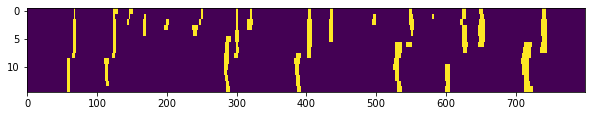

In [13]:
slice_peaks = feat.color_peaks_2d(fsub_stop_2d[1][5, :], patterns[5], fwhm_max = 20, area_min = 0, imin = 0)
plt.imshow(slice_peaks, aspect=8, interpolation = 'none')

In [58]:
reload(feat)

<module 'xrdc.featurization' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/featurization.py'>

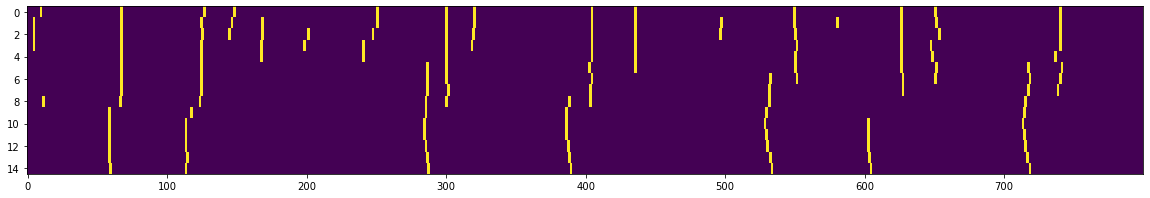

In [442]:
slice_peaks = feat.color_peaks_2d(fsub_stop_2d_2[1][5, :], patterns[5], fwhm_max = 20, area_min = 0, imin = 0,
                                 peakwidth = 1)
plt.imshow(slice_peaks, aspect=8, interpolation = 'none')

In [93]:
def color_peaks_3d(patterns, peakparams, mask_zero = True, **kwargs):
    """
    Given peak fit parameters, return an array of the same shape as patterns with peak regions
    set to 1.
    """
    res = np.array([feat.color_peaks_2d(params_slice, patterns_slice)
                     for patterns_slice, params_slice in zip(patterns, peakparams)])
    if mask_zero:
        mask = (patterns.sum(axis = len(patterns.shape) - 1)) != 0
        res *= mask[..., None]
    return res

In [150]:
mask = (patterns.sum(axis = len(patterns.shape) - 1)) != 0

In [317]:
reload(feat)

<module 'xrdc.featurization' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/featurization.py'>

In [156]:
peakmask3d = color_peaks_3d(fast_q, fsub_stop_2d_3[1])

In [318]:
peak_slices = [feat.color_peaks_2d(fsub_stop_2d_3[1][i, :], patterns[i], fwhm_max = 20, area_min = 0, imin = 0)
              for i in range(patterns.shape[0])]

peak_slices_2 = [feat.color_peaks_2d(fsub_stop_2d_3[1][i, :], patterns[i], fwhm_max = 20, area_min = 0, imin = 0,
                                  peakwidth = 2)
              for i in range(patterns.shape[0])]

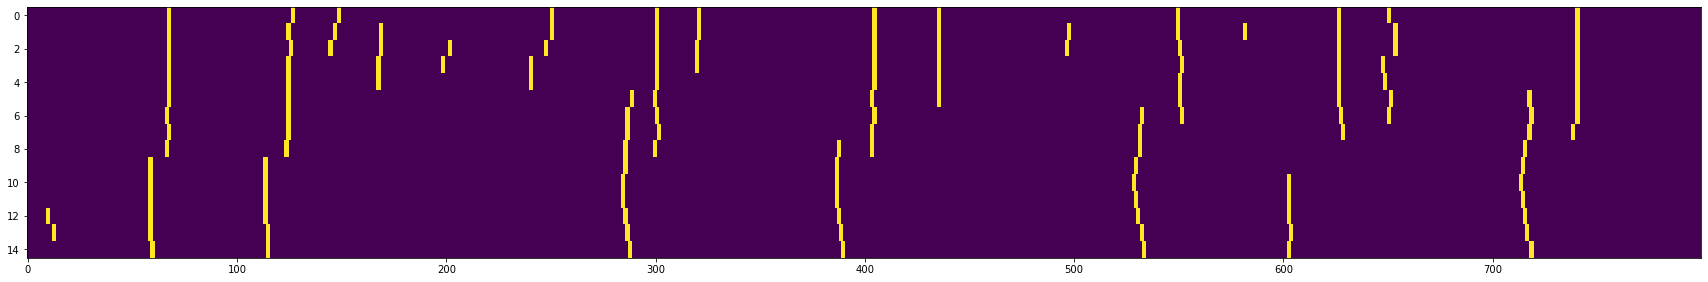

In [240]:
plt.imshow(peak_slices[5], aspect=8, interpolation = 'none')

In [327]:
def overlay_mask(img, mask, **kwargs):
    grayscale = 1 - mask
    alpha = mask
    rgb_img = np.dstack((grayscale, (grayscale), grayscale, (alpha)))
    plt.imshow(np.log(1 + img), cmap = 'jet', **kwargs)
    plt.imshow(rgb_img, cmap = 'Greys', **kwargs)

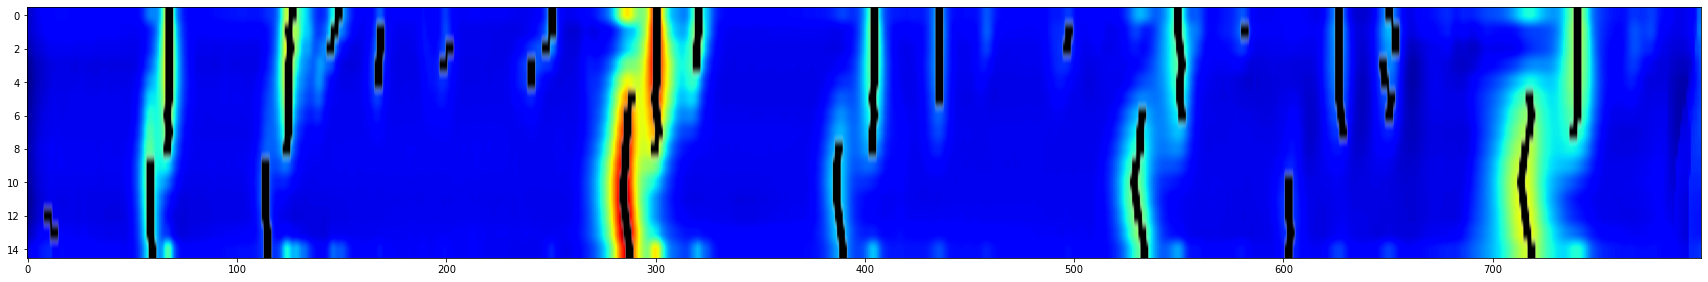

In [330]:
overlay_mask(fast_q[5], peak_slices_2[5], aspect = 8)

In [348]:
def plot_slices(callback, *args, N = 15, **kwargs):
    a, b = N, 1
    for i in range(N):
        plt.subplot(a, b, i + 1)
        plt.title('slice number {}'.format(i + 1), loc = 'right')
        callback(*(arg[i] for arg in args), **kwargs)
#        plt.imshow(np.log(1 + arr3d[:, i]), cmap = 'jet', interpolation = 'none')

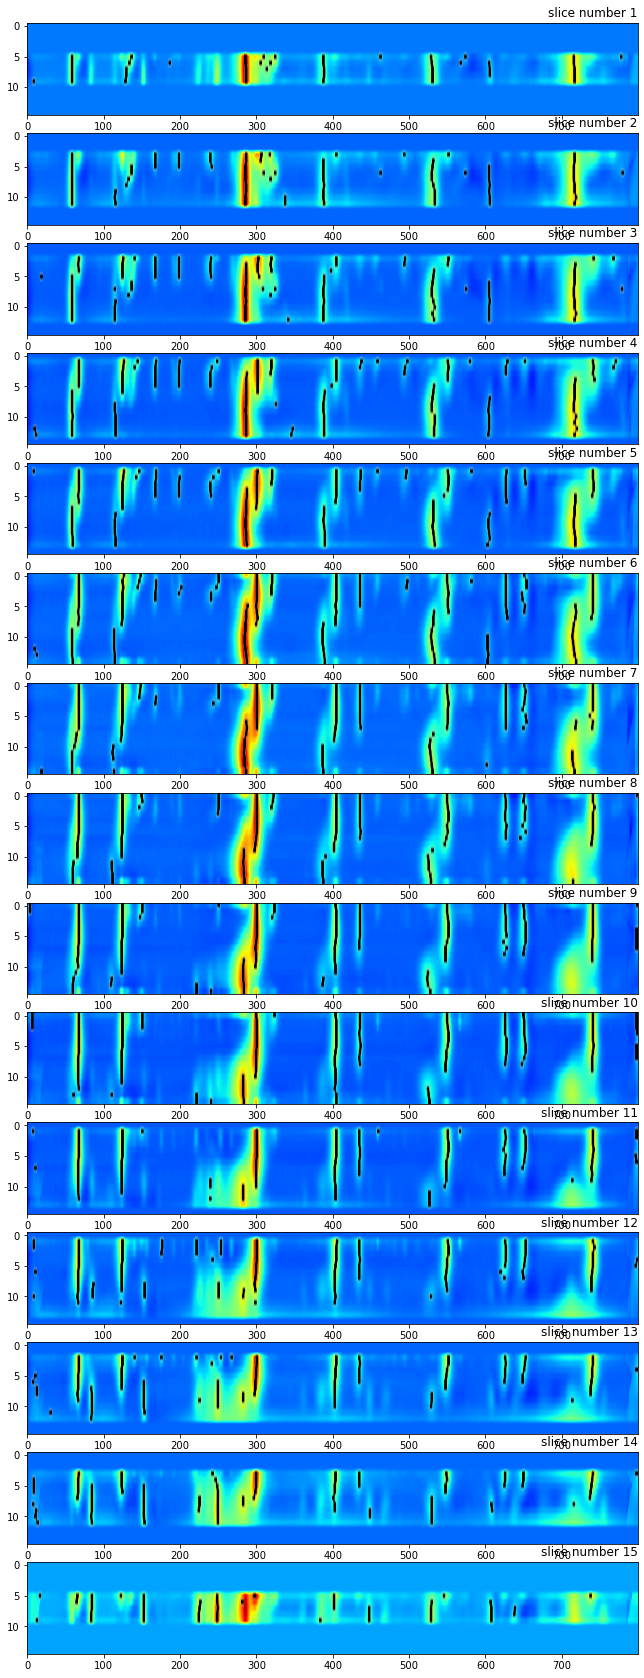

In [349]:
plot_slices(overlay_mask, fast_q * mask[..., None], peak_slices_2, aspect = 8, vmin = -1)#, vmax = np.log10(1 + fast_q.max()))

### TODO ask why number of peaks found depends on the intensity scale

In [37]:
patterns_pp = fast_q

In [43]:
from xrdc import visualization as vis

In [126]:
reload(vis)

<module 'xrdc.visualization' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/visualization.py'>

In [434]:
plot, volume = vis.heatmap3d(fast_q, interpolation = False);

Output()

In [452]:
plot, volume = vis.heatmap3d(fast_q, interpolation = False);

Output()

In [453]:
volume.volume = (mask[..., None] * rmap(labeled))

In [437]:
volume.volume = np.log(1 + 10 * fast_q / fast_q.max())

In [184]:
def rmap(arr):
    imax = arr.max()
    arr = arr.copy().astype(float)

    for i in range(1, imax + 1):
        new = np.random.random()
        arr[arr == i] = new
    return arr

In [167]:
volume.volume = peakmask3d

In [440]:
fitlists = fsub_stop_2d_3[1]
def peakfit_featurize(patterns_pp, fitlists, size_thresh = 5):
    #patterns_pp = gf(patterns, (1, 1.7))
    labeled, feature_masks, activations, norm_, activations_n1 = feat.get_ridge_features(
        patterns_pp,
        smooth_ax1 = 1,
        smooth_ax0 = 1, threshold_percentile = 50, thicken = True, size_thresh = size_thresh, bgsub=False,
        log_scale_features = False, fwhm_finder=feat.fwhm_finder, do_flood_thicken = False, max_size_flood = 20,
        thicken_ax0 = 1,
        thicken_ax1 = 0, flood_threshold=.95, smooth_factor_ax1 = .125, fitlists = fitlists,
    peakwidth = 1)
    return labeled, feature_masks, activations, norm_, activations_n1

def get_coords(dgrid):
    coords = np.array([dgrid.coord(ii + 1) for ii in range(177)])
    return coords

def norm3d(arr, axis = 0, log_scale = False):
    """
    Log scale: scale the standard deviation along each feature dimension to the
    mean value of that feature
    
    For axis == 1, we scale features to mean and std, but only consider non-zero values.
    """
    xi, yi, zi = np.nonzero(arr)
    xxi, yyi, zzi = lambda i: xi[xi == i], lambda i: yi[xi == i], lambda i: zi[xi == i]
    arr = arr.copy()
    global_min = arr[xi, yi, zi].min()
    print(global_min)
    for i in range(arr.shape[0]):
        ai = arr[xxi(i), yyi(i), zzi(i)]
        arr[xxi(i), yyi(i), zzi(i)] = (ai - ai.min()) / ai.std()
        if log_scale:
            arr[xxi(i), yyi(i)] *= (np.log(ai.mean() - global_min + 1))
    return arr

swap3d = lambda arr: np.einsum("ijk->kij", arr)

def csim3d(activations_n1):
    #activations_n1 = swap3d(activations_n1)
    tmp = np.einsum("kij, klm->ijlm", activations_n1, activations_n1)

    norm = np.linalg.norm(activations_n1, axis = 0)

    norm4d = np.einsum("ij, kl->ijkl", norm, norm)

    tmp_csim = tmp / (norm4d + 1e-30)
    return tmp_csim

def gridstack(arr4d):
    return np.vstack(np.dstack(np.transpose(arr4d, (1, 0, 2, 3))))

def plot_clusters_grid(coords, clust, nclust):
    import matplotlib
    dim = coords.max()
    coordi = coords - 1
    hues = [float(float(x)/float(nclust)) for x in range(1,nclust+1)]
    cg = cluster_grid = np.zeros(shape = (dim,dim,3))
    for k, (x, y) in enumerate(coordi):
        cluster = clust[k]
        cluster_grid[x, y] = matplotlib.colors.hsv_to_rgb([hues[cluster],1,1])
#     if debug:
#         print(coords)

#     fig = plt.figure()
#     fig.tight_layout()
    start, end = nclust - 1, nclust
    Big_labels = []
    Big_labels.append(clust)
    plt.imshow(cg)
    
nclust = 11# i = 2

path = "../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/"

from data_grid import DataGrid

dgrid = DataGrid(path, """TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv""",range=None)

q = dgrid.data[1][:,0]
X = dgrid.get_data_array()
X /= X.sum(axis = 1)[:, None]

coords = get_coords(dgrid)    

Loading Data from: ../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)


In [363]:
%pdb

Automatic pdb calling has been turned ON


In [410]:
reload(feat)

<module 'xrdc.featurization' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/featurization.py'>

In [451]:
ridges = feat.get_ridges(feat.preprocess(fast_q, smooth_ax1= .8, threshold_percentile = 50), axis = 2,
                        fitlists = fitlists, peakwidth = 1)

arr, labeled = feat.refine_and_label(ridges, sizetype = 'count', size_thresh=50,
                                    thicken_ax1=0)
feature_masks = np.array([labeled == i for i in range(1, labeled.max() + 1)])

using fitlists
3
3
3


In [ ]:
mark

In [422]:
axis = 3
# activations = np.log(1 + (feature_masks * fast_q).sum(axis = axis))
activations = (feature_masks * fast_q).sum(axis = axis)
scale = np.mean(activations, axis = (1, 2))
# activations_n1 = activations / scale[:, None, None]
activations_n1 = norm3d(activations)

mask = (patterns.sum(axis = 2) != 0)
fast_q_flat = fast_q[mask]

-50.525427003179196


(0.4323492203716807, 0.3893842895674234)

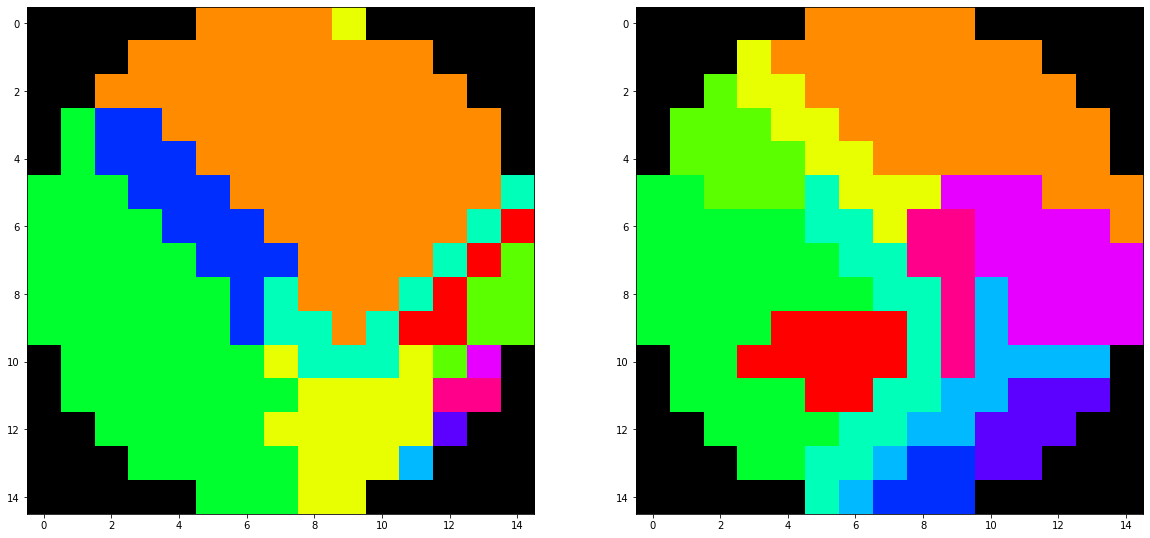

In [433]:
if debug:
    clust, sorter, clust_cms = feat.do_clust(patterns.T, nclust, ctype = 'agglom', linkage = 'average',
                                        affinity = 'cosine')
else:
    clust, sorter, clust_cms = feat.do_clust(fast_q_flat, activations[:, mask], nclust, ctype = 'agglom', linkage='average',
                                        affinity='cosine')


plt.subplot(1, 2, 1)
plot_clusters_grid(coords, clust, nclust)


plt.subplot(1, 2, 2)
plot_clusters_grid(get_coords(dgrid), y, 11)

# ax = fig.add_subplot(1,end-start,i-start+1)
# ax.imshow(cg)
# ax.invert_yaxis()
# ax.title.set_text(i)
# ax.axis("off")
# fig.show()

from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import adjusted_rand_score as rand

ami(y, clust), rand(y, clust)

In [424]:
activations.shape

(23, 15, 15)

In [409]:
patterns.shape

(15, 15, 800)

In [405]:
activations_n

(15, 15)

In [441]:
labeled, feature_masks, activations, _norm, activations_n1 = peakfit_featurize(fast_q, fitlists,
                                                                               size_thresh = 5)

using fitlists
3
3
3
25


ValueError: too many values to unpack (expected 2)

> /Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/featurization.py(156)norm()
    154         return ((arr - arr.mean(axis = axis)) / arr.std(axis = axis))
    155     elif axis == 1:
--> 156         xi, yi = np.nonzero(arr)
    157         xxi, yyi = lambda i: xi[xi == i], lambda i: yi[xi == i]
    158 #         means, stds = np.array([(arr[xxi(i), yyi(i)].mean(), arr[xxi(i), yyi(i)].std() )

ipdb> arr.shape
(25, 15, 800)
ipdb> c


In [19]:
axis = 3
activations = np.log(1 + (feature_masks * patterns).sum(axis = axis))
#activations = (feature_masks * patterns).sum(axis = axis)
scale = np.mean(activations, axis = (1, 2))
# activations_n1 = activations / scale[:, None, None]
activations_n1 = feat.norm(activations)

mask = (patterns.sum(axis = 2) != 0)
patterns = patterns[mask]


/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/featurization.py:136: RuntimeWarning: invalid value encountered in true_divide
  return ((arr - arr.mean(axis = axis)) / arr.std(axis = axis))


NameError: name 'dgrid' is not defined

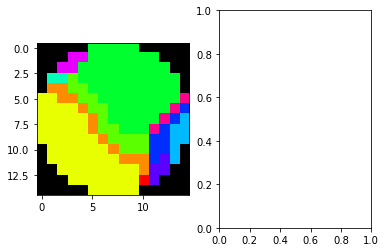

In [26]:
if debug:
    clust, sorter, clust_cms = feat.do_clust(patterns.T, nclust, ctype = 'agglom', linkage = 'average',
                                        affinity = 'cosine')
else:
    clust, sorter, clust_cms = feat.do_clust(patterns, activations[:, mask], nclust, ctype = 'agglom', linkage='average',
                                        affinity='cosine')


plt.subplot(1, 2, 1)
d3d.plot_clusters_grid(d3d.get_coords(d3d.dgrid), clust, nclust)


plt.subplot(1, 2, 2)
d3d.plot_clusters_grid(d3d.get_coords(dgrid), y, 11)

# ax = fig.add_subplot(1,end-start,i-start+1)
# ax.imshow(cg)
# ax.invert_yaxis()
# ax.title.set_text(i)
# ax.axis("off")
# fig.show()

from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import adjusted_rand_score as rand

ami(y, clust), rand(y, clust)

In [29]:
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns, cutoff = .2, threshold = 50)

In [30]:
patterns.shape, m3d_agglom.shape

((177, 400), (15, 15, 400))

In [ ]:
max_ind = argrelextrema(orig, np.greater, axis = axis)
#     max_ind_2 = argrelextrema(orig, np.greater, axis = 0)
#     max_ind = np.hstack((max_ind[0], max_ind_2[0])), np.hstack((max_ind[1], max_ind_2[1]))

edges = np.zeros_like(orig)
edges[max_ind] = 1

/Users/ollie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


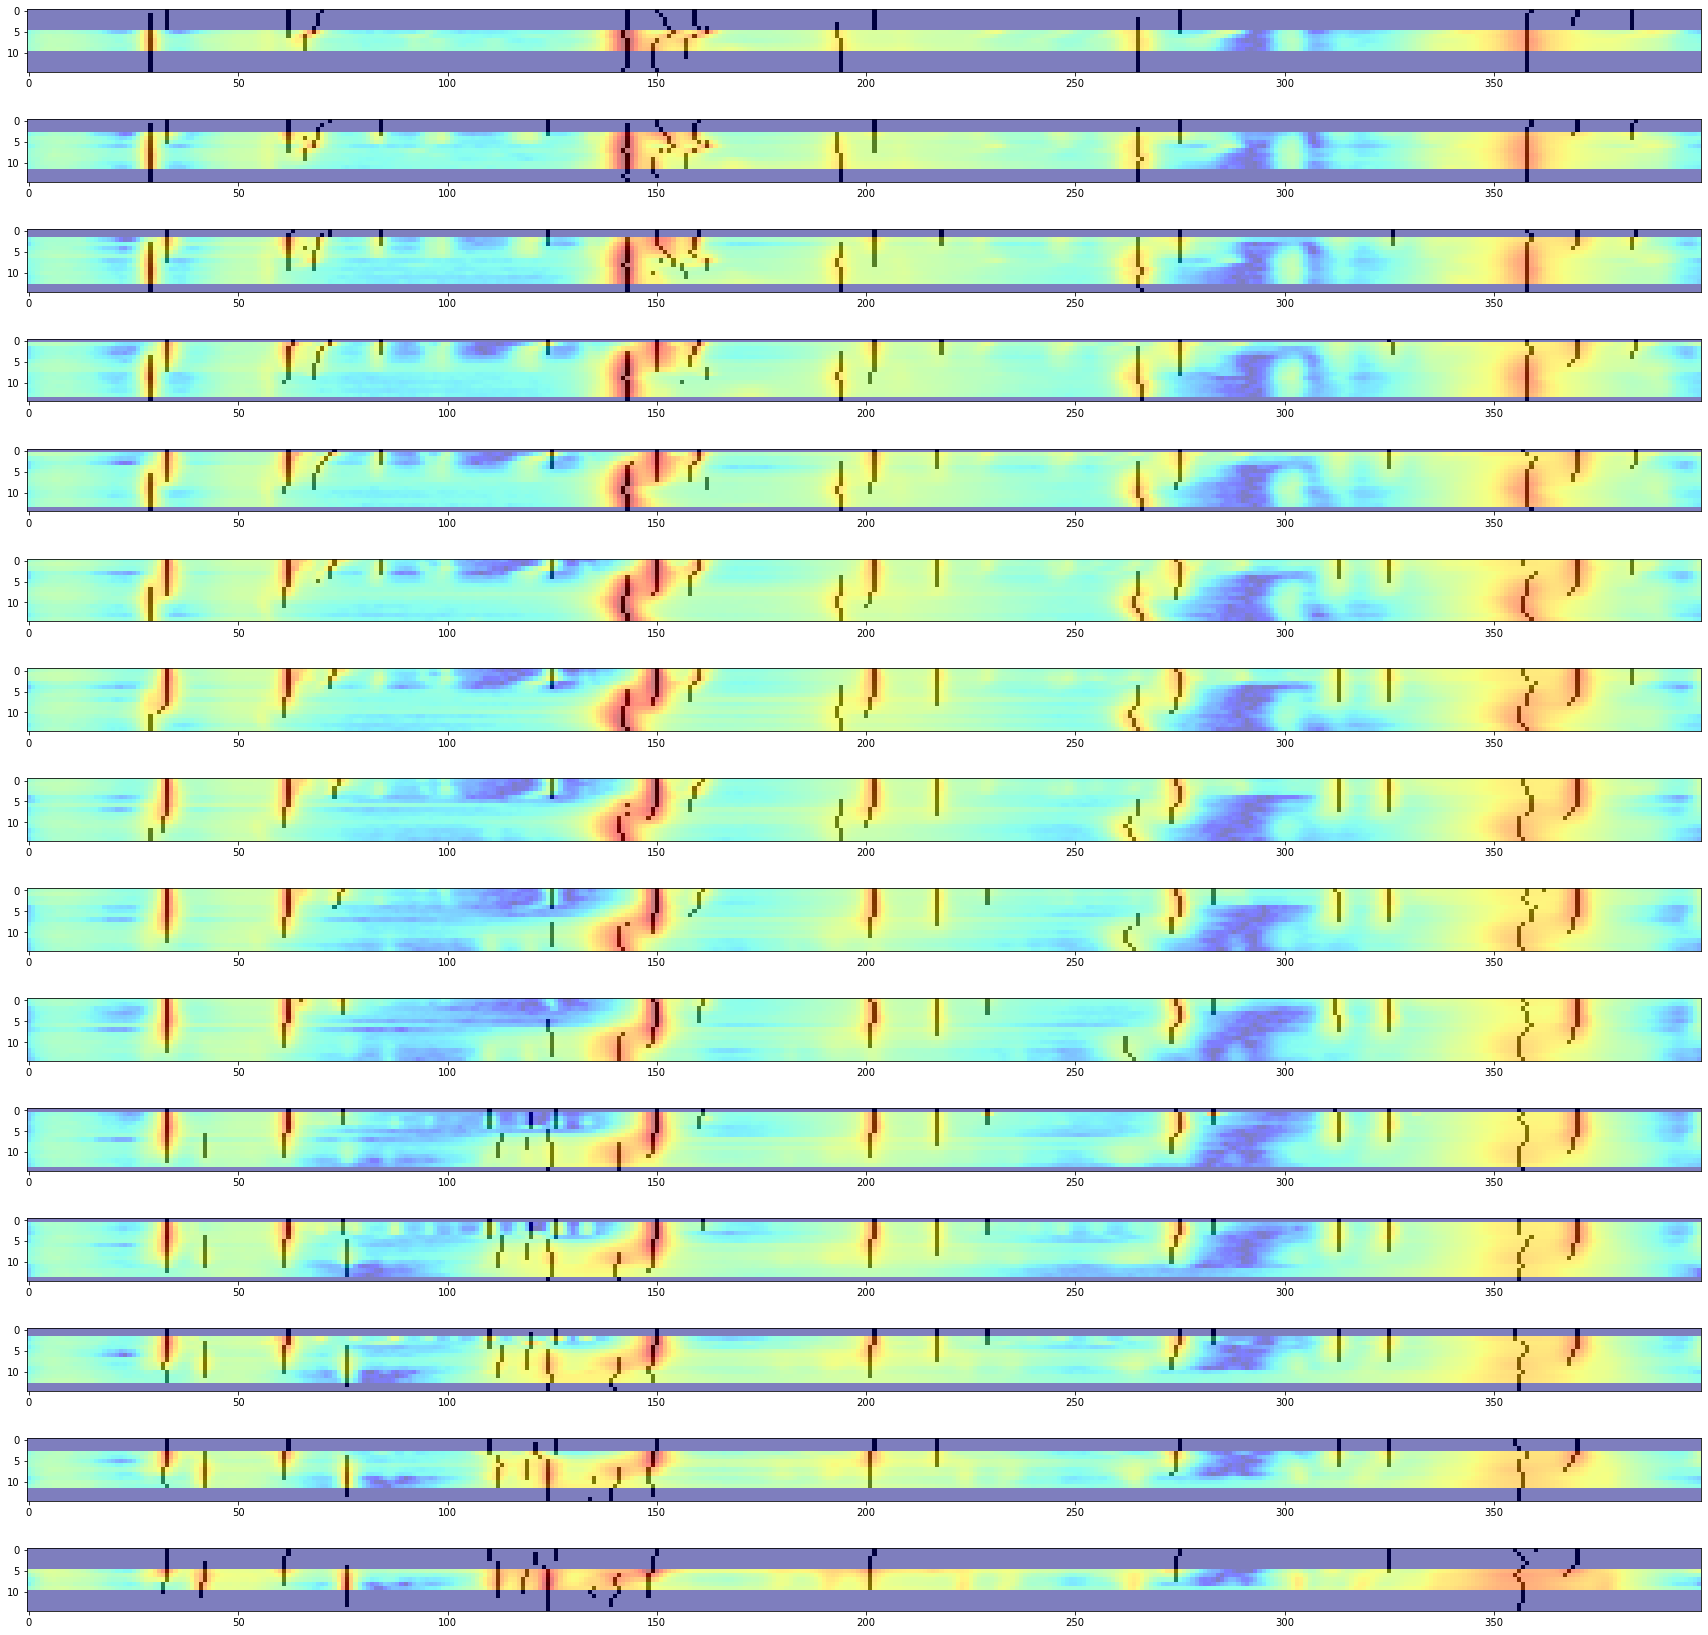

In [467]:
plt.rcParams["figure.figsize"]=(30, 30)

a, b = dim, 1

def plot_cuts(m3d_agglom, axis = 0, cmap = 'jet', **kwargs):
    for i in range(15):
        plt.subplot(a, b, i + 1)
        if axis == 0:
            plt.imshow(np.log(1 + m3d_agglom[i, :]), cmap = cmap, **kwargs)
        if axis == 1:
            plt.imshow(np.log(1 + m3d_agglom[:, i]), cmap = cmap, **kwargs)
plot_cuts(m3d_agglom)
plot_cuts(ridges, alpha = .5, cmap = 'Greys')

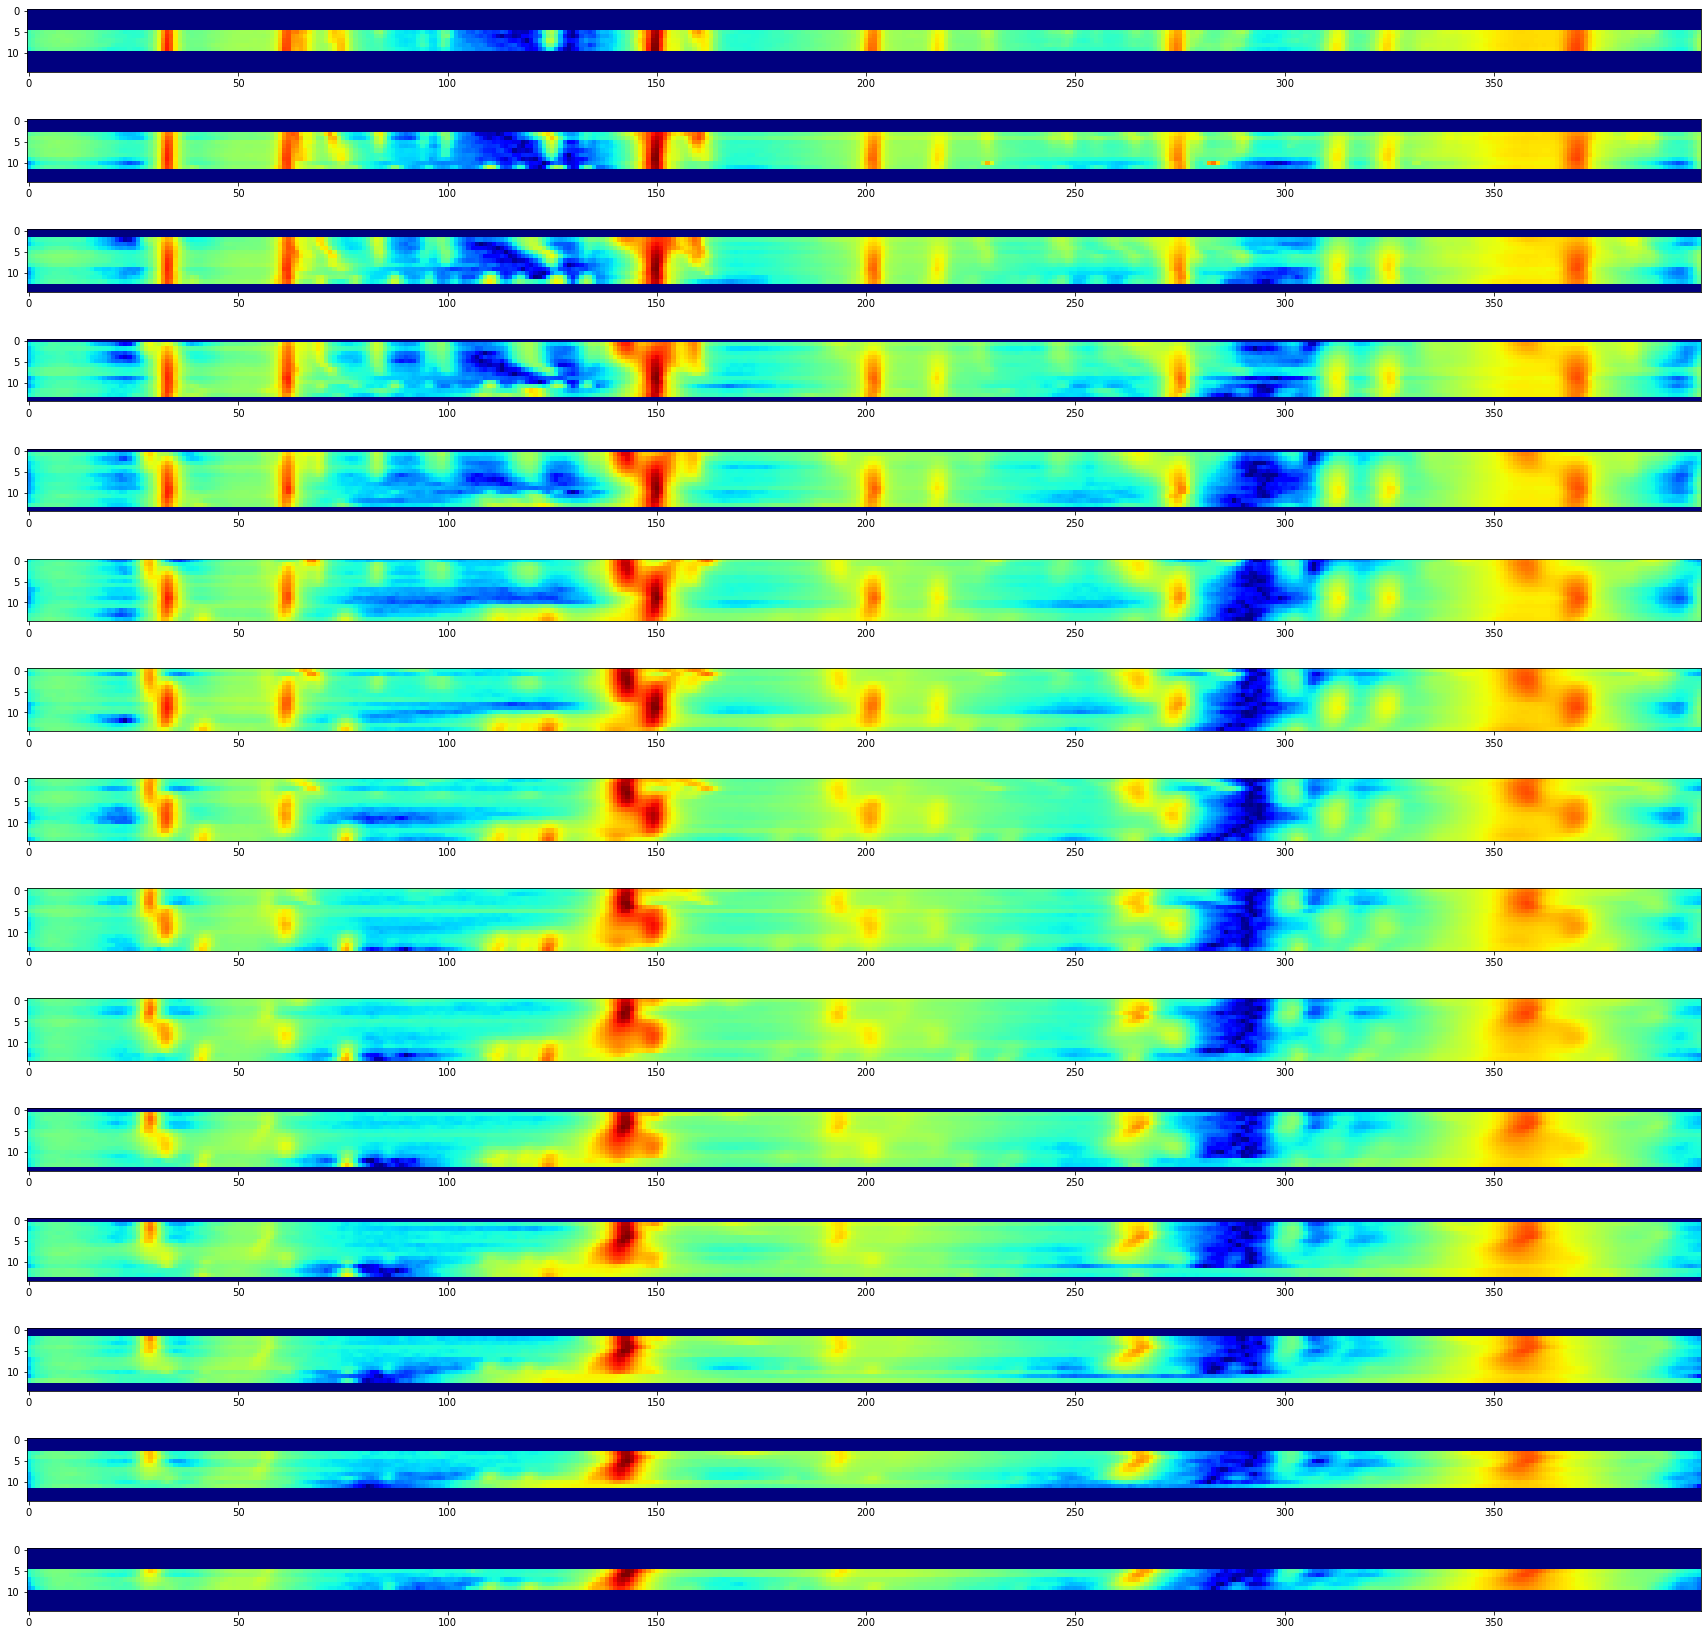

In [470]:
for i in range(15):
    plt.subplot(a, b, i + 1)
    plt.imshow(np.log(1 + m3d_agglom[:, i]), cmap = 'jet', interpolation = 'none')
# plot_cuts(ridges, alpha = .5, cmap = 'Greys')

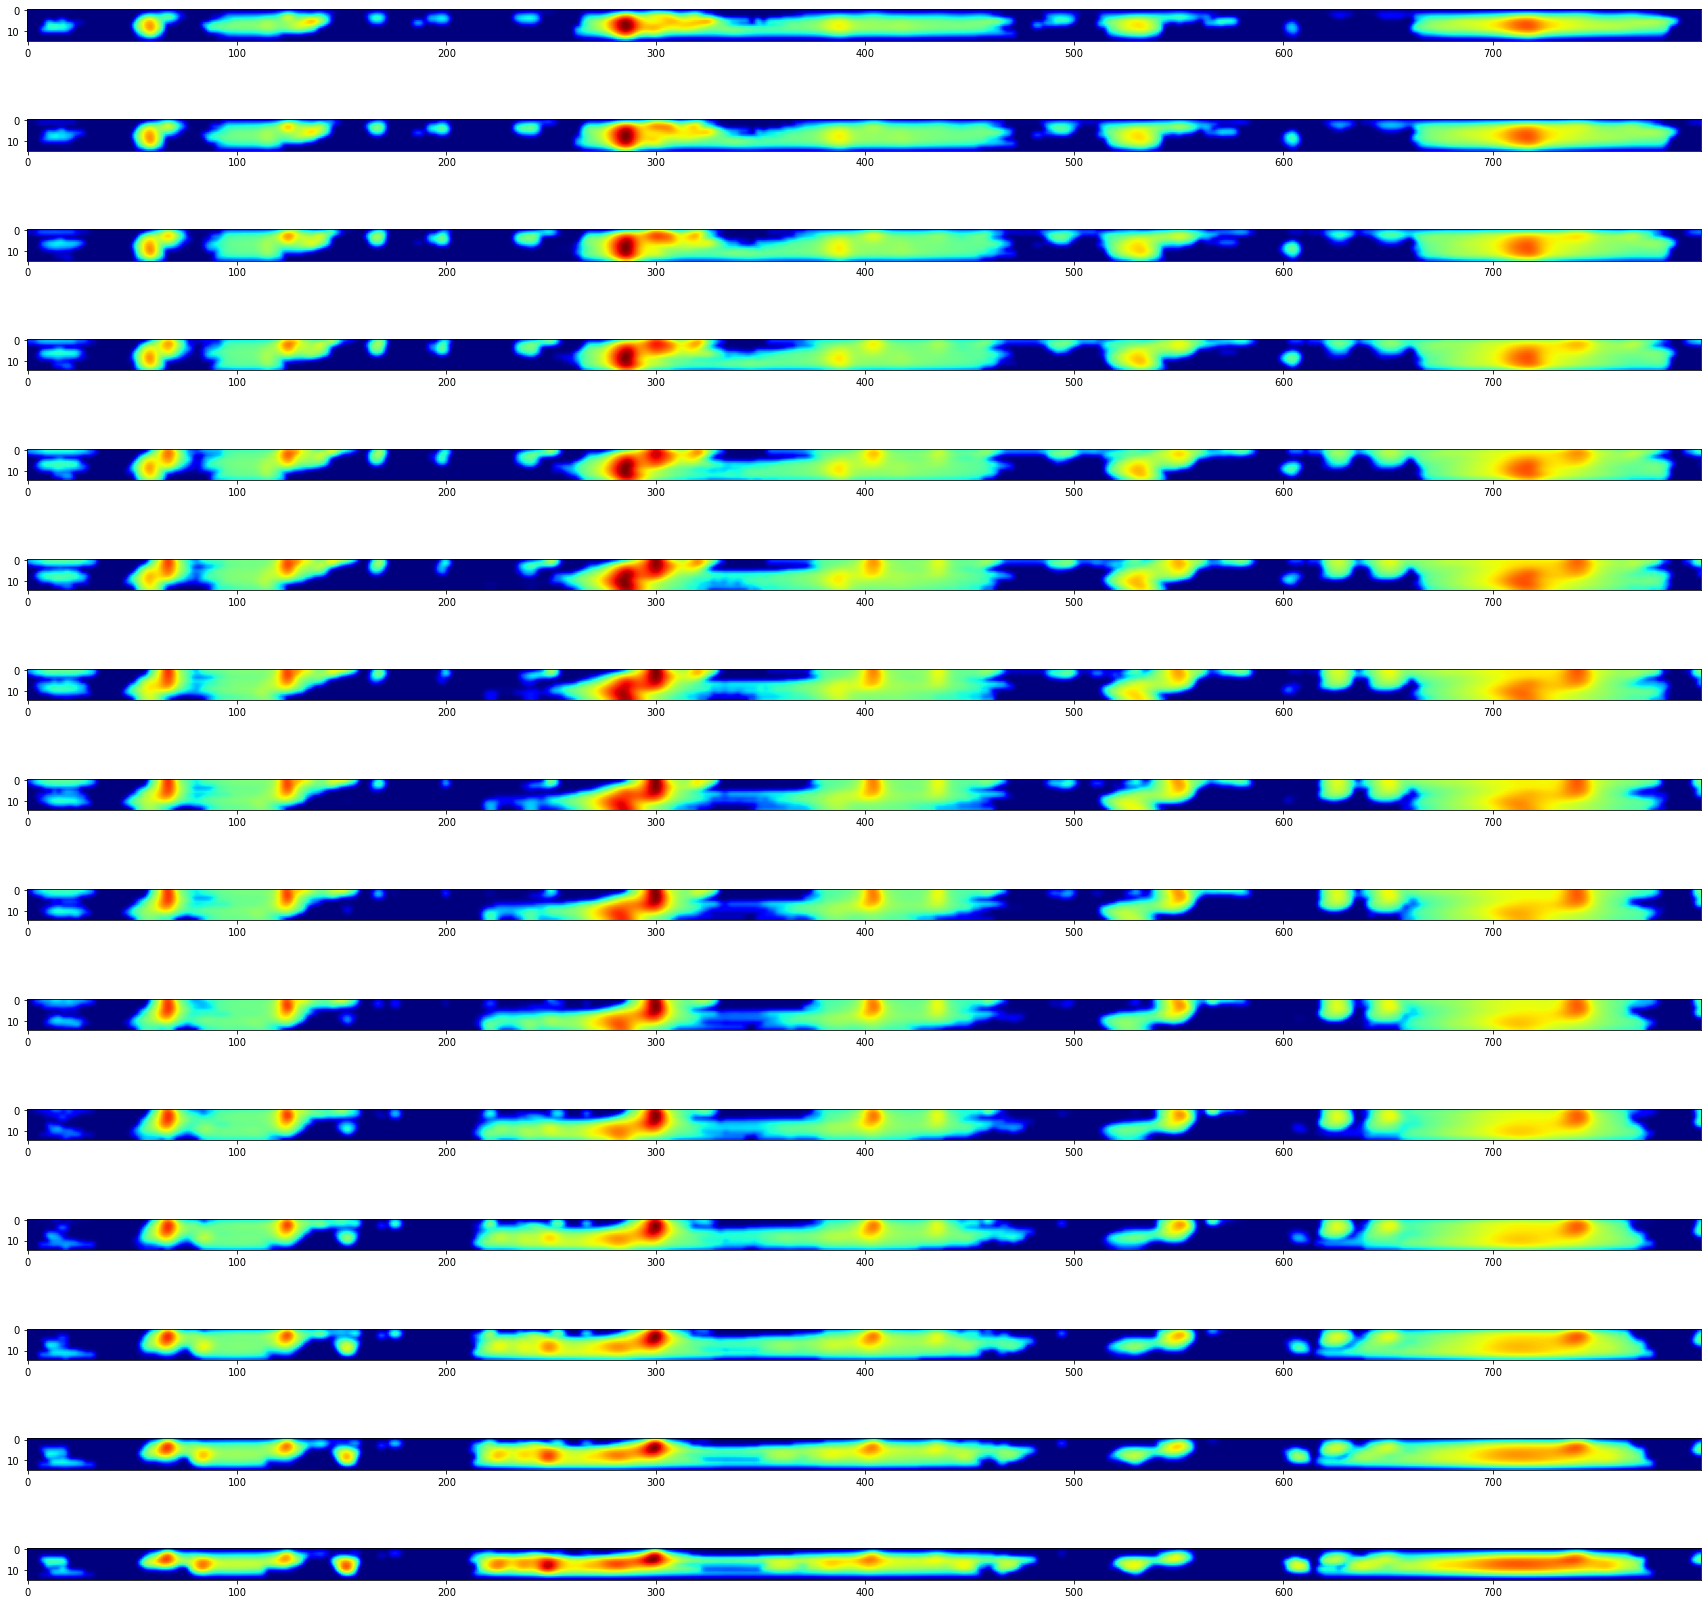

In [114]:
plot_cuts(preprocess(m3d, smooth = 1))

In [131]:
# m3d_agglom = m3d_agglom[:, :14]

In [210]:
m3d_agglom.shape

(15, 15, 400)

In [246]:
ridges.max()

1.0

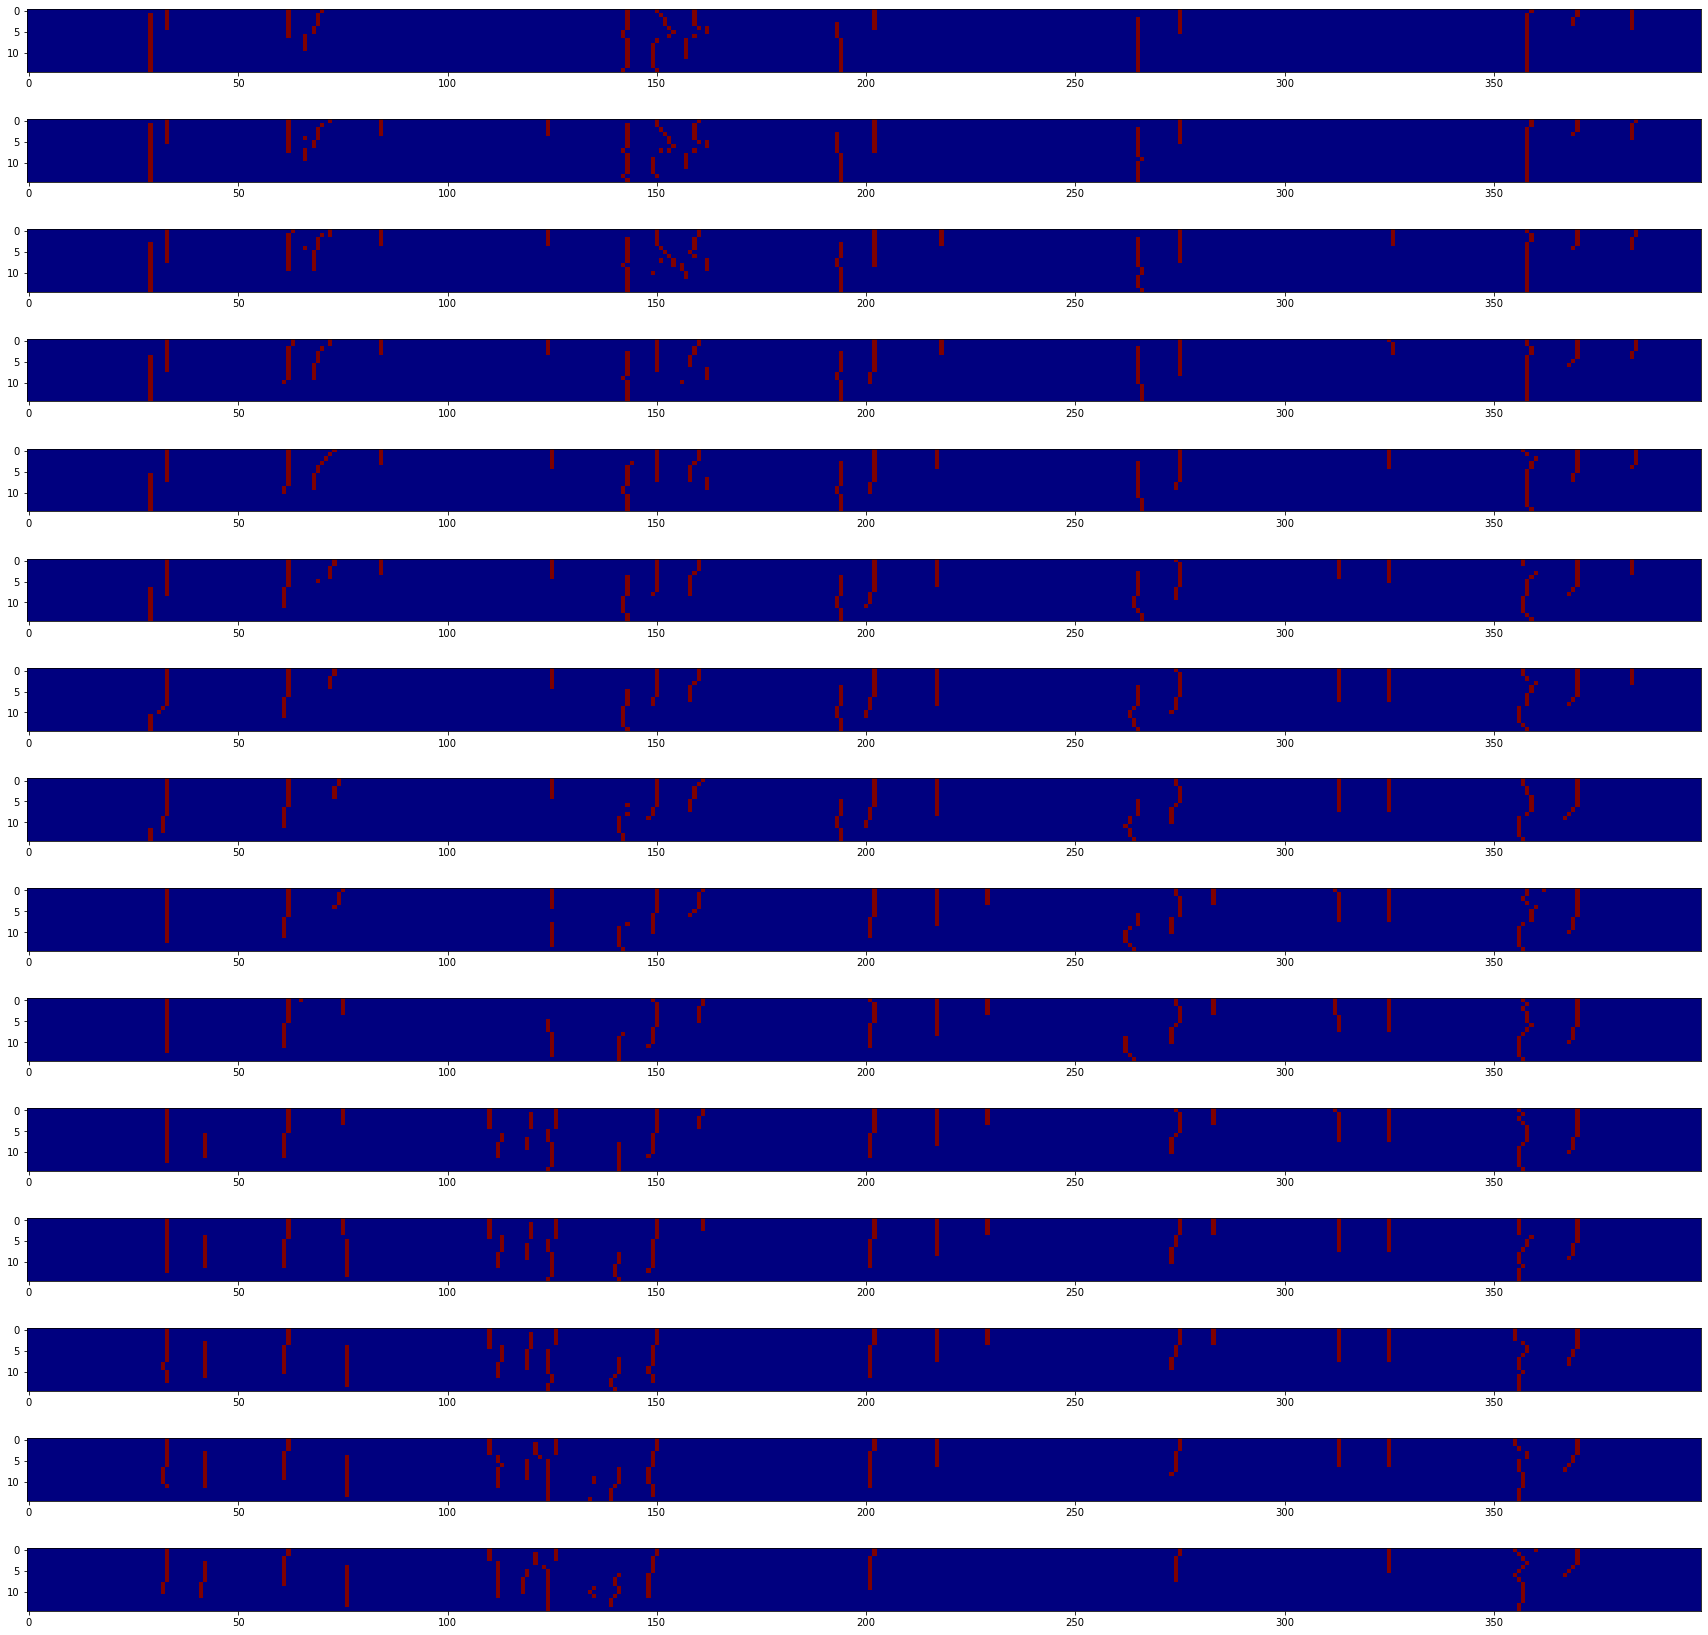

In [616]:
plot_cuts(ridges)

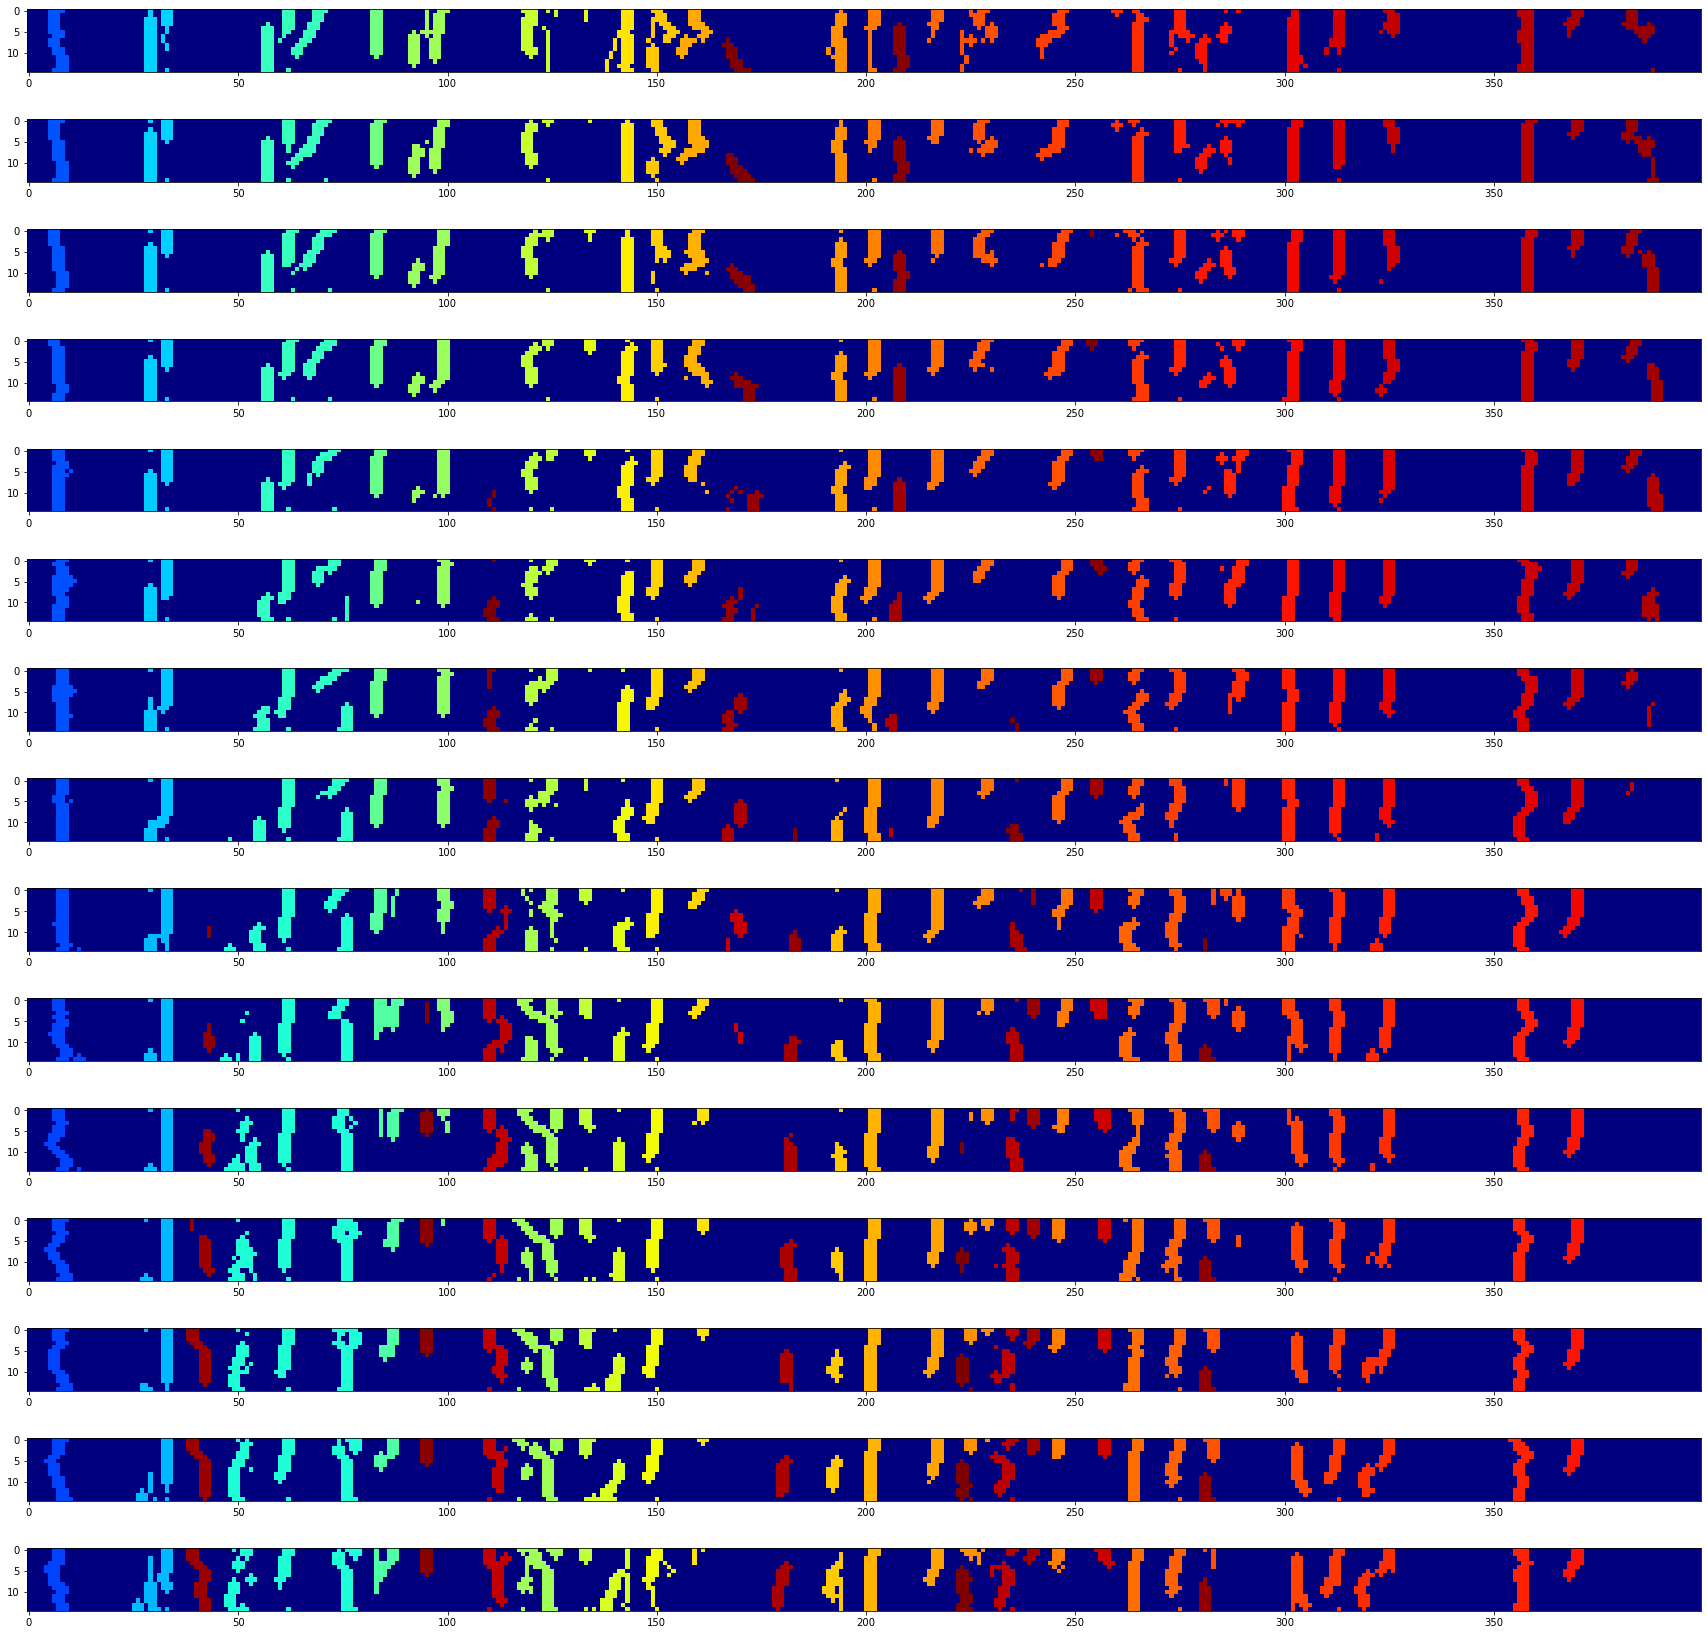

In [655]:
plot_cuts(labeled)

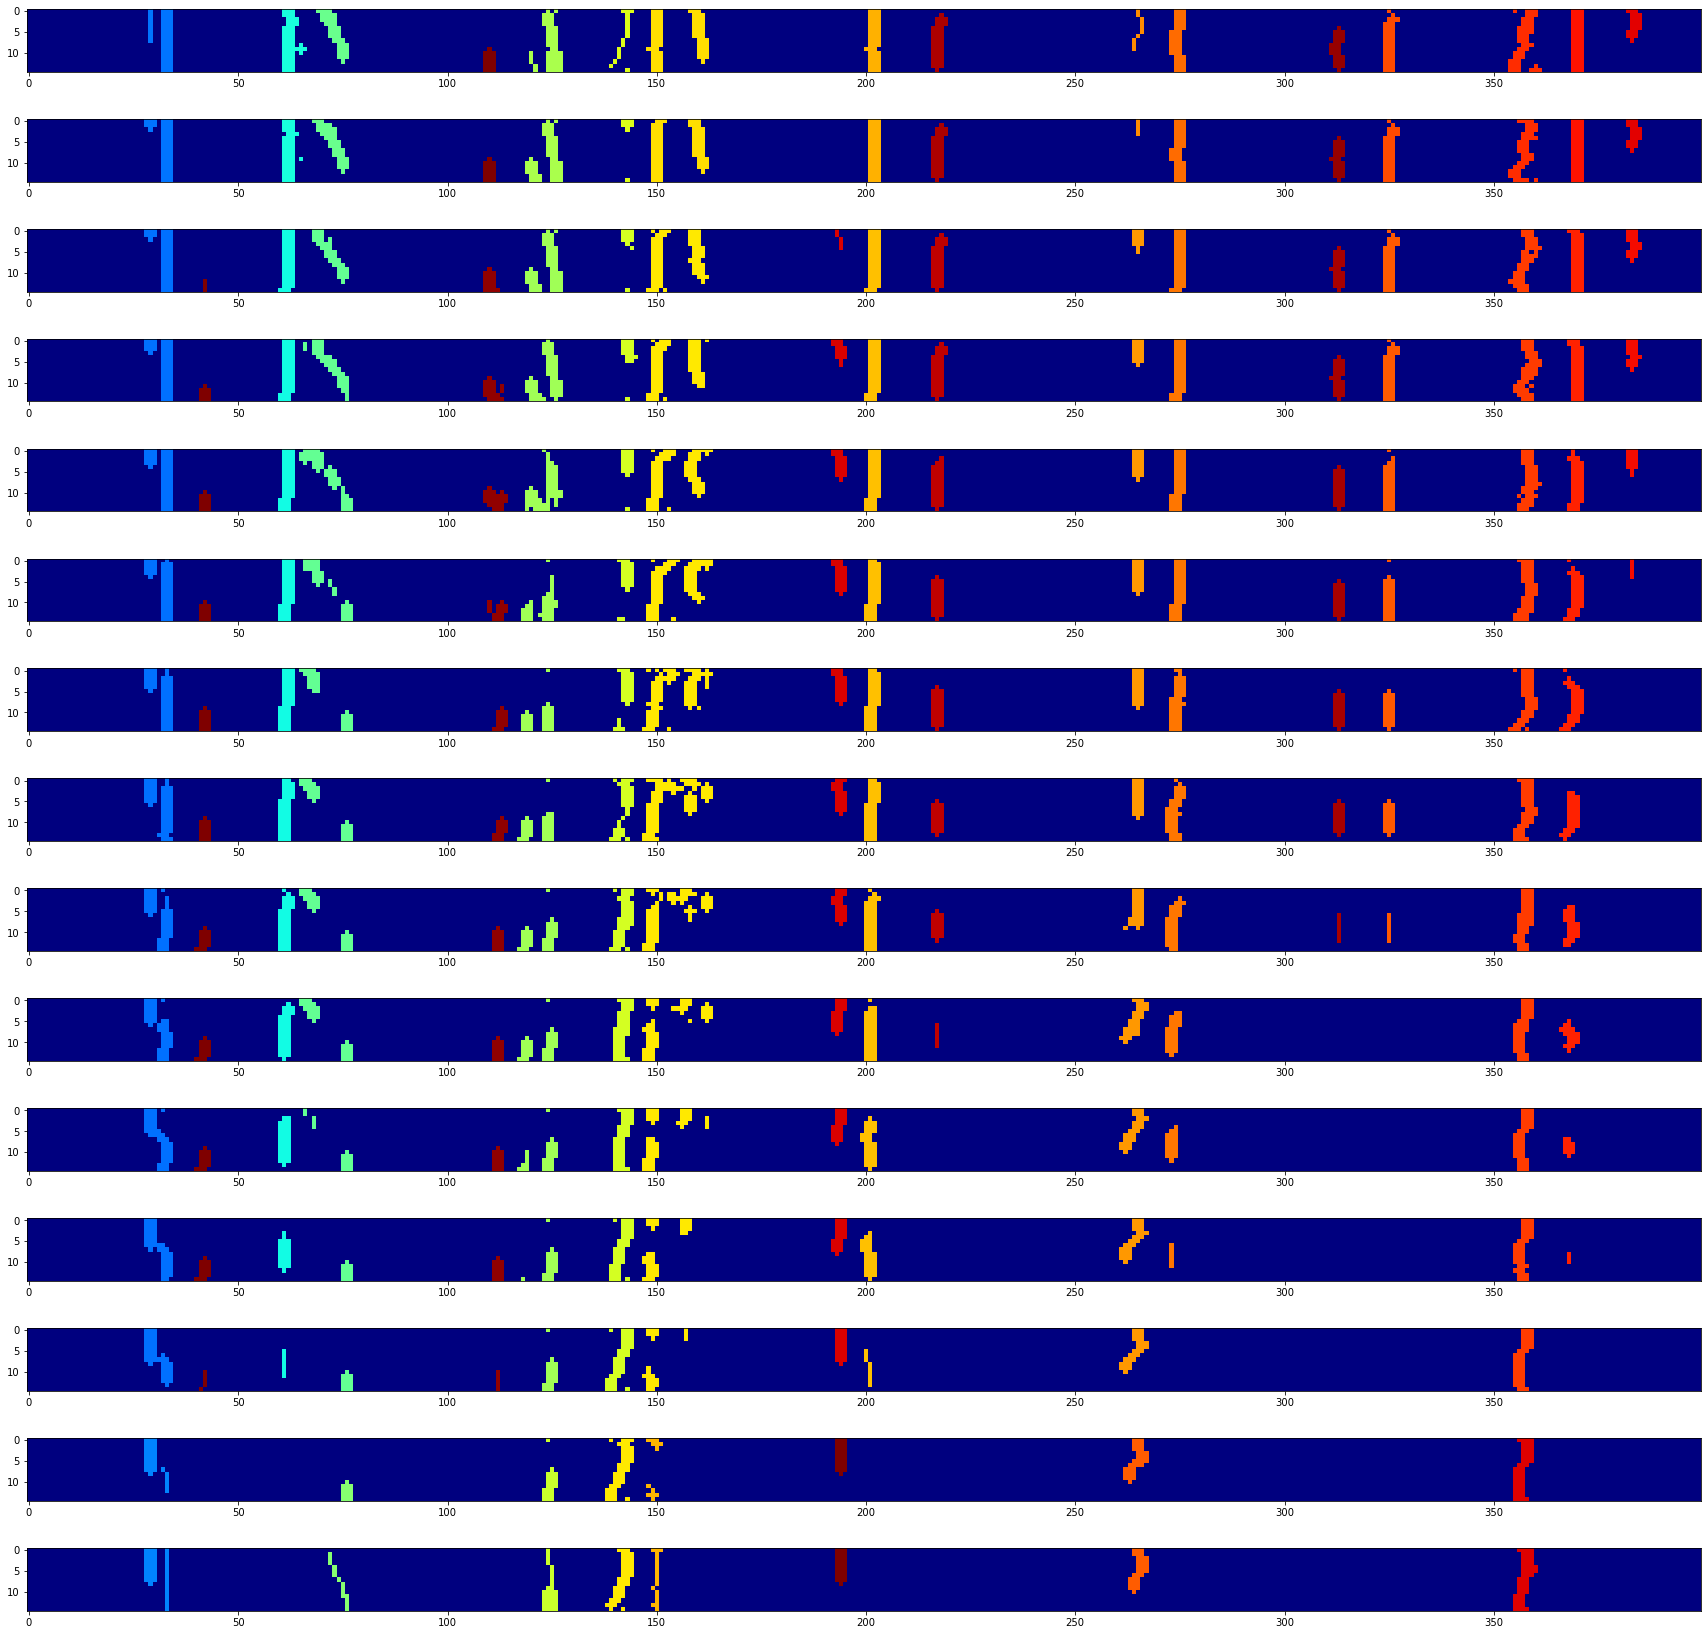

In [618]:
plot_cuts(labeled, axis = 1)

### Test cases for the visualization:

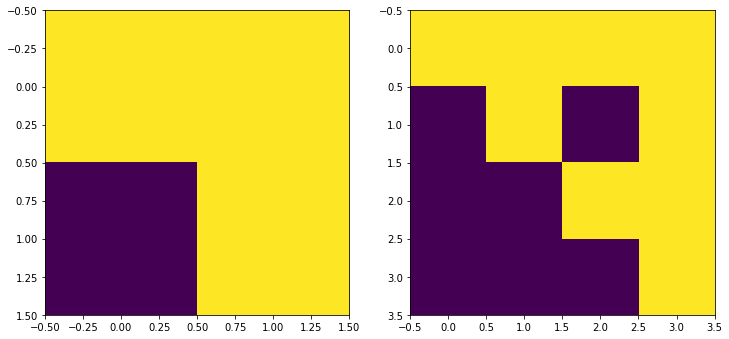

In [1726]:
ta = np.ones((3, 2, 2))

ta[:, 1, 0] = 0

plt.rcParams["figure.figsize"]=(12, 12)
a, b = 1, 2

plt.subplot(a, b, 1)
plt.imshow(ta.sum(axis = 0))

plt.subplot(a, b, 2)
ttmp = np.einsum("kij, klm->ijlm", ta, ta)
plt.imshow((gridstack(ttmp)))

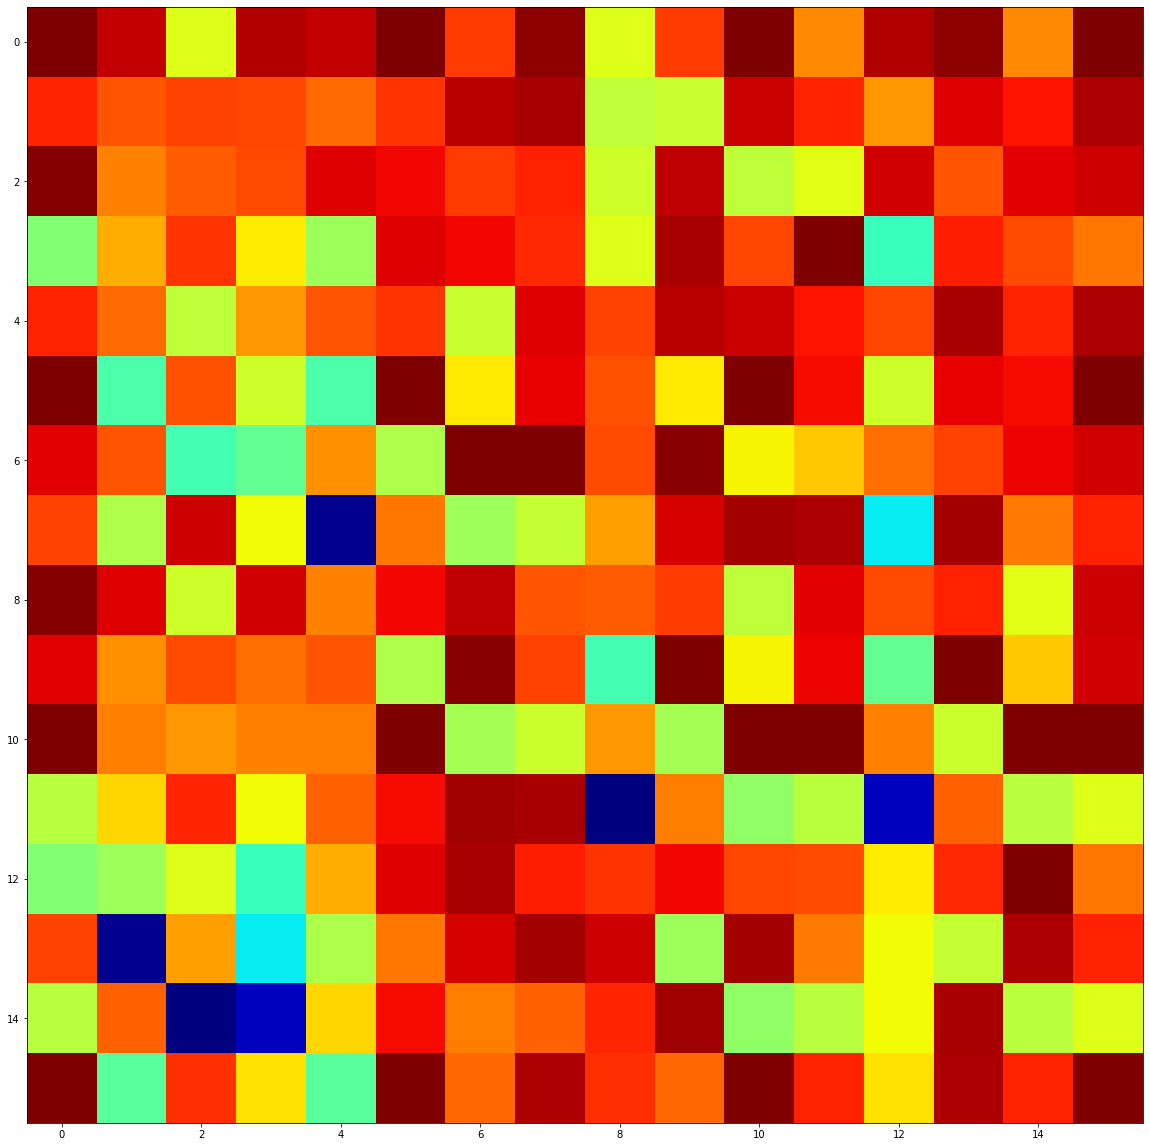

In [1841]:
ta = np.random.rand(3, 4, 4)
ta[0, 3, 0] = 0
#ta[1, 3, 0] = 0
ta[2, 3, 0] = 0
ta[:, 2, 1] *= 10


scale = np.log(np.mean(ta, axis = (1, 2)))

activations_n1 = ta * 2 # / scale[:, None, None]
activations_n1[:, 0, 1] = 2
ttmp = np.einsum("kij, klm->ijlm", activations_n1, activations_n1)

norm = np.linalg.norm(activations_n1, axis = 0)

norm4d = np.einsum("ij, kl->ijkl", norm, norm)

tmp_csim = ttmp / (norm4d + 1e-10)

plt.imshow((gridstack(tmp_csim)), cmap = 'jet')

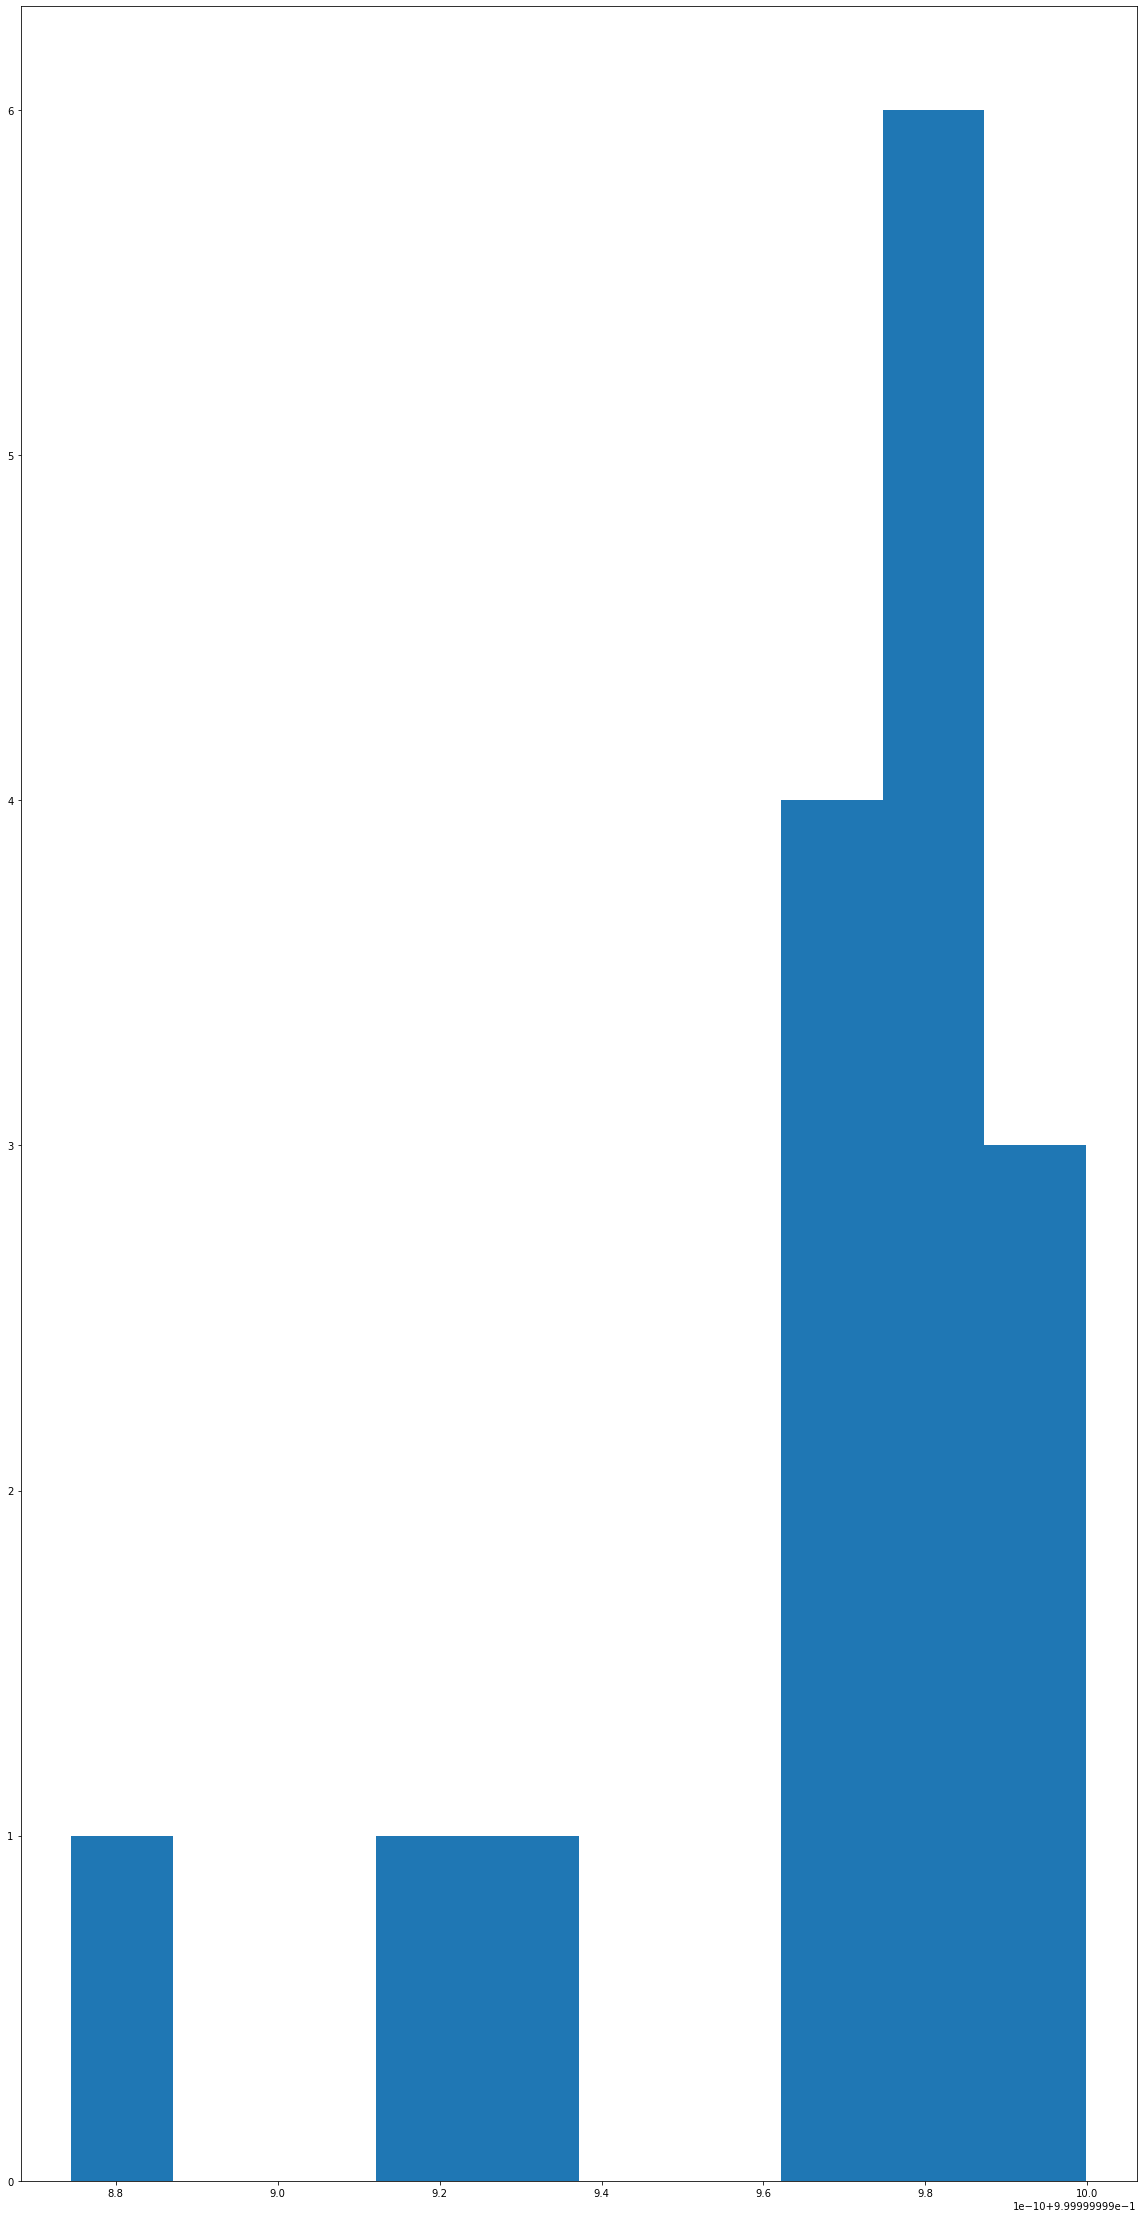

In [1842]:
plt.hist(tmp_csim.max(axis = (0, 1)).ravel(), bins = 10);

In [235]:
activations_n1.max()

nan

In [226]:
%pdb

Automatic pdb calling has been turned ON


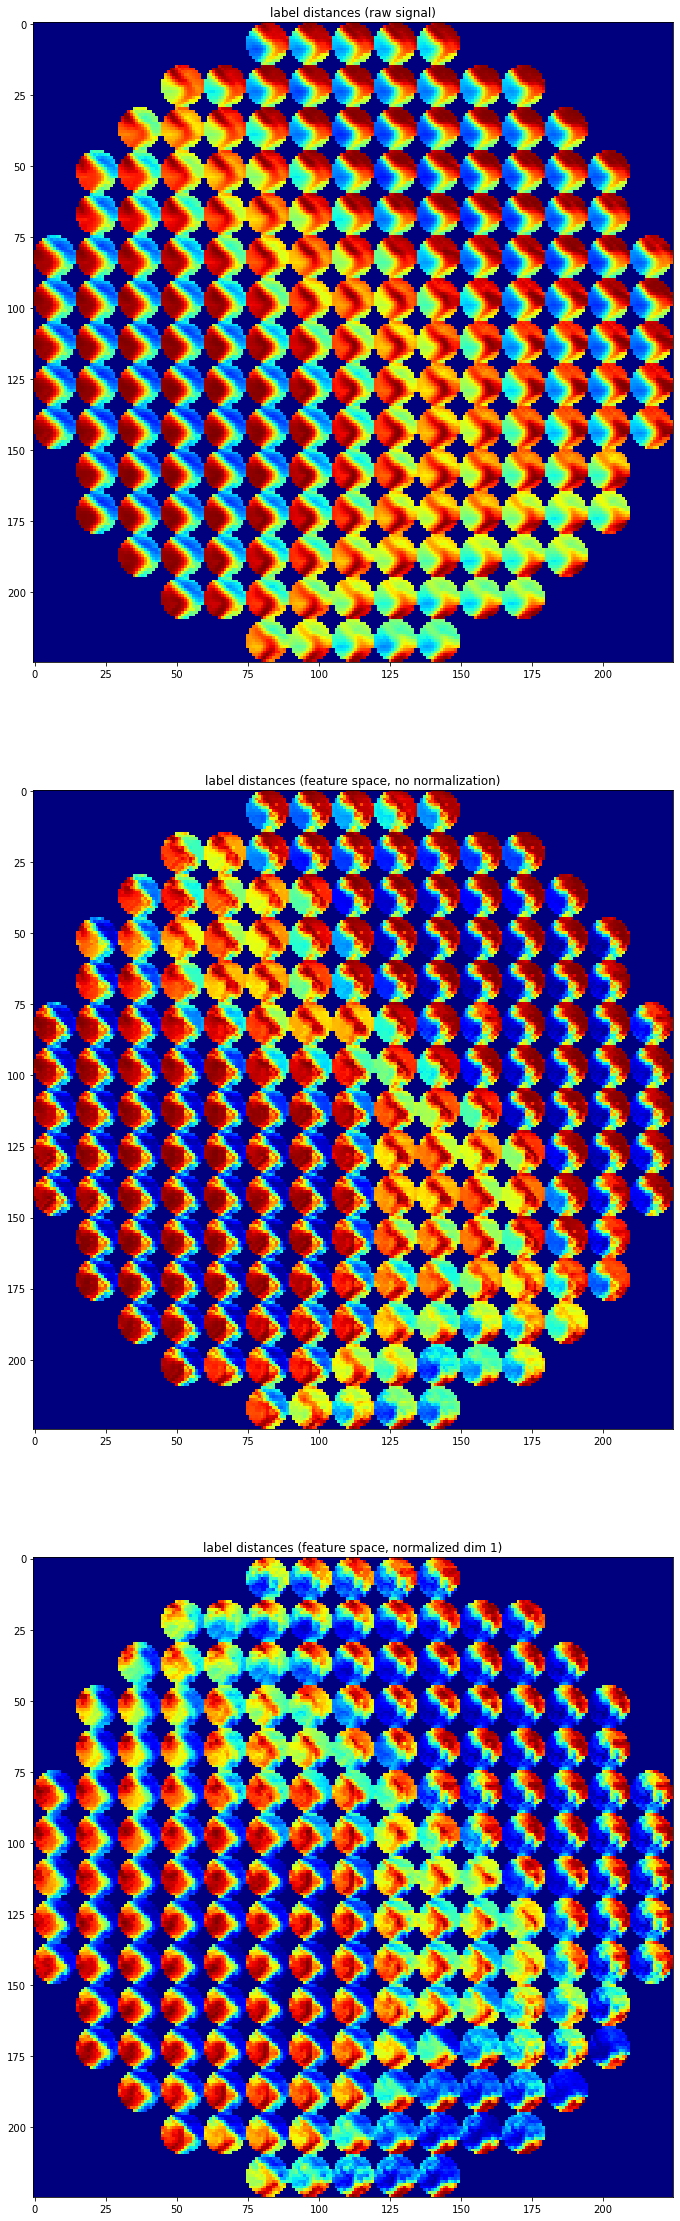

In [22]:
plt.rcParams["figure.figsize"]=(20, 40)

a, b, = 3, 1
similarity_plot_row(csim3d, "label", swap3d(patterns), activations, activations_n1, 
                        activations_n1_log = None, offset = 0, swapper = None,
                   plotter = lambda arr: simple_heatmap(gridstack(arr)))

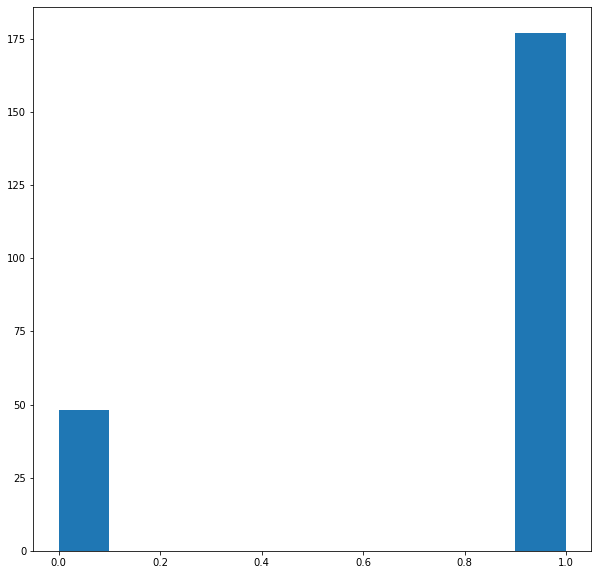

In [1789]:
plt.hist(tmp_csim.max(axis = (0, 1)).ravel());

### Compare to a wrong way of calculating the similarity matrix:

In [1675]:
csim2 = l2_pairs(activations.reshape(16, -1).T).T

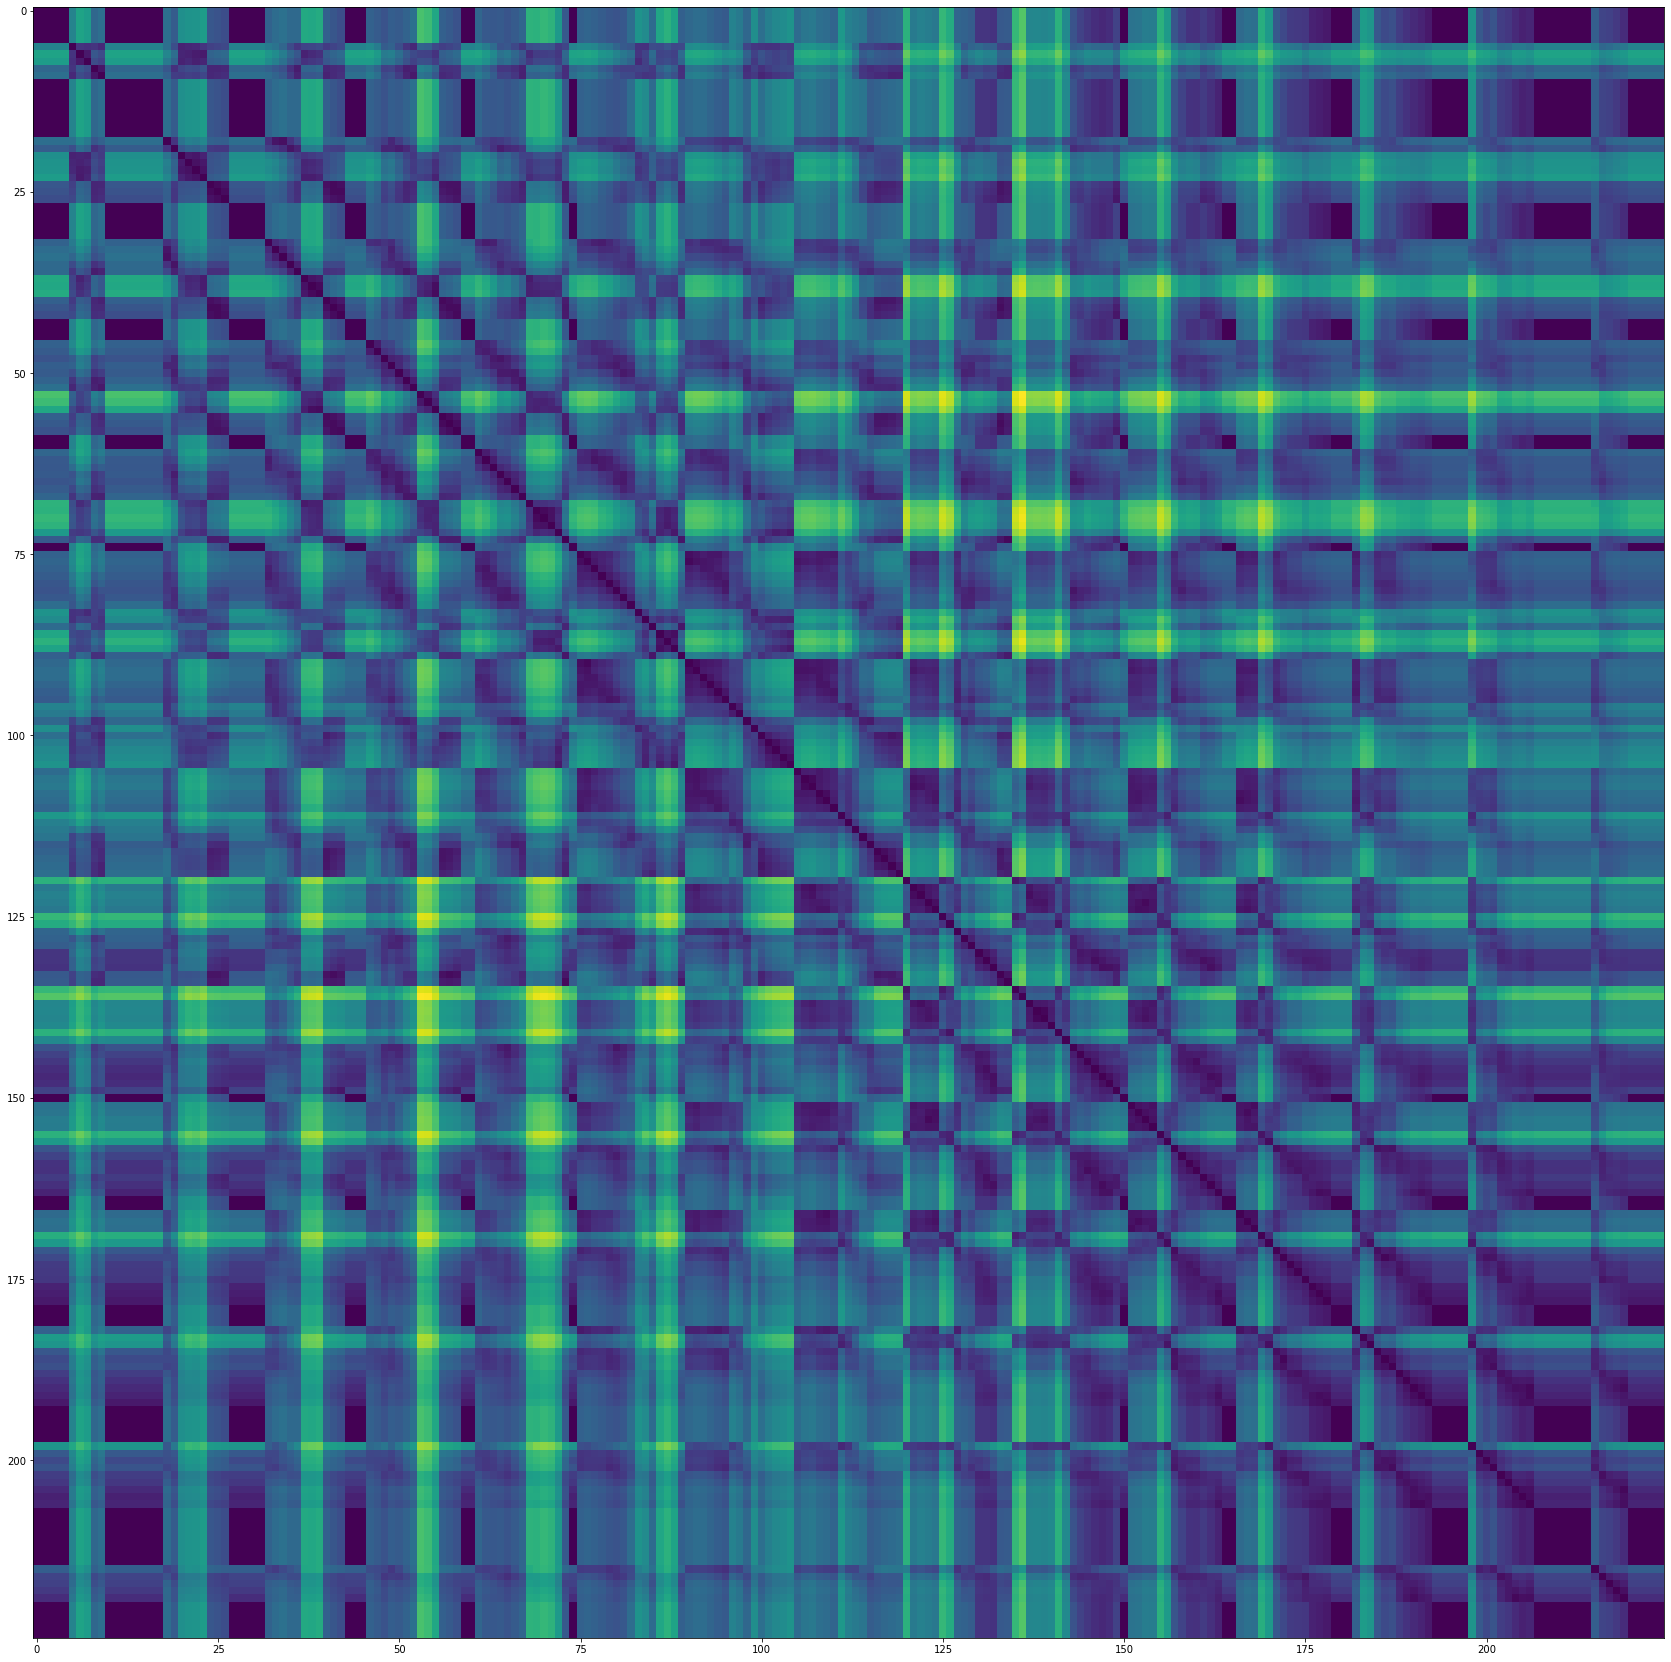

In [1677]:
plt.imshow(csim2)

In [397]:
from PIL import Image
import matplotlib
import matplotlib.cm as cm
import scipy.cluster.vq as scv

In [514]:
arr=plt.imread('/Users/ollie/Downloads/Outlook-xrjjtowh (1).jpg') / 255

alpha = np.ones(arr.shape[:2] + (1,))

arr = np.dstack((arr, alpha))